# Import libs

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from PIL import Image
import os
from sklearn.preprocessing import FunctionTransformer
from collections import Counter

sns.set_theme()
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams["figure.dpi"] = 300

In [2]:
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams["figure.dpi"] = 300

# Pull

In [3]:
# !git clone https://github.com/Tuan-Lee-23/Data-Science-Final-Project.git
# %cd Data-Science-Final-Project/
# %cd notebooks

# Preprocessing + Data exploration

In [4]:
%cd ..

C:\Users\Admin\OneDrive - VNU-HCMUS\Lab KHDL\Pro


In [5]:
df = pd.read_csv('data/raw/tmdb.csv', index_col = 'id', lineterminator= '\n')
df.head(8)

adult belongs_to_collection  \
id                                    
619297  False                   NaN   
602463  False                   NaN   
849361  False                   NaN   
517302  False                   NaN   
844069  False                   NaN   
760154  False                   NaN   
848144  False                   NaN   
736737  False                   NaN   

                                                   genres  \
id                                                          
619297  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
602463  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
849361                     [{'id': 27, 'name': 'Horror'}]   
517302                     [{'id': 27, 'name': 'Horror'}]   
844069  [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...   
760154  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
848144                      [{'id': 18, 'name': 'Drama'}]   
736737                      [{'id': 18, 'name': 'Drama'}]   

                                            homepage     imdb_id  \
id                                                                 
619297         http://www.netflix.com/title/81058613  tt10731768   
602463                                           NaN  tt14941222   
849361                         https://dsinmovie.com  tt11589366   
517302                                           NaN  tt12519030   
844069                                           NaN  tt14922584   
760154                                           NaN  tt11594766   
848144  https://filmsdulosange.com/en/film/lhorizon/  tt10768264   
736737                                           NaN  tt11815154   

       original_language          original_title  \
id                                                 
619297                en              Sweet Girl   
602463                ko                      인질   
849361                en      Don't Say Its Name   
517302                fi            Pahanhautoja   
844069                ko                      귀문   
760154                pt  Diários de Intercâmbio   
848144                fr               L'horizon   
736737                en                 Sunburn   

                                                 overview  popularity  \
id                                                                      
619297  A devastated husband vows to bring justice to ...     580.504   
602463  After a film premiere, a famous actor is kidna...       6.465   
849361  Shortly after Kharis Redwater, a native, anti-...       3.528   
517302  Hatching is a horror drama about a young gymna...       4.095   
844069  In 1990, at a secluded community center, the c...      23.936   
760154  Two best friends embark on a life-changing adv...      33.987   
848144  On the northern outskirts of Paris, where hous...       3.113   
736737  In the wake of a tragedy, Charlie takes her be...       3.118   

                             poster_path  ...  \
id                                        ...   
619297  /6KFrffYXYrgszW4FqhGvOEfg9P7.jpg  ...   
602463  /tvjfD4Ry8Otin3CCgkmEAxnewcN.jpg  ...   
849361  /vk5NrEegeKnsjALrTWg54Agaf4u.jpg  ...   
517302   /B7zecDu1oLnSp4IDmcJpGN5Hg0.jpg  ...   
844069  /zD3DvlwJbGv0QkNrTNmsve6jvcl.jpg  ...   
760154  /uplRglTsJn6lCMP3gda8nyQdTb0.jpg  ...   
848144  /xQitmqwbwGC0AFdrWeu0vbnMjcU.jpg  ...   
736737  /qjFwyenC2Rb1amXcwILPPvh62aB.jpg  ...   

                                          tagline  \
id                                                  
619297                      Family fights as one.   
602463                                        NaN   
849361                                        NaN   
517302                                        NaN   
844069           All May Enter, None Shall Return   
760154                                        NaN   
848144                                        NaN   
736737  A friendship can be the love of your life   

                                          title  vi

## Inspecting

In [6]:
print(df.shape)
pd.DataFrame(df.dtypes).sort_values(0)

(12199, 26)


0
adult                     bool
video                     bool
vote_count               int64
vote_average           float64
runtime                float64
revenue_               float64
popularity             float64
budget                 float64
original_title          object
keywords                object
crew                    object
cast                    object
belongs_to_collection   object
genres                  object
homepage                object
title                   object
tagline                 object
status                  object
spoken_languages        object
imdb_id                 object
original_language       object
production_countries    object
production_companies    object
poster_path             object
overview                object
release_date            object

### Check Duplication

In [7]:
df.index.duplicated().sum()

0

### Feature interpretation

## Basic cleaning

### Correct dtypes

Convert **release_date** from object to datetime

In [8]:
df['release_date'] = pd.to_datetime(df['release_date'])

Let's check dtypes again

In [9]:
temp = pd.DataFrame({'type': df.dtypes}).sort_values(['type']).T
display(temp)

adult video vote_count vote_average  runtime revenue_ popularity  \
type  bool  bool      int64      float64  float64  float64    float64   

        release_date   budget keywords  ... original_title  status  \
type  datetime64[ns]  float64   object  ...         object  object   

     spoken_languages imdb_id original_language production_countries  \
type           object  object            object               object   

     production_companies poster_path overview tagline  
type               object      object   object  object  

[1 rows x 26 columns]

$\Rightarrow$ All Features are in the correct dtypes

### Clean features have dictionary values

In [10]:
pd.set_option('display.max_colwidth', None)

In [11]:
cols = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'cast', 'crew', 'keywords']

def clean_genres_dict(val, col):
    if pd.isna(val):
        return np.nan
    else:
        res = []
        items =  eval(str(val))
        if col == 'genres' or col == 'companies' or col == 'countries':
            res = [item['name'] for item in items]
        elif col == 'languages':
            res = [item['english_name'] for item in items]
        elif col == 'cast':
            res = [[item['original_name'], item['gender'], item['popularity'], item['character']] for item in items]
        elif col == 'crew':
            res = [[item['original_name'], item['gender'], item['popularity'], item['job']] for item in items]
        elif col == 'keywords':
            res = [item['name'] for item in items]


        return res


# def clean_production_companies(val):

df['genres'] =df['genres'].apply(lambda x: clean_genres_dict(x, 'genres'))
df['production_companies'] =df['production_companies'].apply(lambda x: clean_genres_dict(x, 'companies'))
df['production_countries'] =df['production_countries'].apply(lambda x: clean_genres_dict(x, 'countries'))
df['spoken_languages'] =df['spoken_languages'].apply(lambda x: clean_genres_dict(x, 'languages'))
df['cast'] =df['cast'].apply(lambda x: clean_genres_dict(x, 'cast'))
df['crew'] =df['crew'].apply(lambda x: clean_genres_dict(x, 'crew'))
df['keywords'] =df['keywords'].apply(lambda x: clean_genres_dict(x, 'keywords'))
df.head()

adult belongs_to_collection                     genres  \
id                                                               
619297  False                   NaN  [Action, Thriller, Drama]   
602463  False                   NaN         [Action, Thriller]   
849361  False                   NaN                   [Horror]   
517302  False                   NaN                   [Horror]   
844069  False                   NaN         [Horror, Thriller]   

                                     homepage     imdb_id original_language  \
id                                                                            
619297  http://www.netflix.com/title/81058613  tt10731768                en   
602463                                    NaN  tt14941222                ko   
849361                  https://dsinmovie.com  tt11589366                en   
517302                                    NaN  tt12519030                fi   
844069                                    NaN  tt14922584                ko   

            original_title  \
id                           
619297          Sweet Girl   
602463                  인질   
849361  Don't Say Its Name   
517302        Pahanhautoja   
844069                  귀문   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              overview  \
id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
619297                                                                                                                                                                                                                                                                                                                                                           A devastated husband vows to bring justice to the people responsible for his wife's death while protecting the only family he has left, his daughter.   
602463                                                                                                                                            After a film premiere, a famous actor is kidnapped in the middle of Seoul. Thinking it is a prank, the actor is relaxed, but when he faces cruelty, he realises the gravity of the situation. He tries to find an escape route as kidnappers demand a huge ransom within 24 hours. Then the struggle begins, which is very different from what he has seen in films.   
849361                                                                                                                                                                                                                                                                                                          Shortly after Kharis Redwater, a native, anti-mining activist is killed in a mysterious hit and run, horrific, seemingly random murders start occurring in the snowfields of Kharis’ isolated reserve.   
517302                                                                                                                                                      Hatching is a horror drama about a young gymnast girl Tinja, who tries desperately to please h

## Explore movies (Just for fun)

#### Top 20 Highest-Grossing Movies of All Time'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


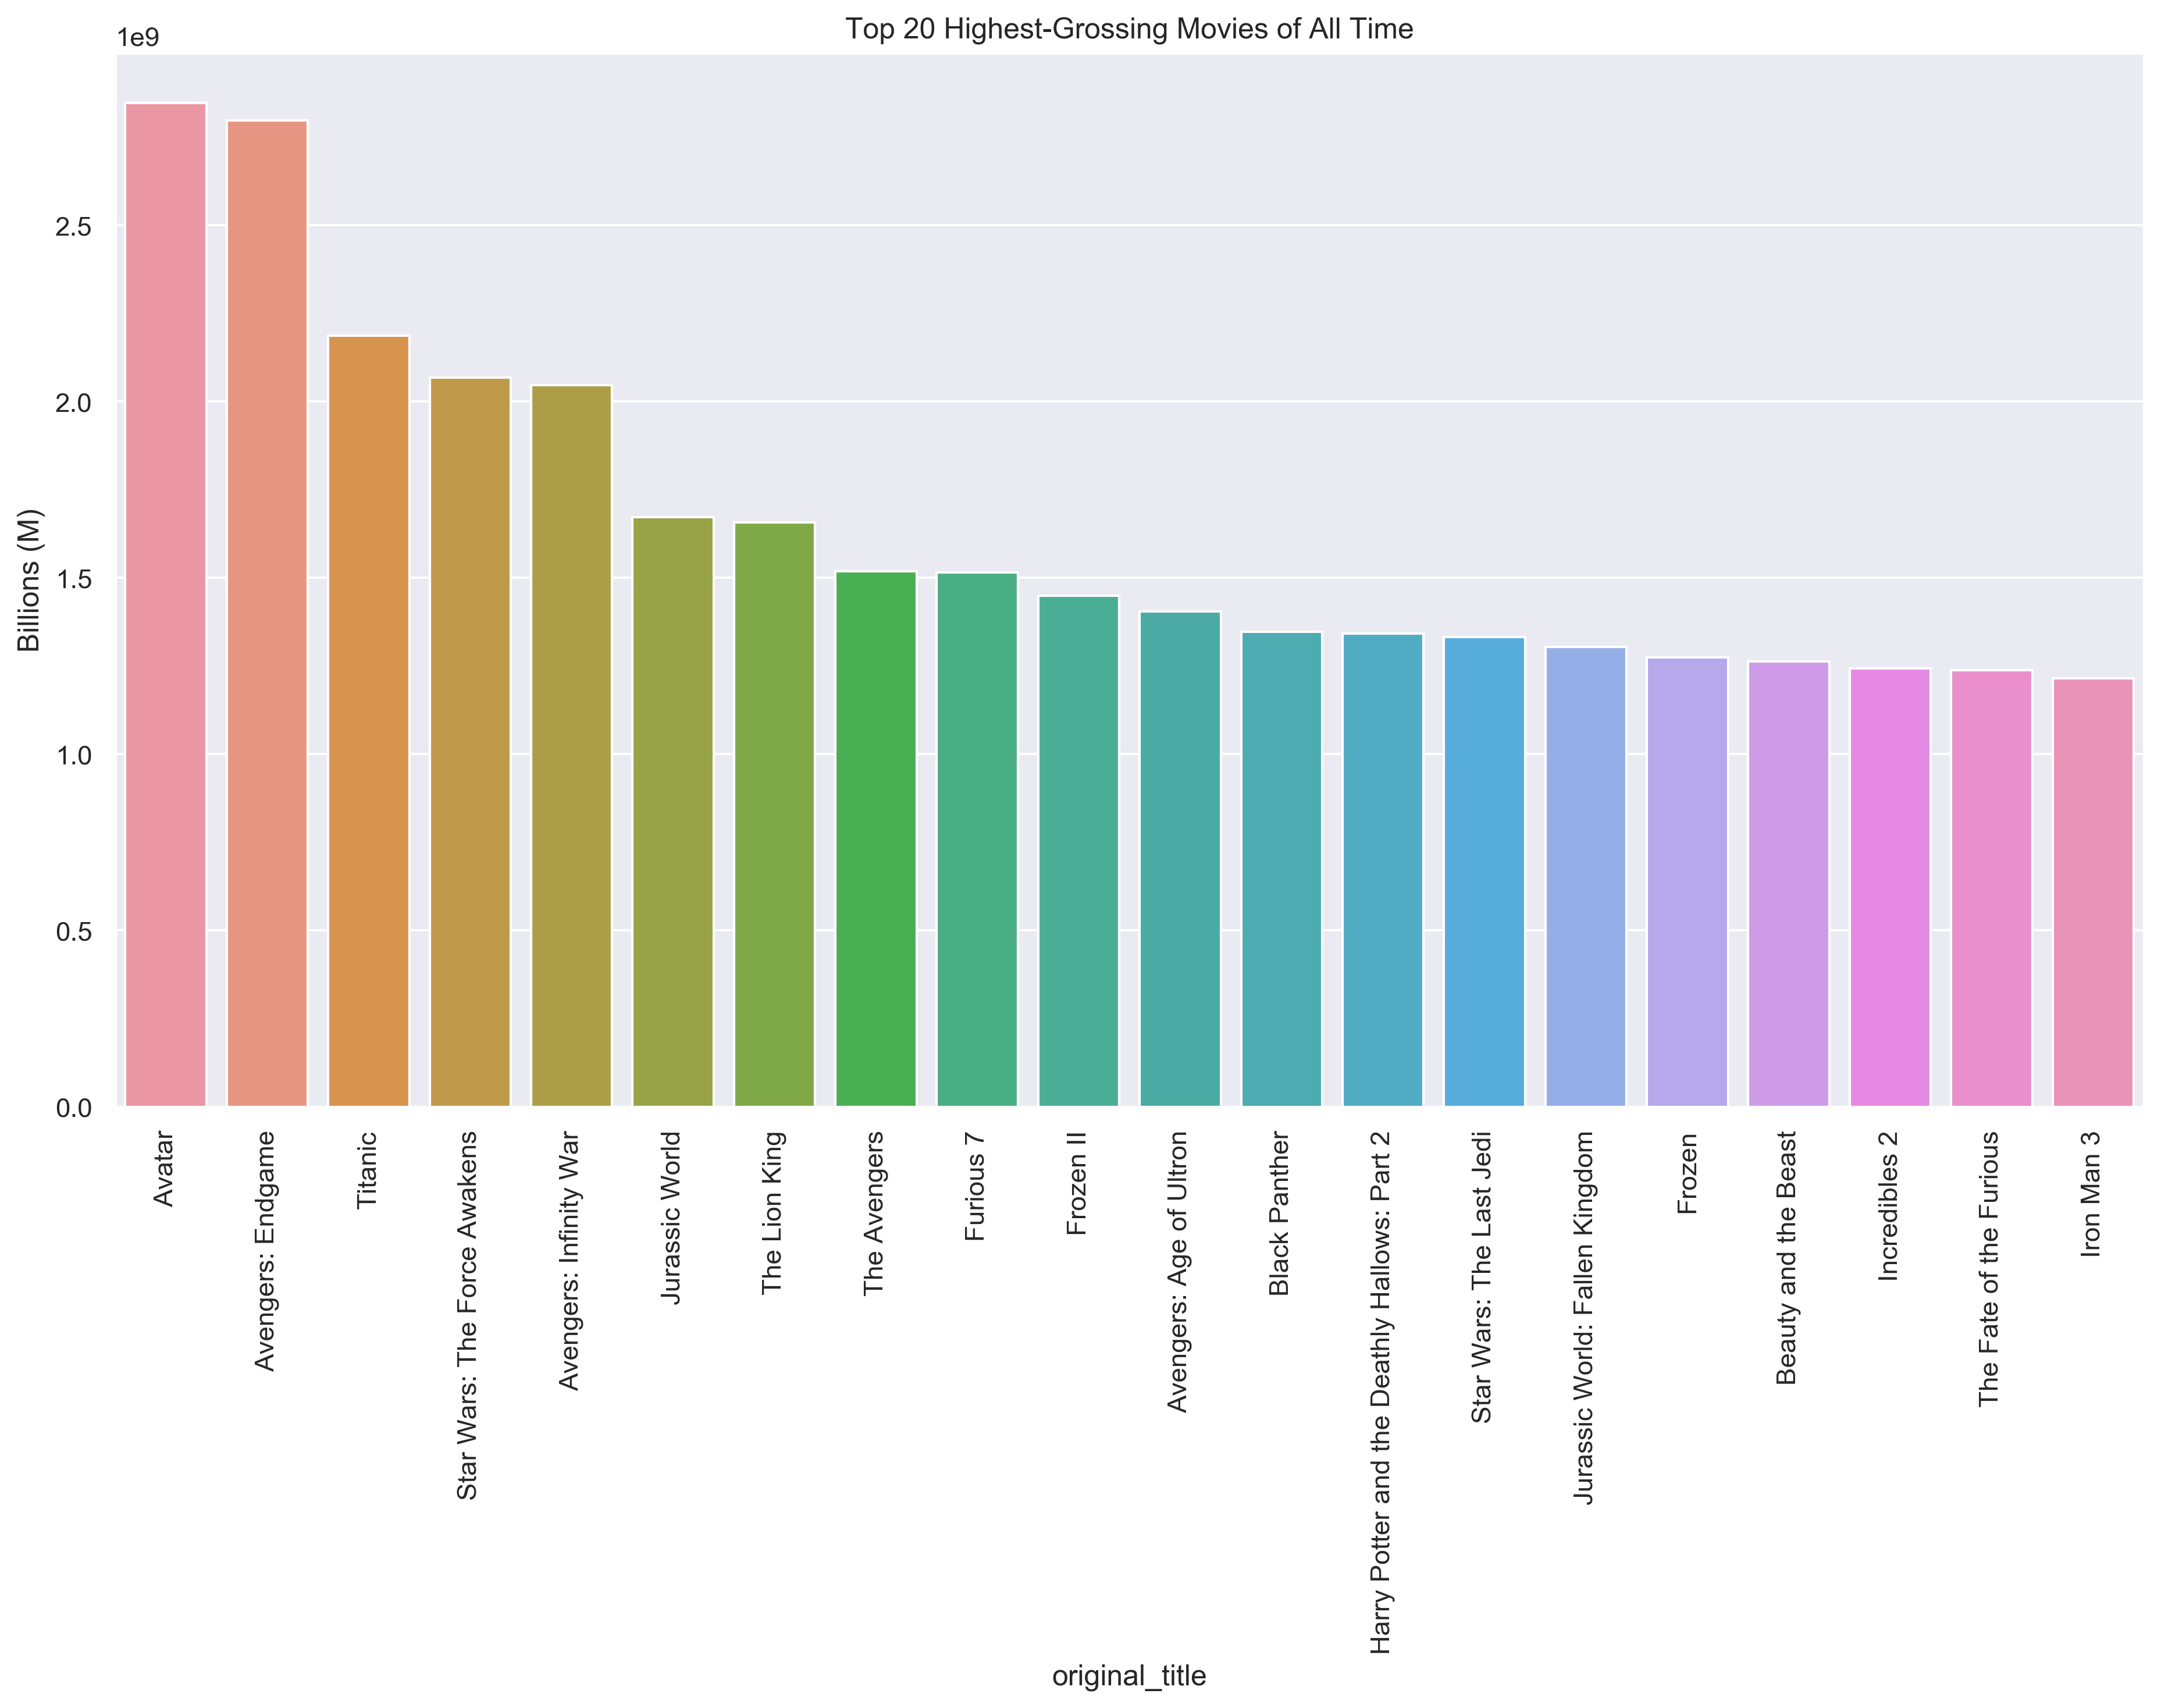

In [12]:
temp = df.sort_values('revenue_', ascending = False).head(20)
sns.barplot(temp.original_title, temp.revenue_)
plt.xticks(rotation = 90)
plt.ylabel('Billions (M)')
plt.title('Top 20 Highest-Grossing Movies of All Time')
plt.show()

#### Top 10 Most Expensive Movies Of All Time

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38713 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28779 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38713 missing from current font.
  font.set_t

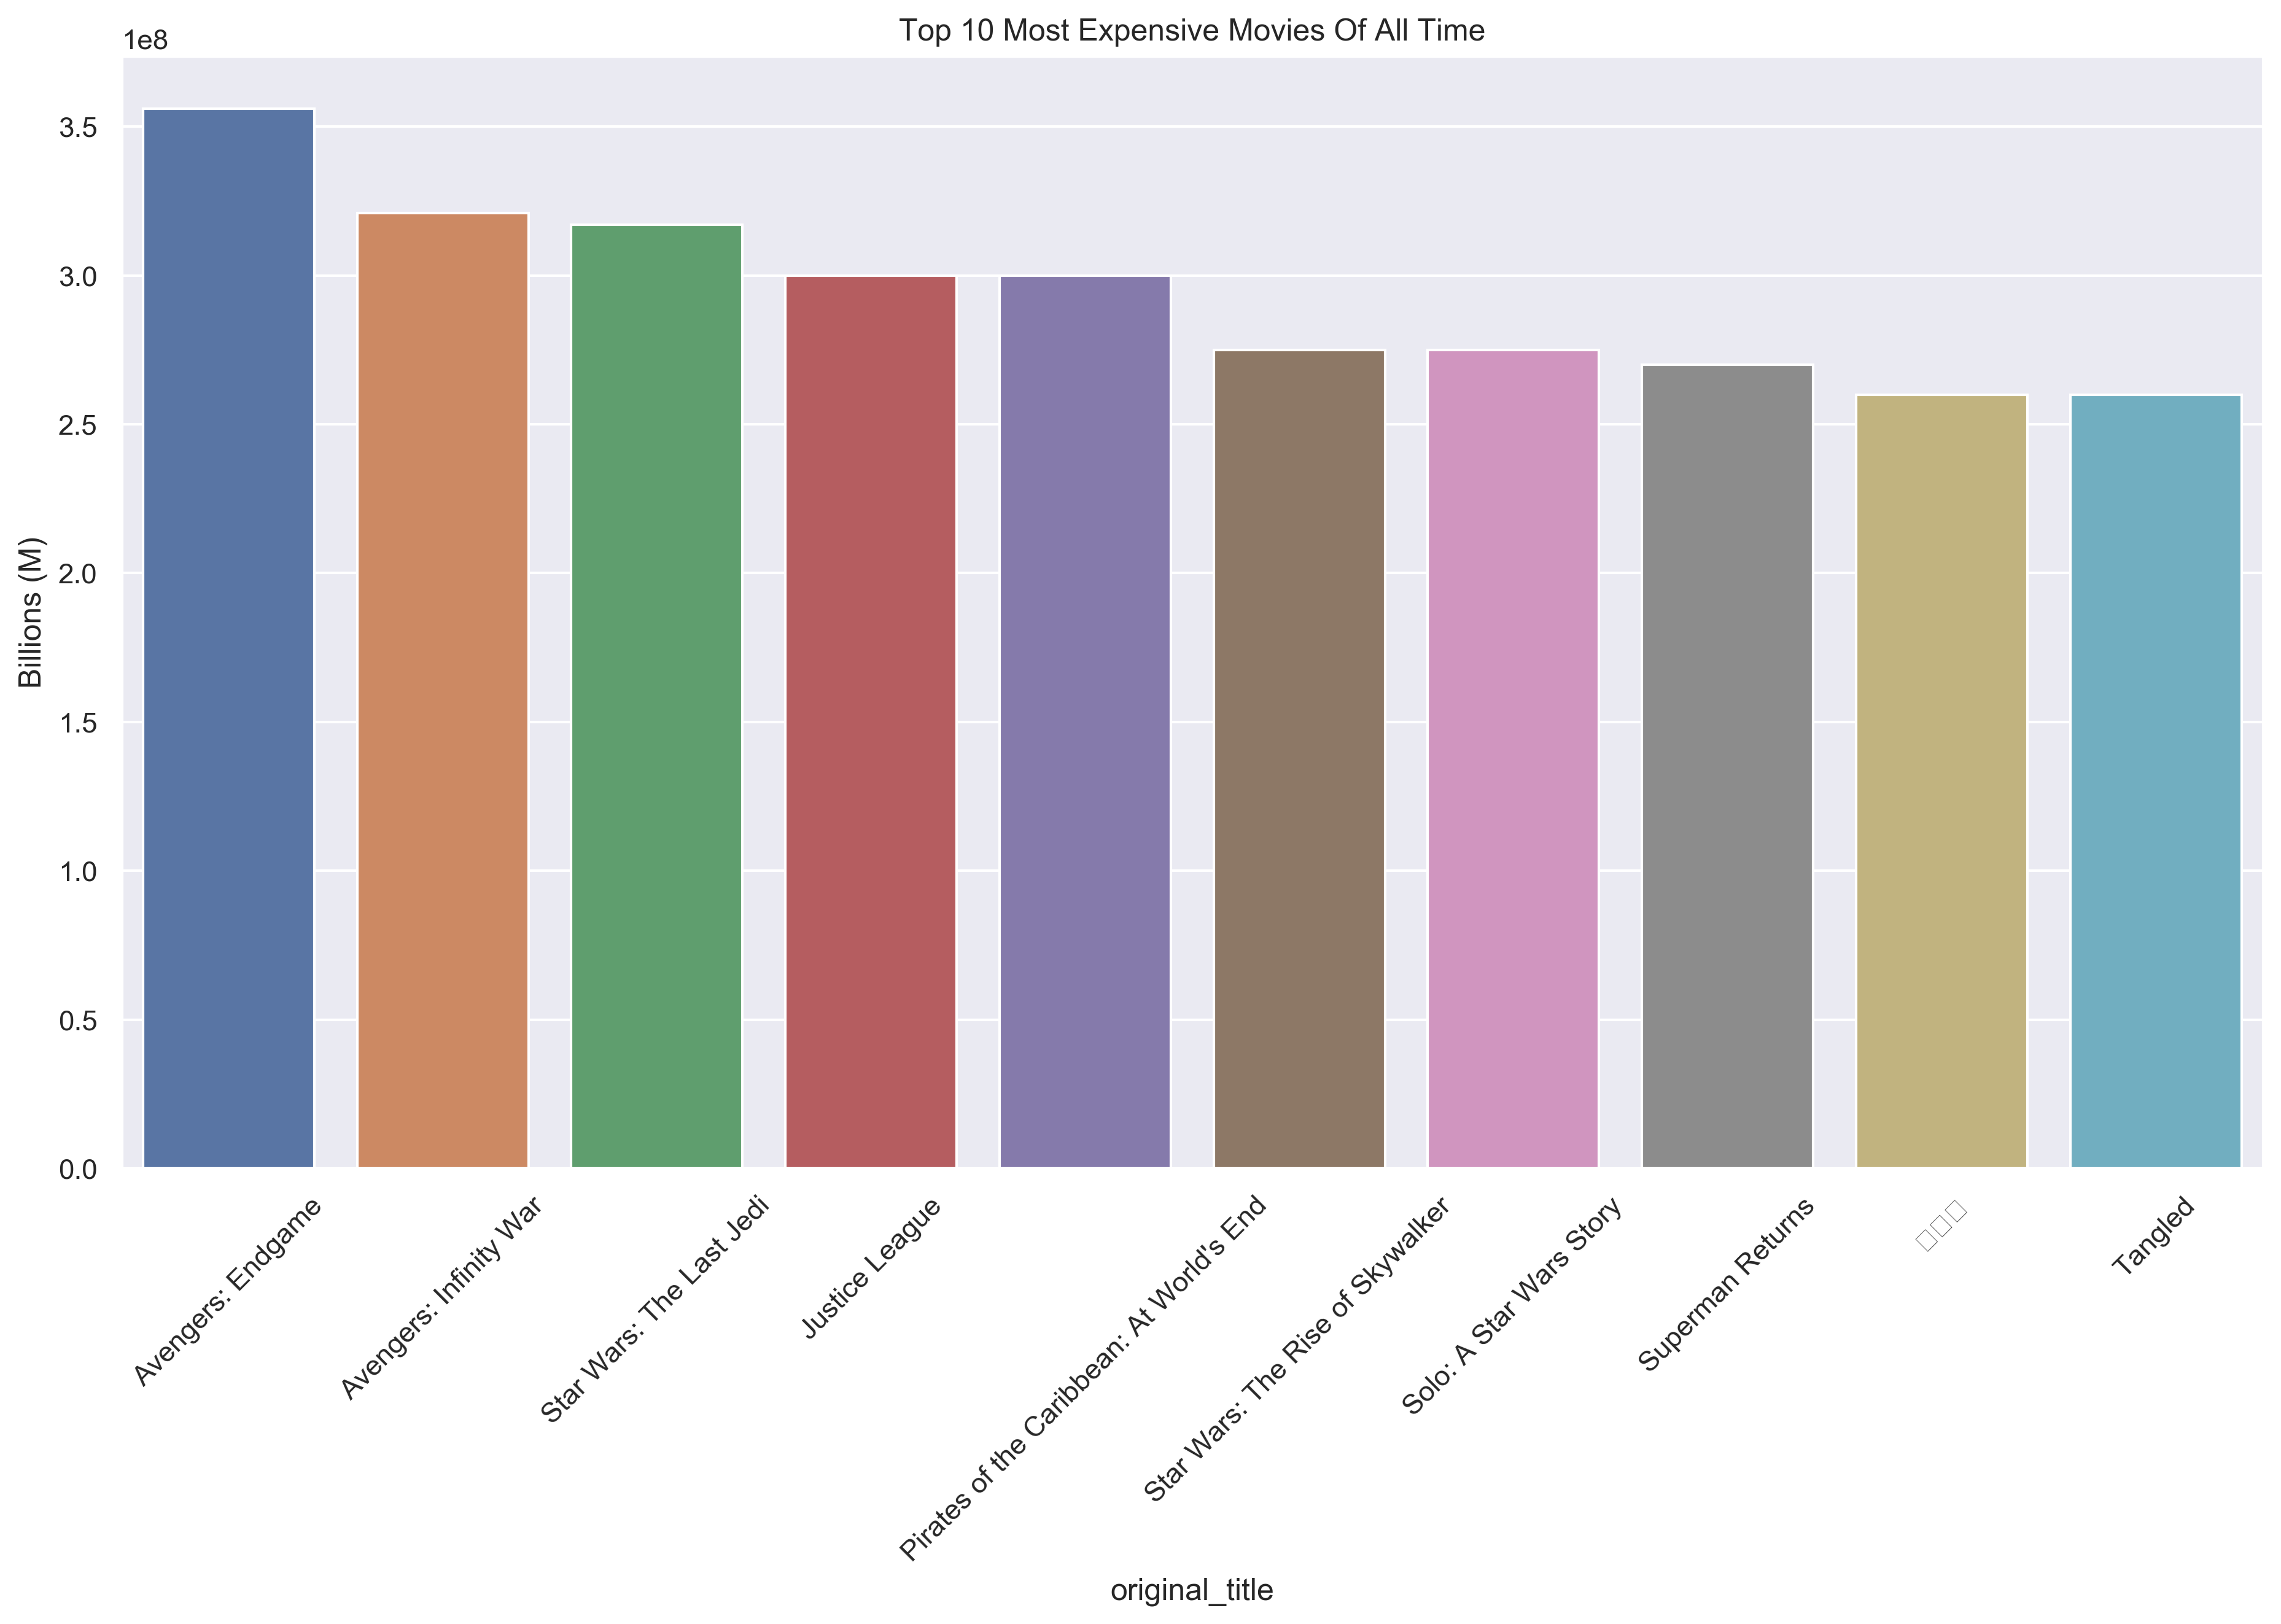

In [13]:
temp = df.sort_values('budget', ascending = False).head(10)
sns.barplot(temp.original_title, temp.budget)
plt.xticks(rotation = 45)
plt.ylabel('Billions (M)')
plt.title('Top 10 Most Expensive Movies Of All Time')
plt.show()

#### Top 20 Longest Movies of All Time'

In [14]:
temp = df.sort_values('runtime', ascending = False).head(20)
display(temp[['original_title', 'runtime']])

original_title  \
id                                                                       
45560                                            Berlin Alexanderplatz   
222724  Crystal Lake Memories: The Complete History of Friday the 13th   
11659                                               La meglio gioventù   
3870                                                         Novecento   
10655                                                       Gettysburg   
8095                                                         Cleopatra   
414419                              Kill Bill: The Whole Bloody Affair   
791373                                    Zack Snyder's Justice League   
10549                                                           Hamlet   
37757                         Never Sleep Again: The Elm Street Legacy   
19496                                               Salem Witch Trials   
12627                                                La Belle Noiseuse   
28422                                                           愛のむきだし   
770                                                 Gone with the Wind   
311                                        Once Upon a Time in America   
947                                                 Lawrence of Arabia   
9459                                                         Woodstock   
19666                                                             लगान   
665                                                            Ben-Hur   
6844                                              The Ten Commandments   

        runtime  
id               
45560     902.0  
222724    400.0  
11659     366.0  
3870      317.0  
10655     271.0  
8095      248.0  
414419    247.0  
791373    242.0  
10549     242.0  
37757     240.0  
19496     240.0  
12627     238.0  
28422     237.0  
770       233.0  
311       229.0  
947       227.0  
9459      225.0  
19666     224.0  
665       222.0  
6844      220.0

#### Top 20 Highest-Rating Movies of All Time'

In [15]:
temp = df.sort_values('vote_average', ascending = False).head(20)
display(temp[['original_title', 'vote_average']])

original_title  vote_average
id                                                         
786568               Toy Story 3 in Real Life          10.0
849591                Halo: The Fall of Reach           9.5
329824                          Ebola Zombies           9.5
739936                          French Lolita           9.3
820232                              鬼滅の刃 兄妹の絆           9.3
730647                      브레이크 더 사일런스: 더 무비           9.2
529414      Franco Escamilla: Por La Anécdota           9.2
657847             Mr. Robot: Behind the Mask           9.1
753230  Las tres muertes de Marisela Escobedo           9.0
105825                              聊齋三集之燈草和尚           9.0
667257                       Cosas imposibles           9.0
717280                                The Act           9.0
732439                     The End of Pokémon           9.0
284866                         Sonic Prologue           8.9
652837                              ジョゼと虎と魚たち           8.9
568300                           러브 유어셀프 인 서울           8.9
632632                                 映画 ギヴン           8.8
278698                         Avatar Spirits           8.8
19404            दिलवाले दुल्हनिया ले जायेंगे           8.8
283566                      シン・エヴァンゲリオン劇場版:||           8.8

#### Top 10 Trending Movies of (August 2021)'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


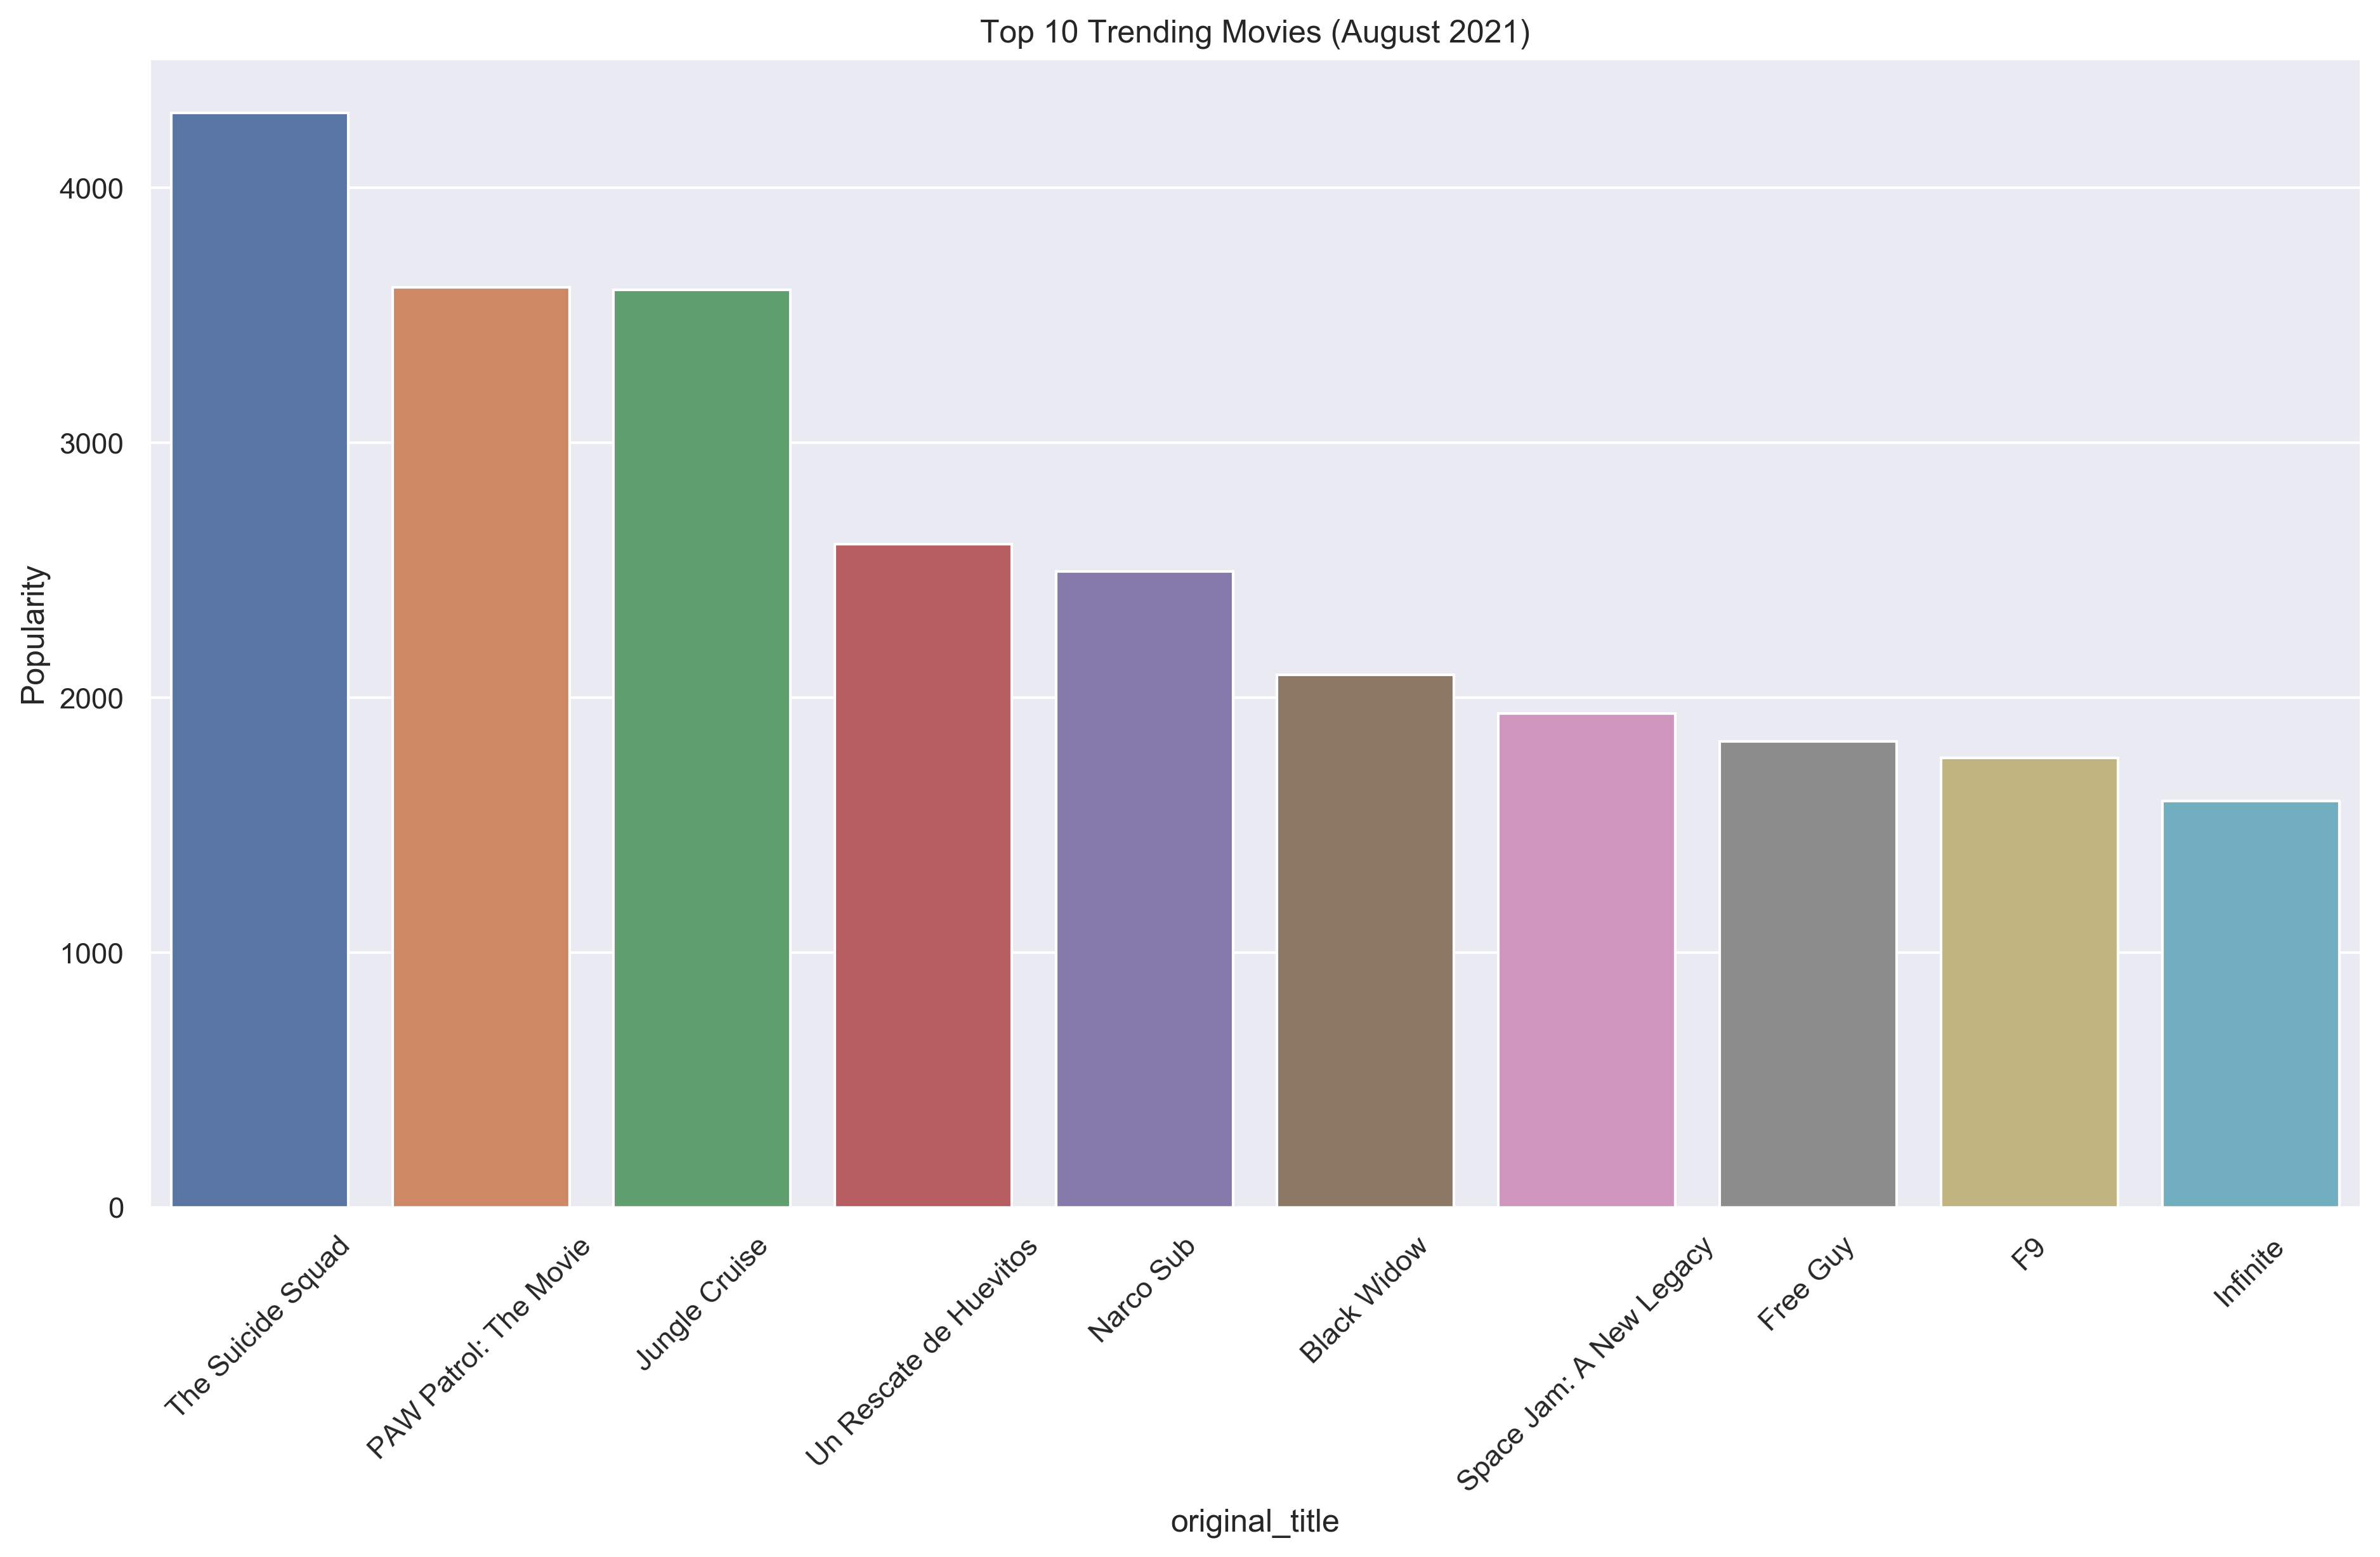

In [16]:
temp = df.sort_values('popularity', ascending = False).head(10)
sns.barplot(temp.original_title, temp.popularity)
plt.xticks(rotation = 45)
plt.ylabel('Popularity')
plt.title('Top 10 Trending Movies (August 2021)')
plt.show()

#### Top 5 Oldest Movies (From database)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


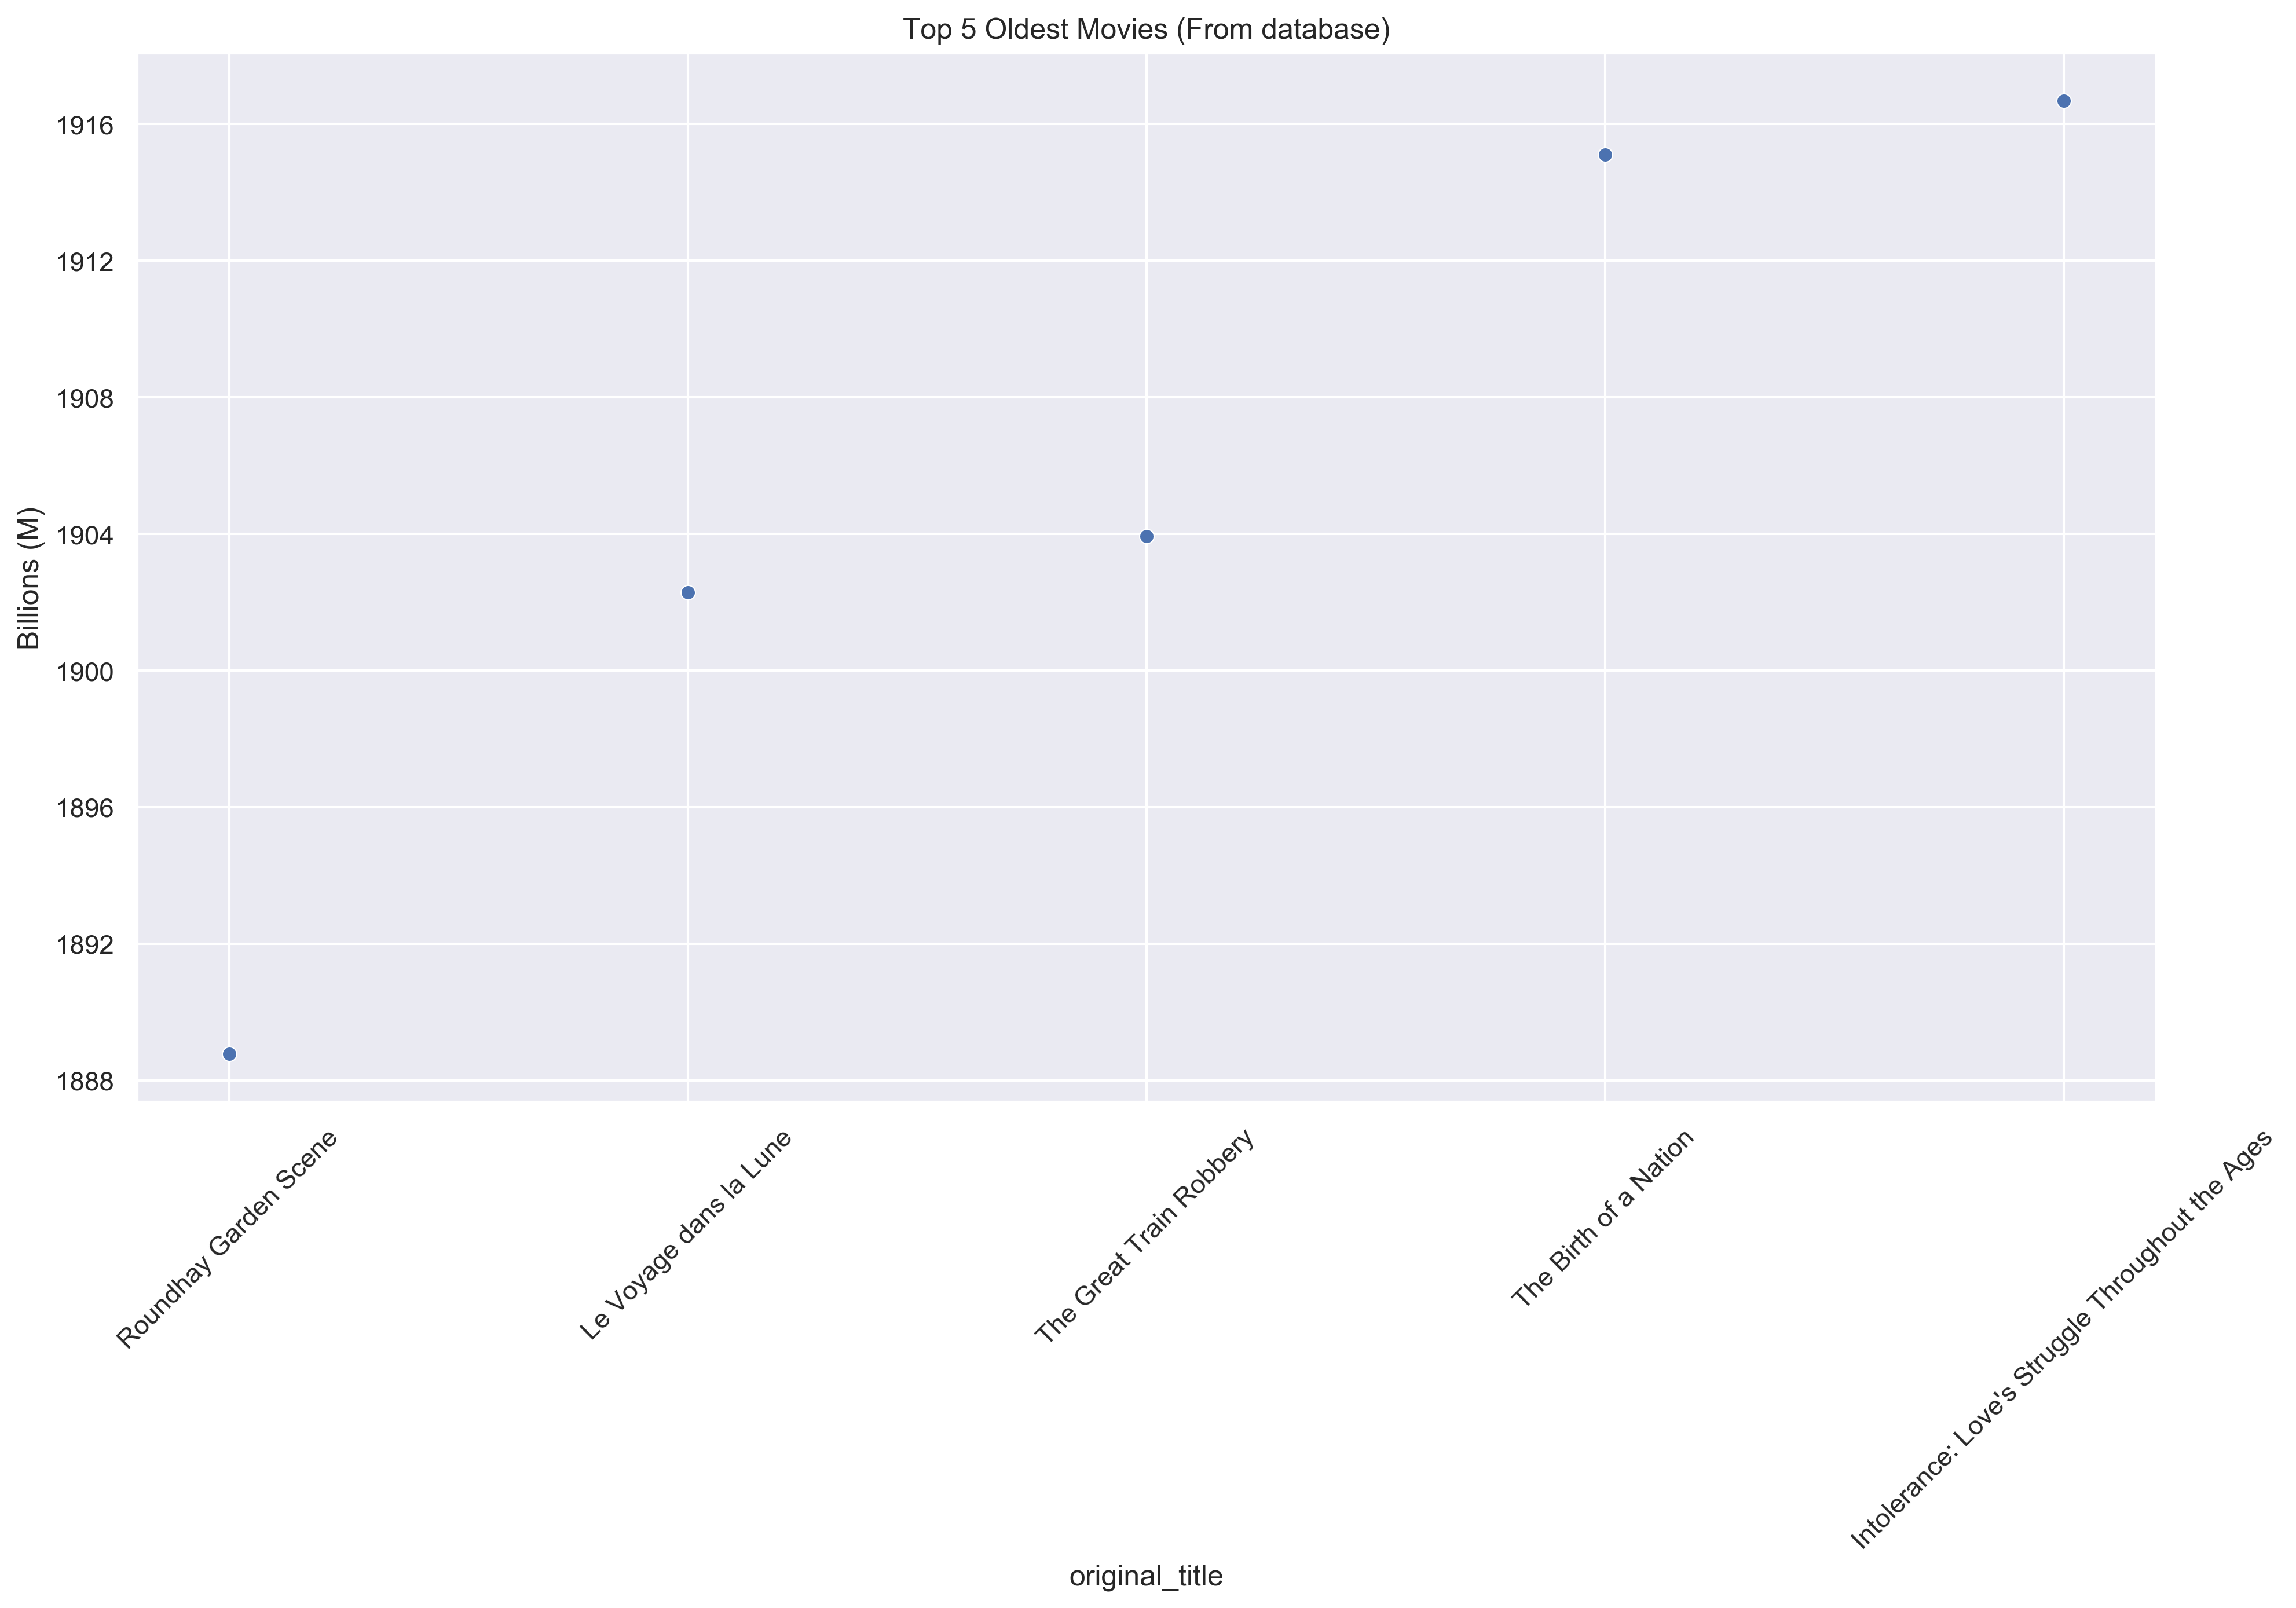

In [17]:
temp = df.sort_values('release_date').head(5)
sns.scatterplot(temp.original_title, temp.release_date)
plt.xticks(rotation = 45)
plt.ylabel('Billions (M)')
plt.title('Top 5 Oldest Movies (From database)')
plt.show()

#### The 10 Highest Grossing Actors of All-Time

In [18]:
temp = df[['cast', 'vote_average', 'budget', 'revenue_']]
temp = temp.dropna(subset = ['vote_average', 'budget', 'revenue_'])
temp = temp.explode('cast')

def treat_cast(val):
    try:
        return val[0]
    except:
        return np.nan

def treat_cast1(val):
    try:
        return val[1]
    except:
        return np.nan

def treat_cast2(val):
    try:
        return val[2]
    except:
        return np.nan

def treat_cast3(val):
    try:
        return val[3]
    except:
        return np.nan

def display_cast(name):
    global count
    url = 'https://vi.wikipedia.org/wiki/' + "_".join(name.split())
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    
    # img_link = soup.select('#mw-content-text > div.mw-parser-output > table.infobox.biography.vcard > tbody > tr:nth-of-type(2) > td > a > img')[0]['src']
    img_link = soup.find('img')['src']
    response = requests.get(f'https:{img_link}')

    # importing modules
    import urllib.request
    import matplotlib.image as mpimg
    
    urllib.request.urlretrieve(f"https:{img_link}", "img.jpg")
    img = mpimg.imread('img.jpg')
    plt.figure(figsize = (5, 3))
    plt.gcf().set_dpi(100)
    imgplot = plt.imshow(img)

    plt.axis('off')
    plt.title(name)
    plt.show()

temp['name'] = temp['cast'].apply(treat_cast)
temp['gender'] = temp['cast'].apply(treat_cast1)
temp['popularity'] = temp['cast'].apply(treat_cast2)
temp['character'] = temp['cast'].apply(treat_cast3)
temp = temp.dropna()


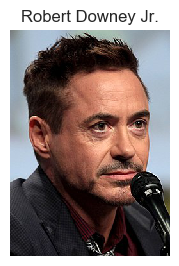

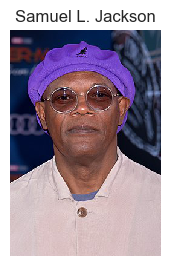

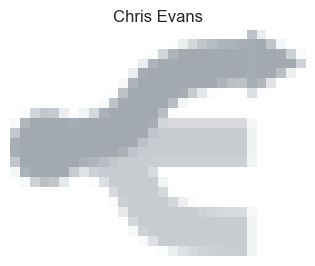

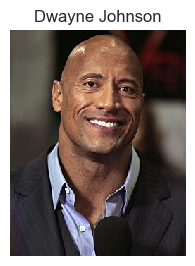

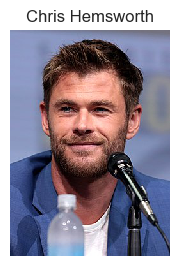

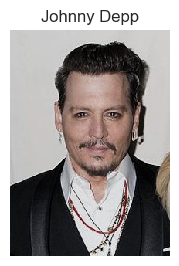

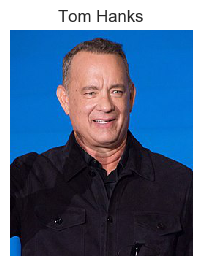

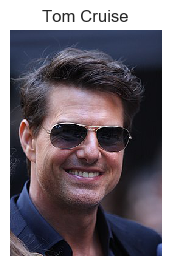

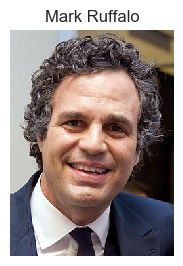

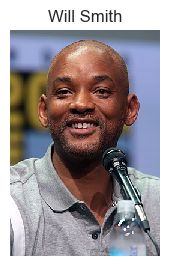

name      revenue_
0  Robert Downey Jr.  1.459505e+10
1  Samuel L. Jackson  1.167806e+10
2        Chris Evans  1.156526e+10
3     Dwayne Johnson  1.137446e+10
4    Chris Hemsworth  1.116755e+10
5        Johnny Depp  1.066610e+10
6          Tom Hanks  1.064165e+10
7         Tom Cruise  1.049898e+10
8       Mark Ruffalo  9.836924e+09
9         Will Smith  9.477434e+09

In [19]:
gender = 2
top_cast_df = temp[temp['gender'] == gender]
top_cast_df = pd.DataFrame(top_cast_df.groupby(['name'])['revenue_'].sum().sort_values(ascending = False)).head(10)
top_cast_df = top_cast_df.reset_index()
_ = top_cast_df.name.apply(display_cast)
display(top_cast_df)


#### The 10 Highest Grossing Actress of All-Time

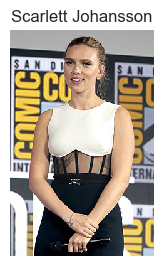

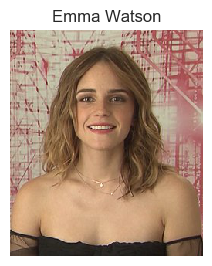

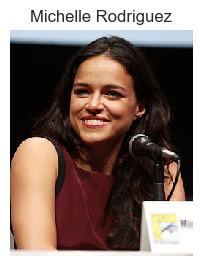

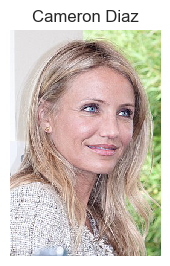

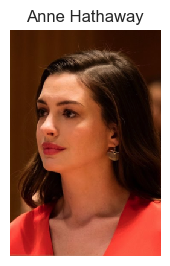

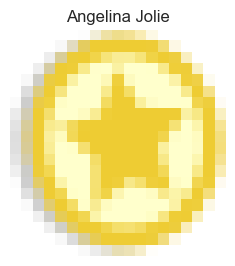

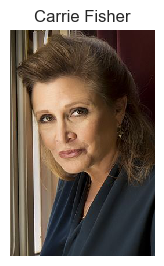

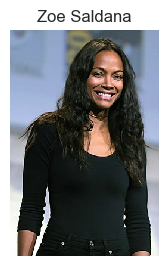

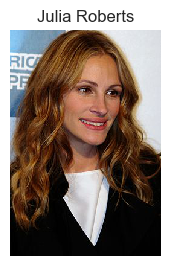

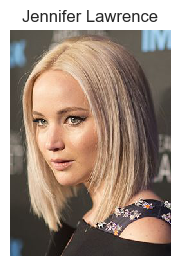

name      revenue_
0  Scarlett Johansson  1.469975e+10
1         Emma Watson  9.730922e+09
2  Michelle Rodriguez  8.308009e+09
3        Cameron Diaz  7.064622e+09
4       Anne Hathaway  6.754784e+09
5      Angelina Jolie  6.526952e+09
6       Carrie Fisher  6.526804e+09
7         Zoe Saldana  6.204332e+09
8       Julia Roberts  5.983636e+09
9   Jennifer Lawrence  5.750903e+09

In [20]:
gender = 1
top_cast_df = temp[temp['gender'] == gender]
top_cast_df = pd.DataFrame(top_cast_df.groupby(['name'])['revenue_'].sum().sort_values(ascending = False)).head(10)
top_cast_df = top_cast_df.reset_index()
_ = top_cast_df.name.apply(display_cast)
display(top_cast_df)


#### Top 10 blockbuster actors

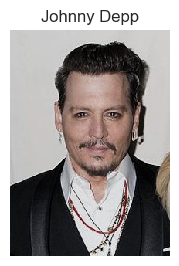

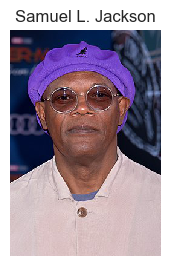

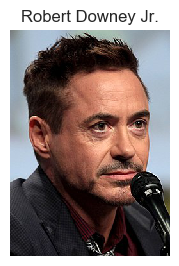

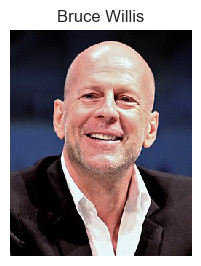

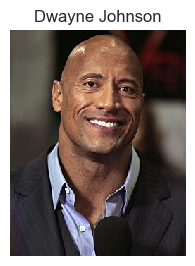

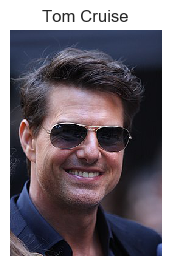

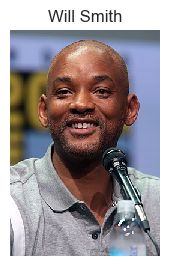

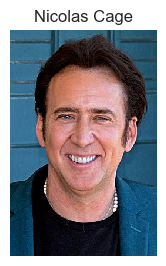

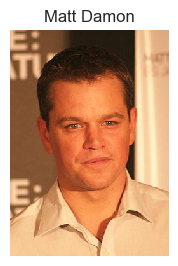

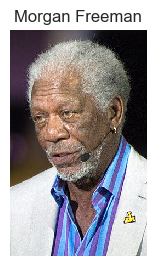

name        budget
0        Johnny Depp  3.695231e+09
1  Samuel L. Jackson  3.506664e+09
2  Robert Downey Jr.  3.291473e+09
3       Bruce Willis  2.966526e+09
4     Dwayne Johnson  2.932000e+09
5         Tom Cruise  2.869500e+09
6         Will Smith  2.772100e+09
7       Nicolas Cage  2.671199e+09
8         Matt Damon  2.648587e+09
9     Morgan Freeman  2.617178e+09

In [21]:
gender = 2
top_cast_df = temp[temp['gender'] == gender]
top_cast_df = pd.DataFrame(top_cast_df.groupby(['name'])['budget'].sum().sort_values(ascending = False)).head(10)

top_cast_df = top_cast_df.reset_index()

top_cast_df.name.apply(display_cast)
display(top_cast_df)

#### Top 10 blockbuster actress

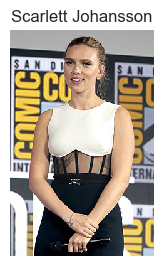

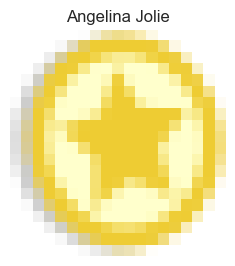

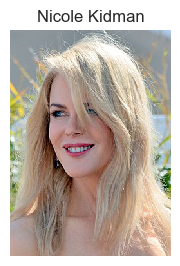

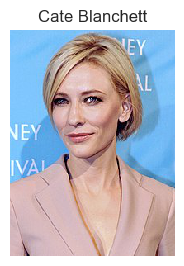

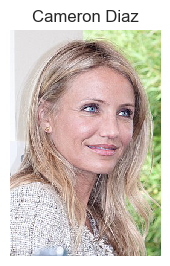

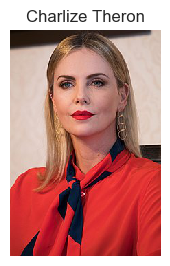

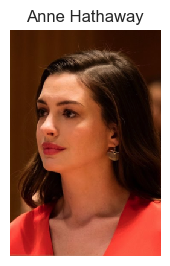

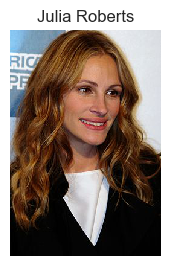

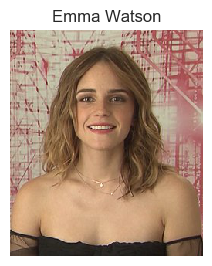

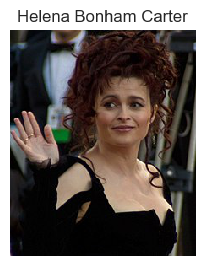

name        budget
0    Scarlett Johansson  3.175564e+09
1        Angelina Jolie  2.461532e+09
2         Nicole Kidman  2.116388e+09
3        Cate Blanchett  1.977410e+09
4          Cameron Diaz  1.843081e+09
5       Charlize Theron  1.807146e+09
6         Anne Hathaway  1.689680e+09
7         Julia Roberts  1.678500e+09
8           Emma Watson  1.674466e+09
9  Helena Bonham Carter  1.614385e+09

In [22]:
gender = 1
top_cast_df = temp[temp['gender'] == gender]
top_cast_df = pd.DataFrame(top_cast_df.groupby(['name'])['budget'].sum().sort_values(ascending = False)).head(10)

top_cast_df = top_cast_df.reset_index()

top_cast_df.name.apply(display_cast)
display(top_cast_df)

#### Top 10 characters actors of all time

In [23]:
top_chars = pd.DataFrame(temp.groupby(['name', 'character'])['revenue_'].sum().sort_values(ascending = False)).head(10)
top_chars = top_chars.reset_index()

top_chars['name'] =  + top_chars['character'] + ' - ' + top_chars['name']
display(top_chars[['name', 'revenue_']])


name      revenue_
0            Tony Stark / Iron Man - Robert Downey Jr.  1.222564e+10
1         Steve Rogers / Captain America - Chris Evans  1.000689e+10
2  Natasha Romanoff / Black Widow - Scarlett Johansson  1.000613e+10
3                       Thor Odinson - Chris Hemsworth  9.716135e+09
4                           Ron Weasley - Rupert Grint  7.706879e+09
5                       Hermione Granger - Emma Watson  7.706879e+09
6                      Harry Potter - Daniel Radcliffe  7.706879e+09
7                               Gandalf - Ian McKellen  5.852068e+09
8                         Dominic Toretto - Vin Diesel  5.435489e+09
9                         Luke Skywalker - Mark Hamill  5.028866e+09

#### Top 10 characters (highest revenue) of all time

In [24]:
top_chars = temp[temp['gender'] == 1]
top_chars = pd.DataFrame(top_chars.groupby(['character'])['revenue_'].sum().sort_values(ascending = False)).head(10)
top_chars = top_chars.reset_index()

display(top_chars)

character      revenue_
0  Natasha Romanoff / Black Widow  1.000613e+10
1                Hermione Granger  7.706879e+09
2             General Leia Organa  4.474908e+09
3                             Rey  4.474908e+09
4                      May Parker  3.617570e+09
5                      Bella Swan  3.343107e+09
6                       Lois Lane  3.186663e+09
7                  Claire Dearing  2.975173e+09
8          Princess Fiona (voice)  2.968173e+09
9                Katniss Everdeen  2.944163e+09

#### The 20 Highest Grossing Director - Screenplay of All-Time

In [25]:
temp = df[['crew', 'vote_average', 'budget', 'revenue_']]
temp = temp.dropna(subset = ['vote_average', 'budget', 'revenue_'])
temp = temp.explode('crew')


temp['name'] = temp['crew'].apply(treat_cast)
temp['gender'] = temp['crew'].apply(treat_cast1)
temp['popularity'] = temp['crew'].apply(treat_cast2)
temp['job'] = temp['crew'].apply(treat_cast3)
temp = temp.dropna()

In [26]:
top_chars = pd.DataFrame(temp.groupby(['name', 'job'])['revenue_'].sum().sort_values(ascending = False)).head(20)
top_chars = top_chars.reset_index()

display(top_chars)

name                      job      revenue_
0     Steven Spielberg                 Director  1.045067e+10
1      Stephen McFeely               Screenplay  9.394915e+09
2   Christopher Markus               Screenplay  9.394915e+09
3        Andrew Lesnie  Director of Photography  8.619159e+09
4       Dariusz Wolski  Director of Photography  7.680814e+09
5         Steve Kloves               Screenplay  7.578452e+09
6     John Schwartzman  Director of Photography  7.332944e+09
7        Trent Opaloch  Director of Photography  7.313463e+09
8          Don Burgess  Director of Photography  6.992217e+09
9        Anthony Russo                 Director  6.842534e+09
10           Joe Russo                 Director  6.842534e+09
11       Peter Jackson                 Director  6.540704e+09
12   Stephen F. Windon  Director of Photography  6.472048e+09
13         Michael Bay                 Director  6.451729e+09
14          Dan Mindel  Director of Photography  6.392737e+09
15     Janusz Kamiński  Director of Photography  6.353249e+09
16       James Cameron                 Director  6.285280e+09
17           Bill Pope  Director of Photography  6.104071e+09
18         Dean Semler  Director of Photography  6.100220e+09
19          Fran Walsh               Screenplay  6.062013e+09

## EDA + Cleaning + Features engineering

### Split dataset (train, valid, test - 50 - 20 - 30)

In [27]:
shuffle_df = df.sample(frac=1, random_state = 5)
n = shuffle_df.shape[0]
train_df = shuffle_df.iloc[0: n//2]
val_df = shuffle_df.iloc[int(n//2): int(n//(10/7))]
test_df = shuffle_df.iloc[int(n//(10/7)): ]
print(shuffle_df.shape)
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(12199, 26)
(6099, 26)
(2440, 26)
(3660, 26)


### Inspection

#### Missing values exploration

In [28]:
pd.DataFrame([(dataset.isnull().mean()*100).round(2) for dataset in [train_df, val_df, test_df]]).T.sort_values(0, ascending = False)

0      1      2
belongs_to_collection  76.50  77.21  75.98
homepage               61.75  63.65  64.13
tagline                29.45  29.80  28.66
revenue_               22.92  22.17  23.52
budget                 18.43  18.03  18.17
keywords               12.18  11.64  11.99
production_companies    3.53   4.02   3.39
production_countries    1.46   1.68   1.61
cast                    0.59   0.45   0.52
spoken_languages        0.54   0.53   0.68
crew                    0.49   0.37   0.66
vote_average            0.46   0.20   0.46
overview                0.41   0.49   0.60
genres                  0.39   0.33   0.33
poster_path             0.08   0.16   0.08
runtime                 0.03   0.08   0.03
status                  0.00   0.00   0.00
title                   0.00   0.00   0.00
video                   0.00   0.00   0.00
release_date            0.00   0.00   0.03
vote_count              0.00   0.00   0.00
popularity              0.00   0.00   0.00
original_title          0.00   0.00   0.00
original_language       0.00   0.00   0.00
imdb_id                 0.00   0.00   0.00
adult                   0.00   0.00   0.00

- Numerical cols: lượng missing ít, chỉ có cột budget và revenue, thực hiện drop cột revenue do đây là target feature
- Categorical cols: lượng missing nhiều, mình sẽ xử lí sau

#### Outliers

#### Explore numerical features

##### Univariate distribution

In [30]:
nume_train_df = train_df.select_dtypes(['int', 'float'])
nume_train_df.describe()

popularity      runtime  vote_average      revenue_        budget
count  6099.000000  6097.000000   6071.000000  4.701000e+03  4.975000e+03
mean     27.559016   101.673118      6.532087  6.480985e+07  2.259827e+07
std      95.710134    28.099127      0.900231  1.492638e+08  3.553949e+07
min       0.600000     0.000000      2.000000  1.000000e+00  0.000000e+00
25%       9.719500    90.000000      6.000000  2.159041e+06  1.809152e+06
50%      13.491000   100.000000      6.600000  1.479362e+07  9.800000e+06
75%      22.093500   114.000000      7.200000  6.061301e+07  2.800000e+07
max    3609.458000   902.000000      9.500000  2.797801e+09  3.560000e+08

- Popularity lệch quá nhiều và có outlier(mean = 29.13, 50% = 13, max = 4295)
- Runtime lệch ít hơn
- Vote average khá ổn
- Vote_count lệch nhiều bởi outlier
- revenue, budget cần theo dõi bằng plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


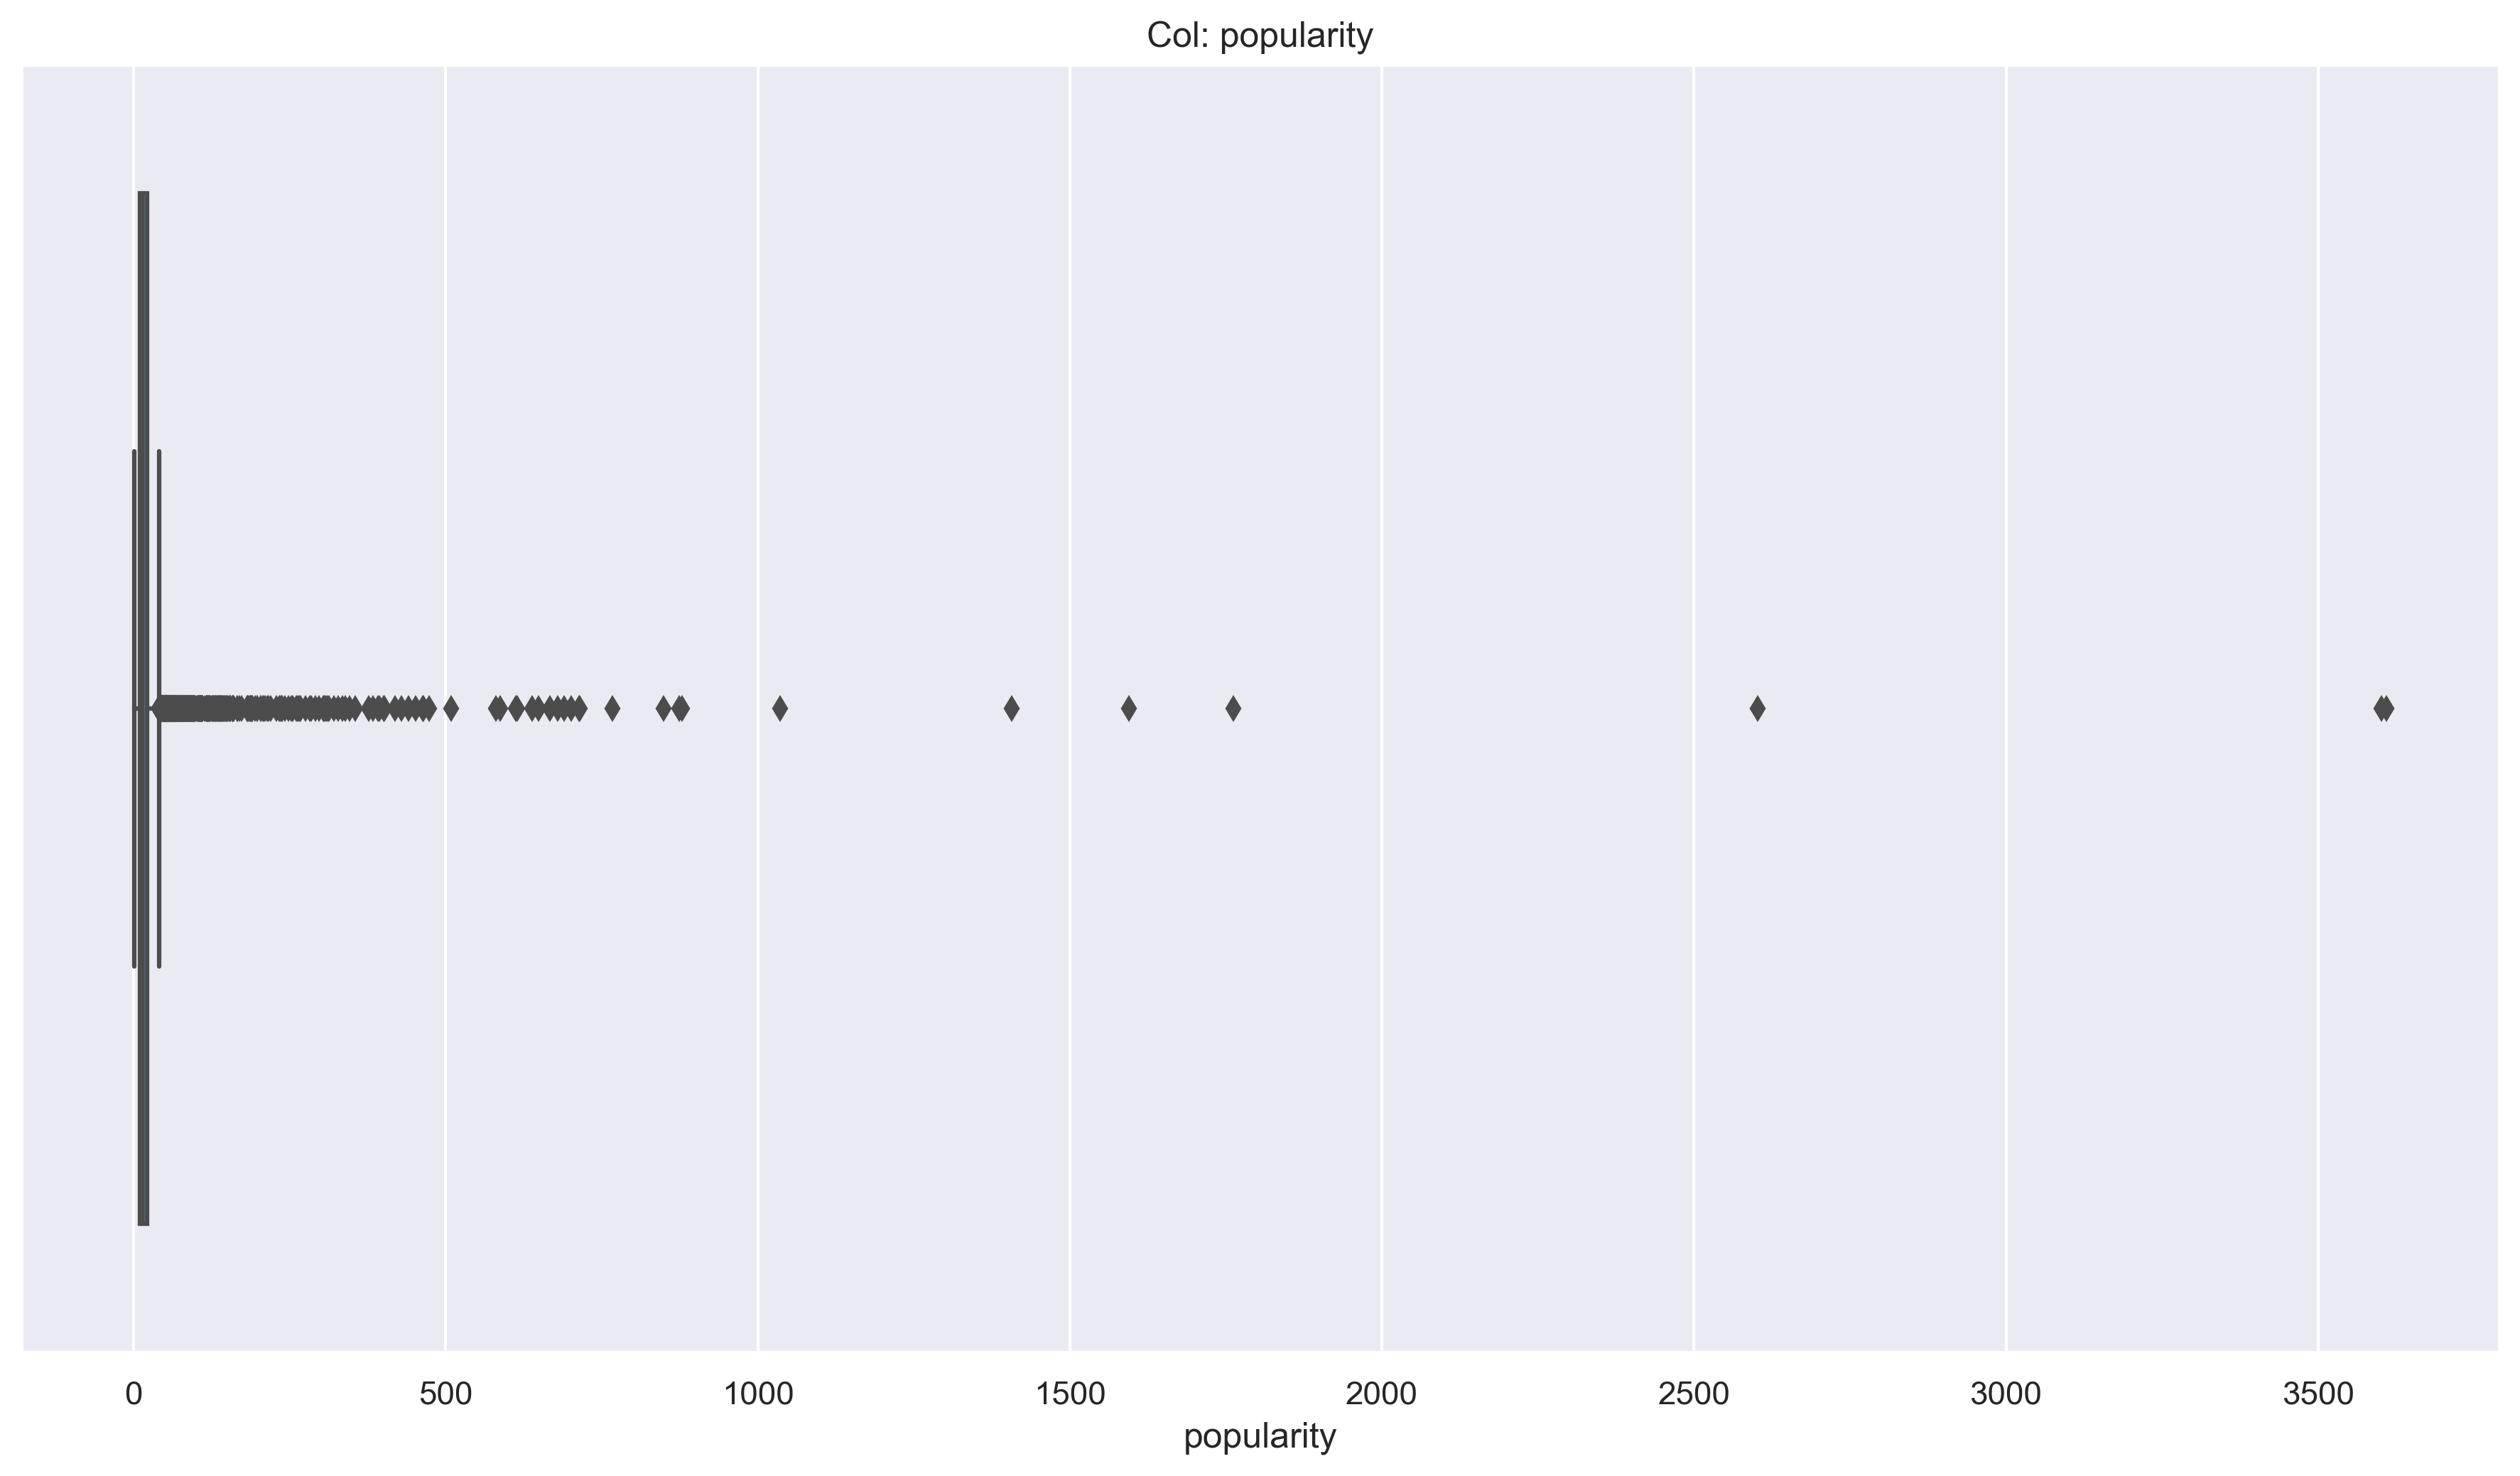

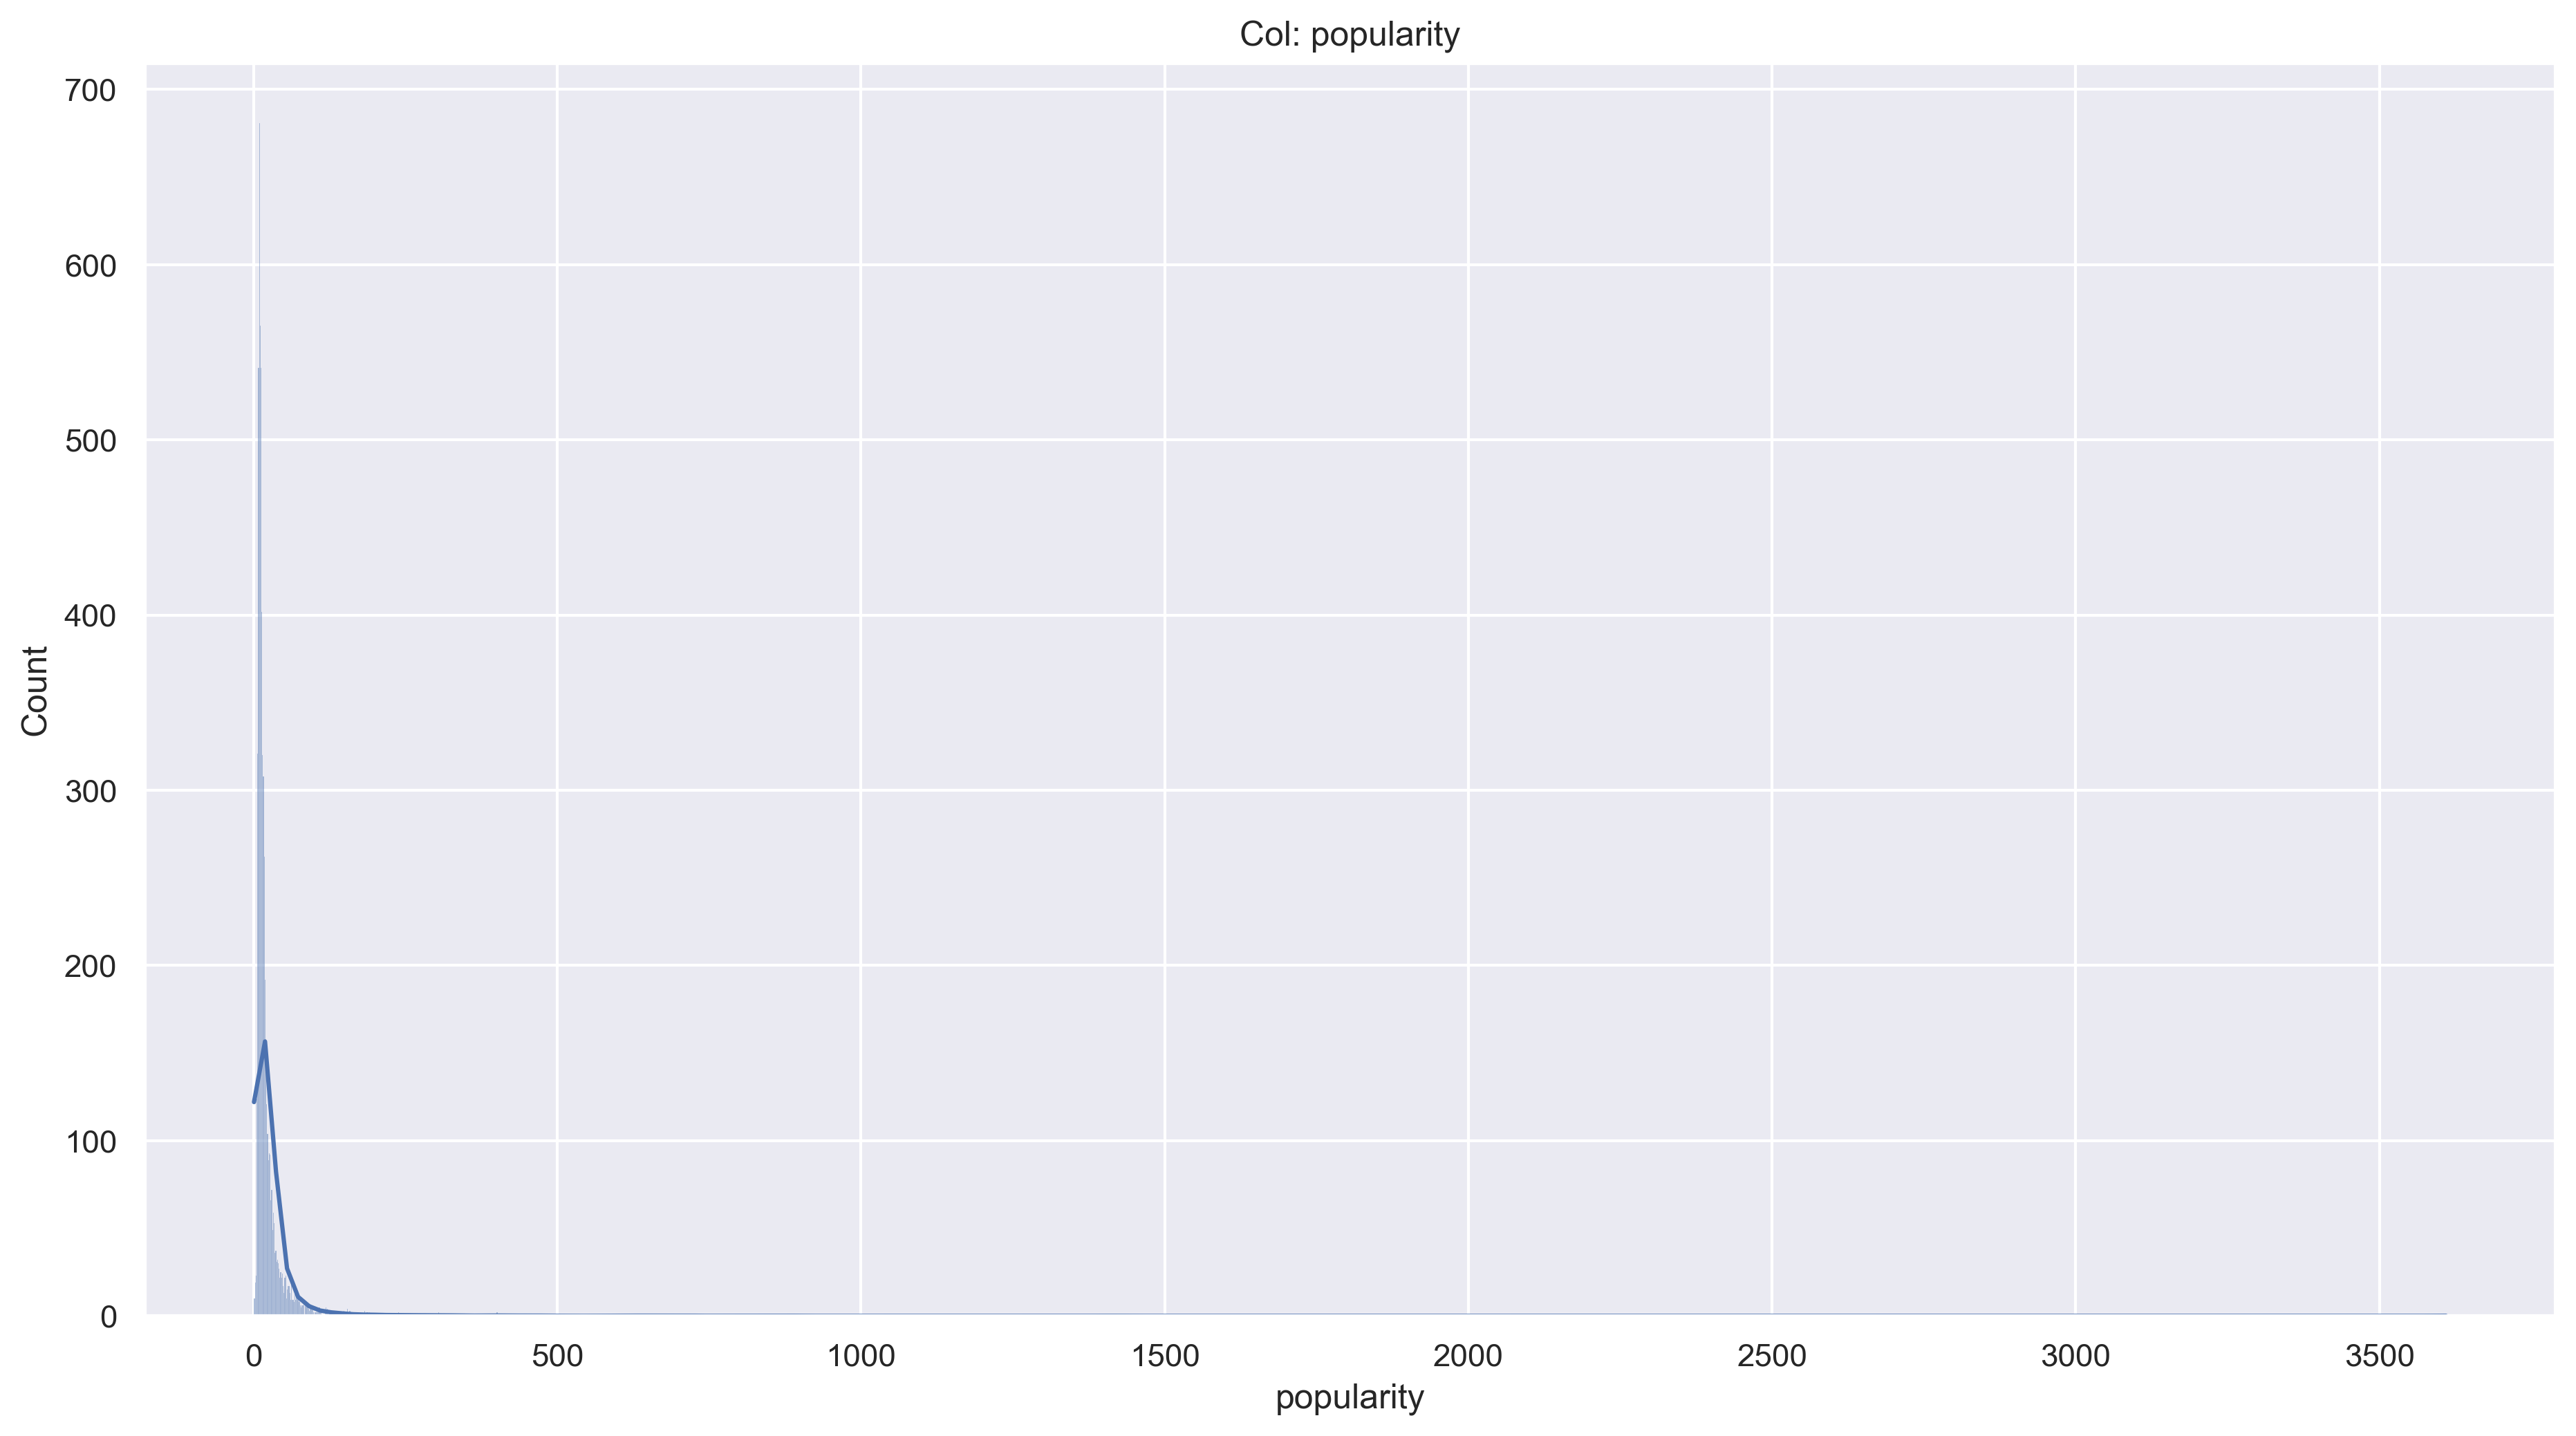

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


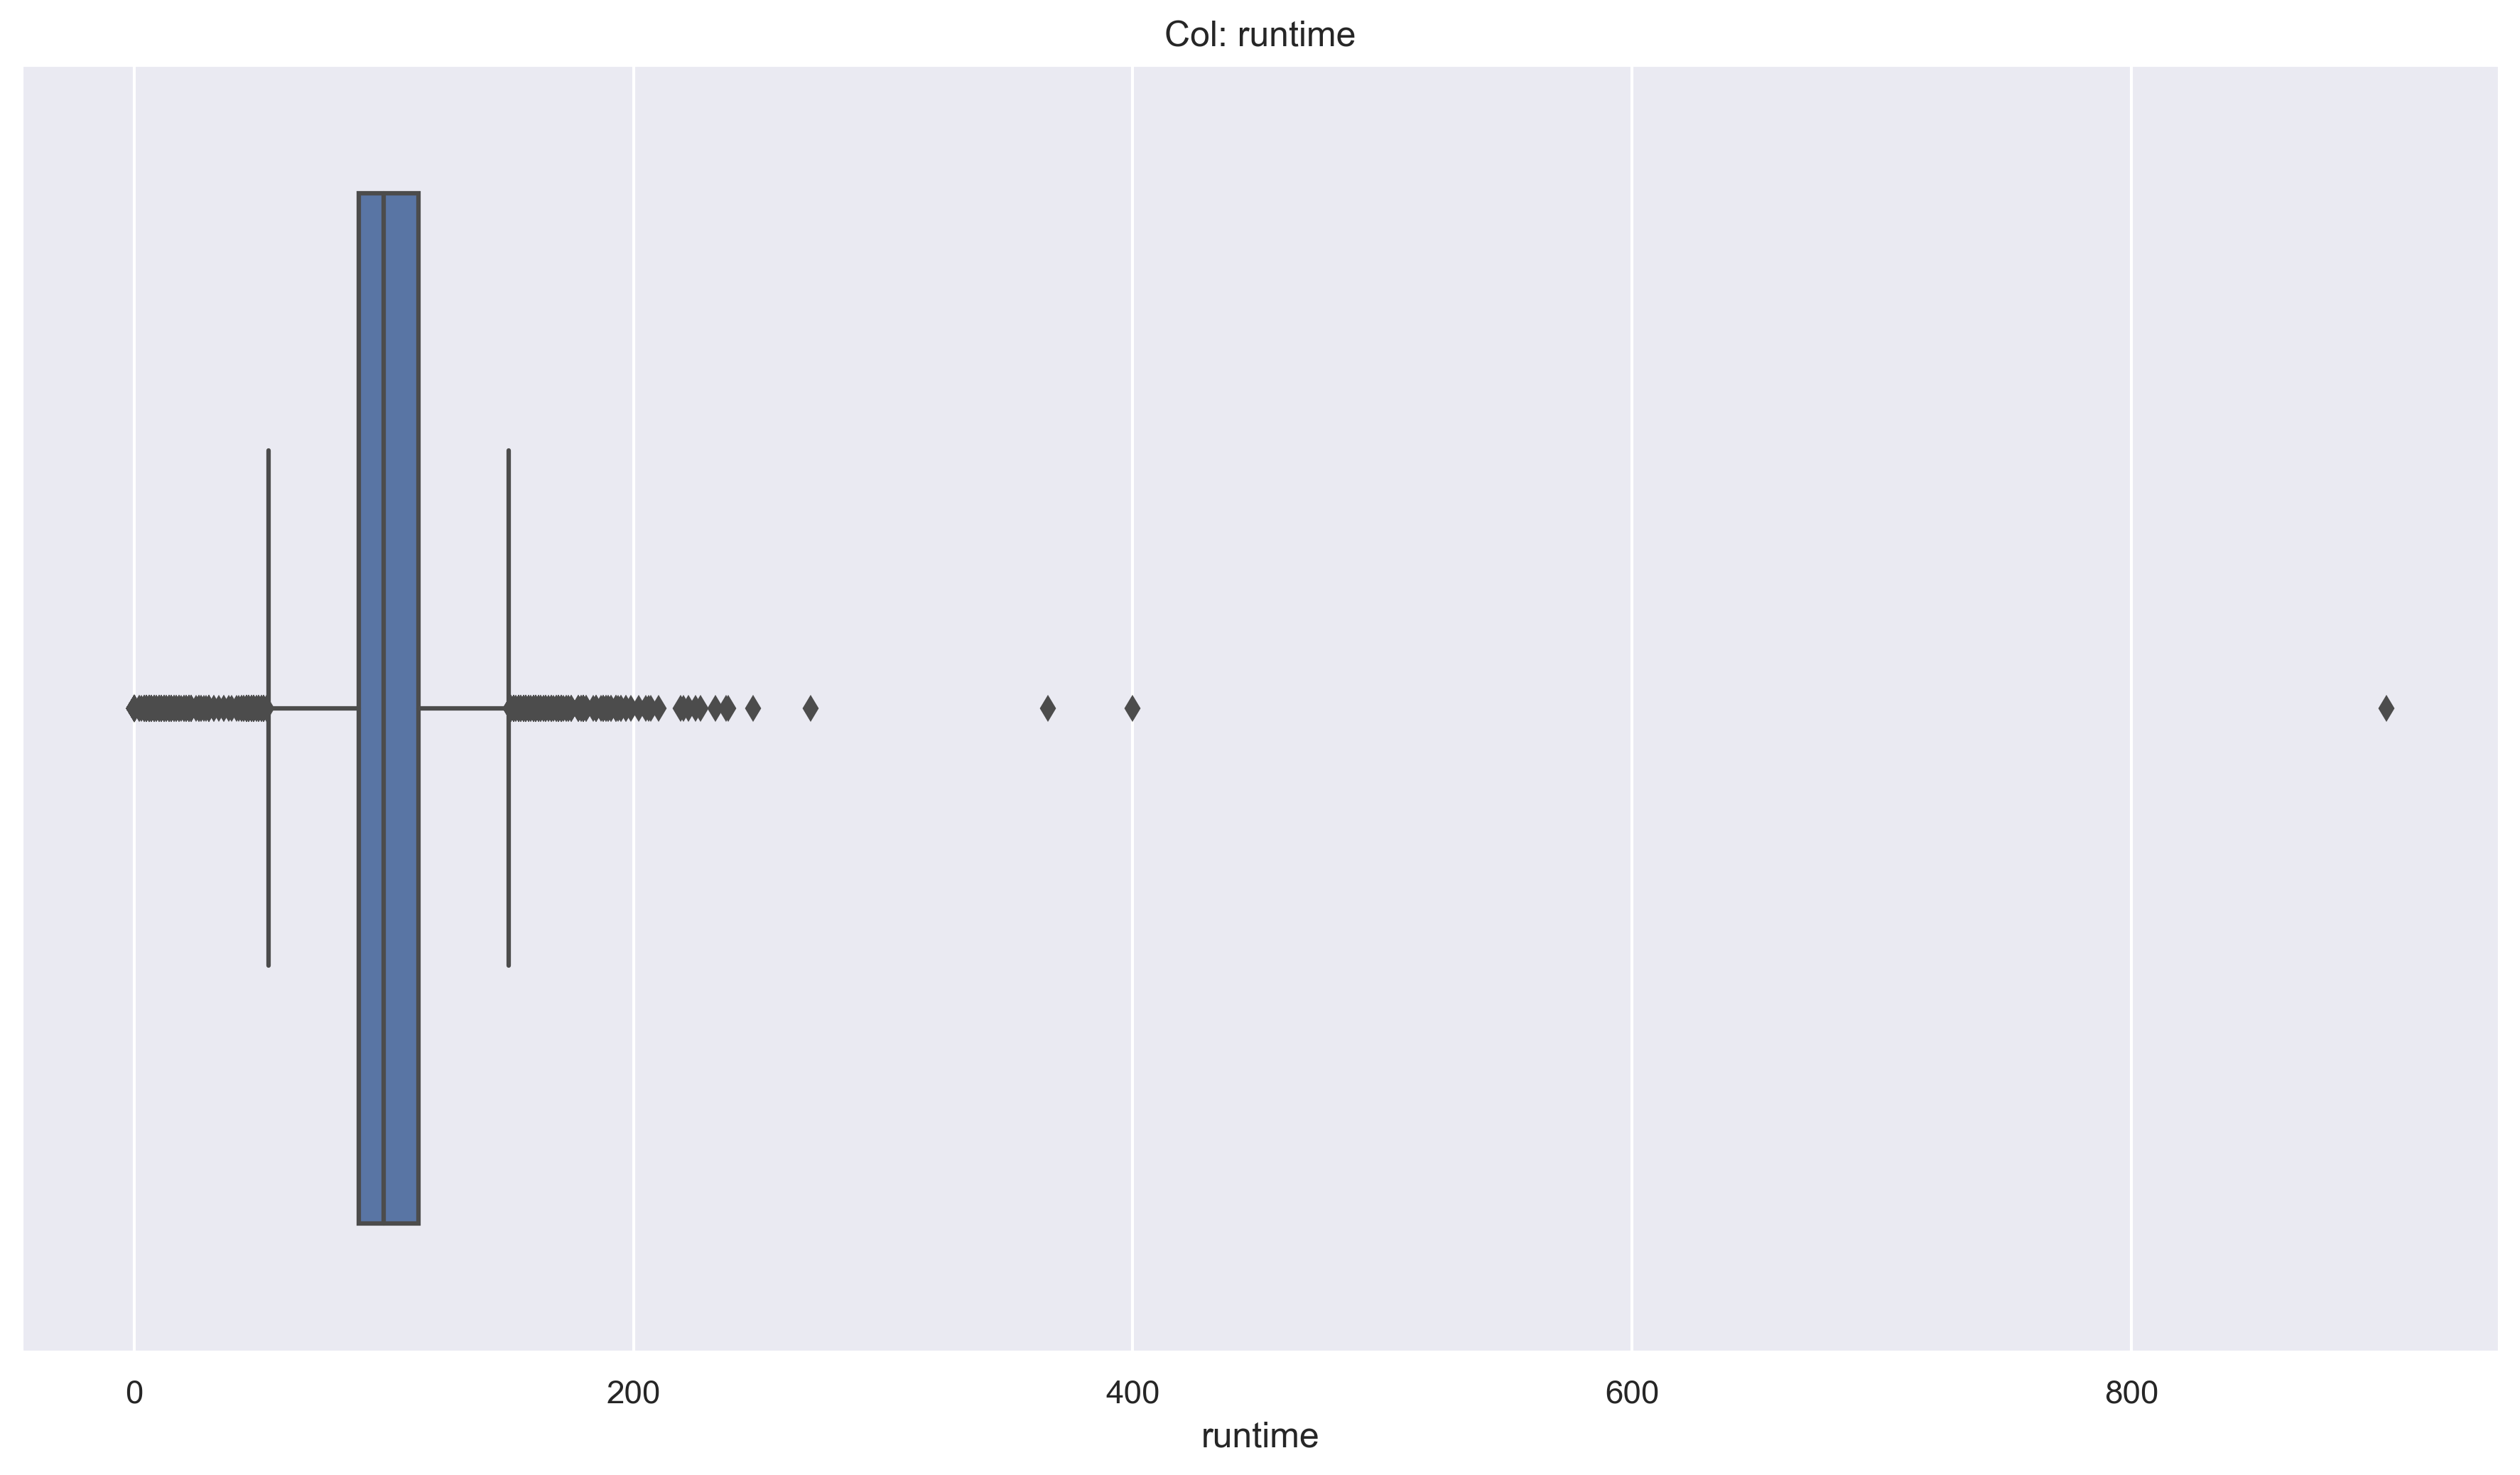

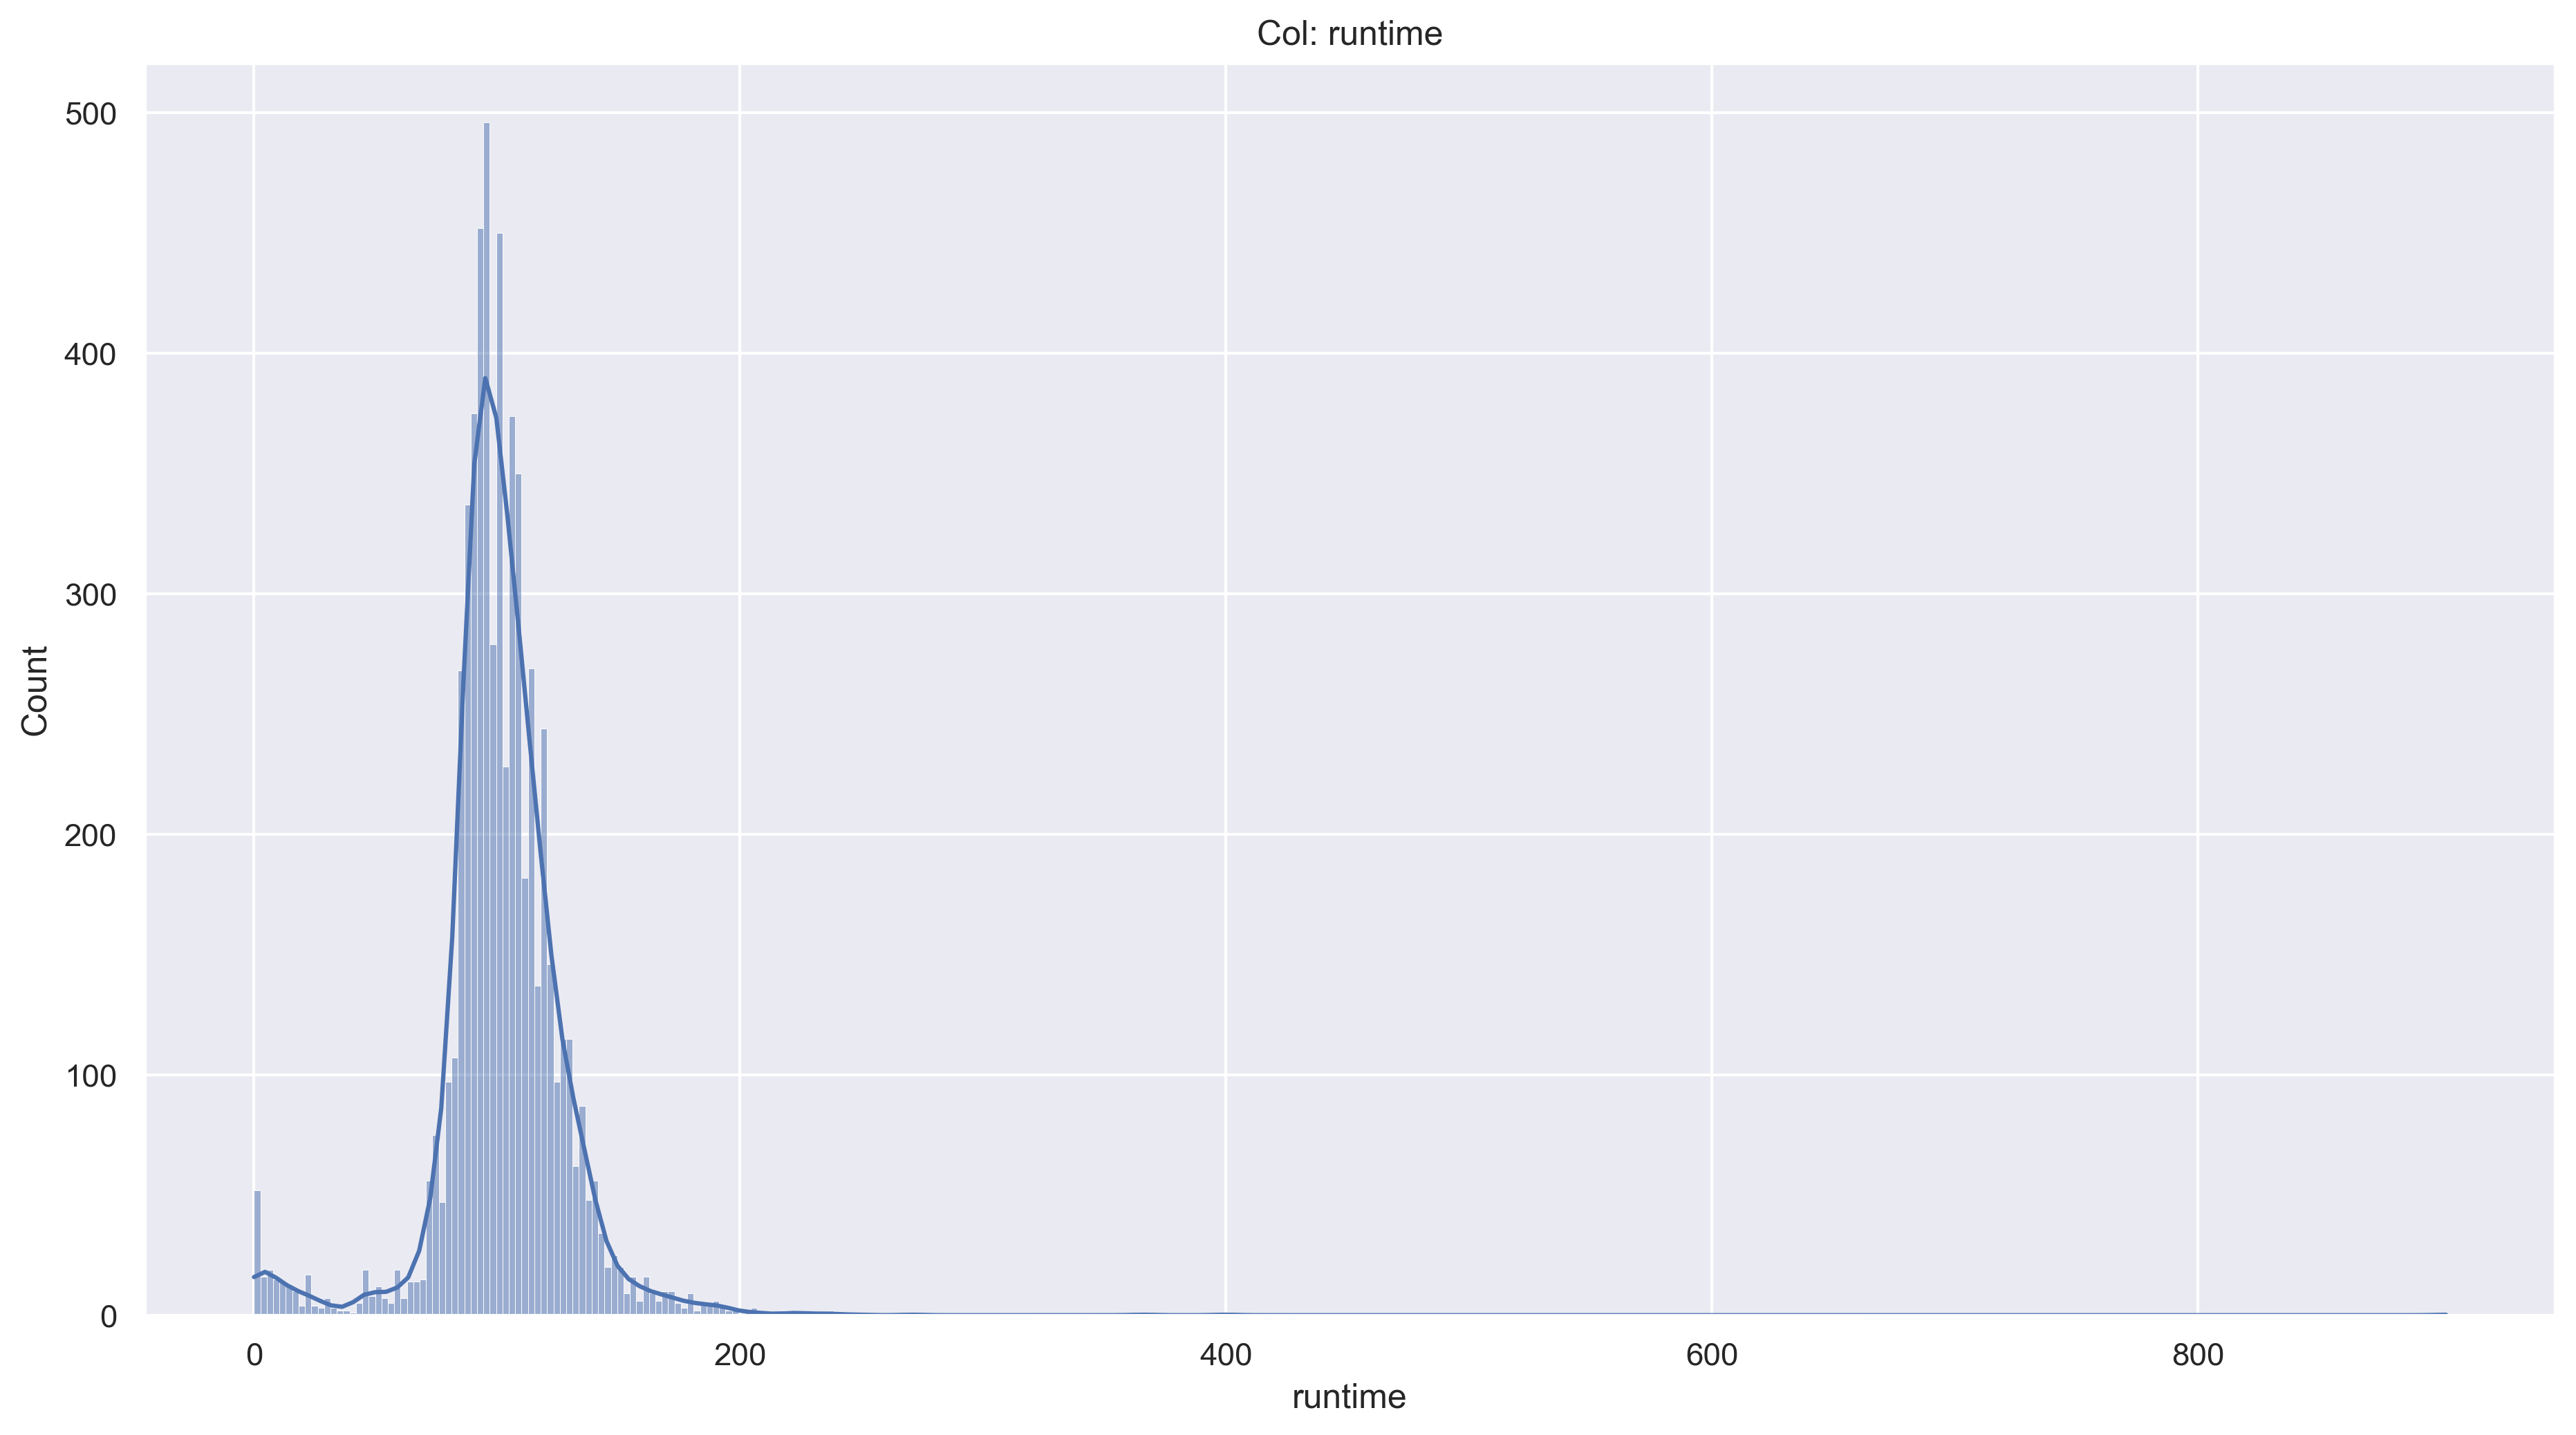

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


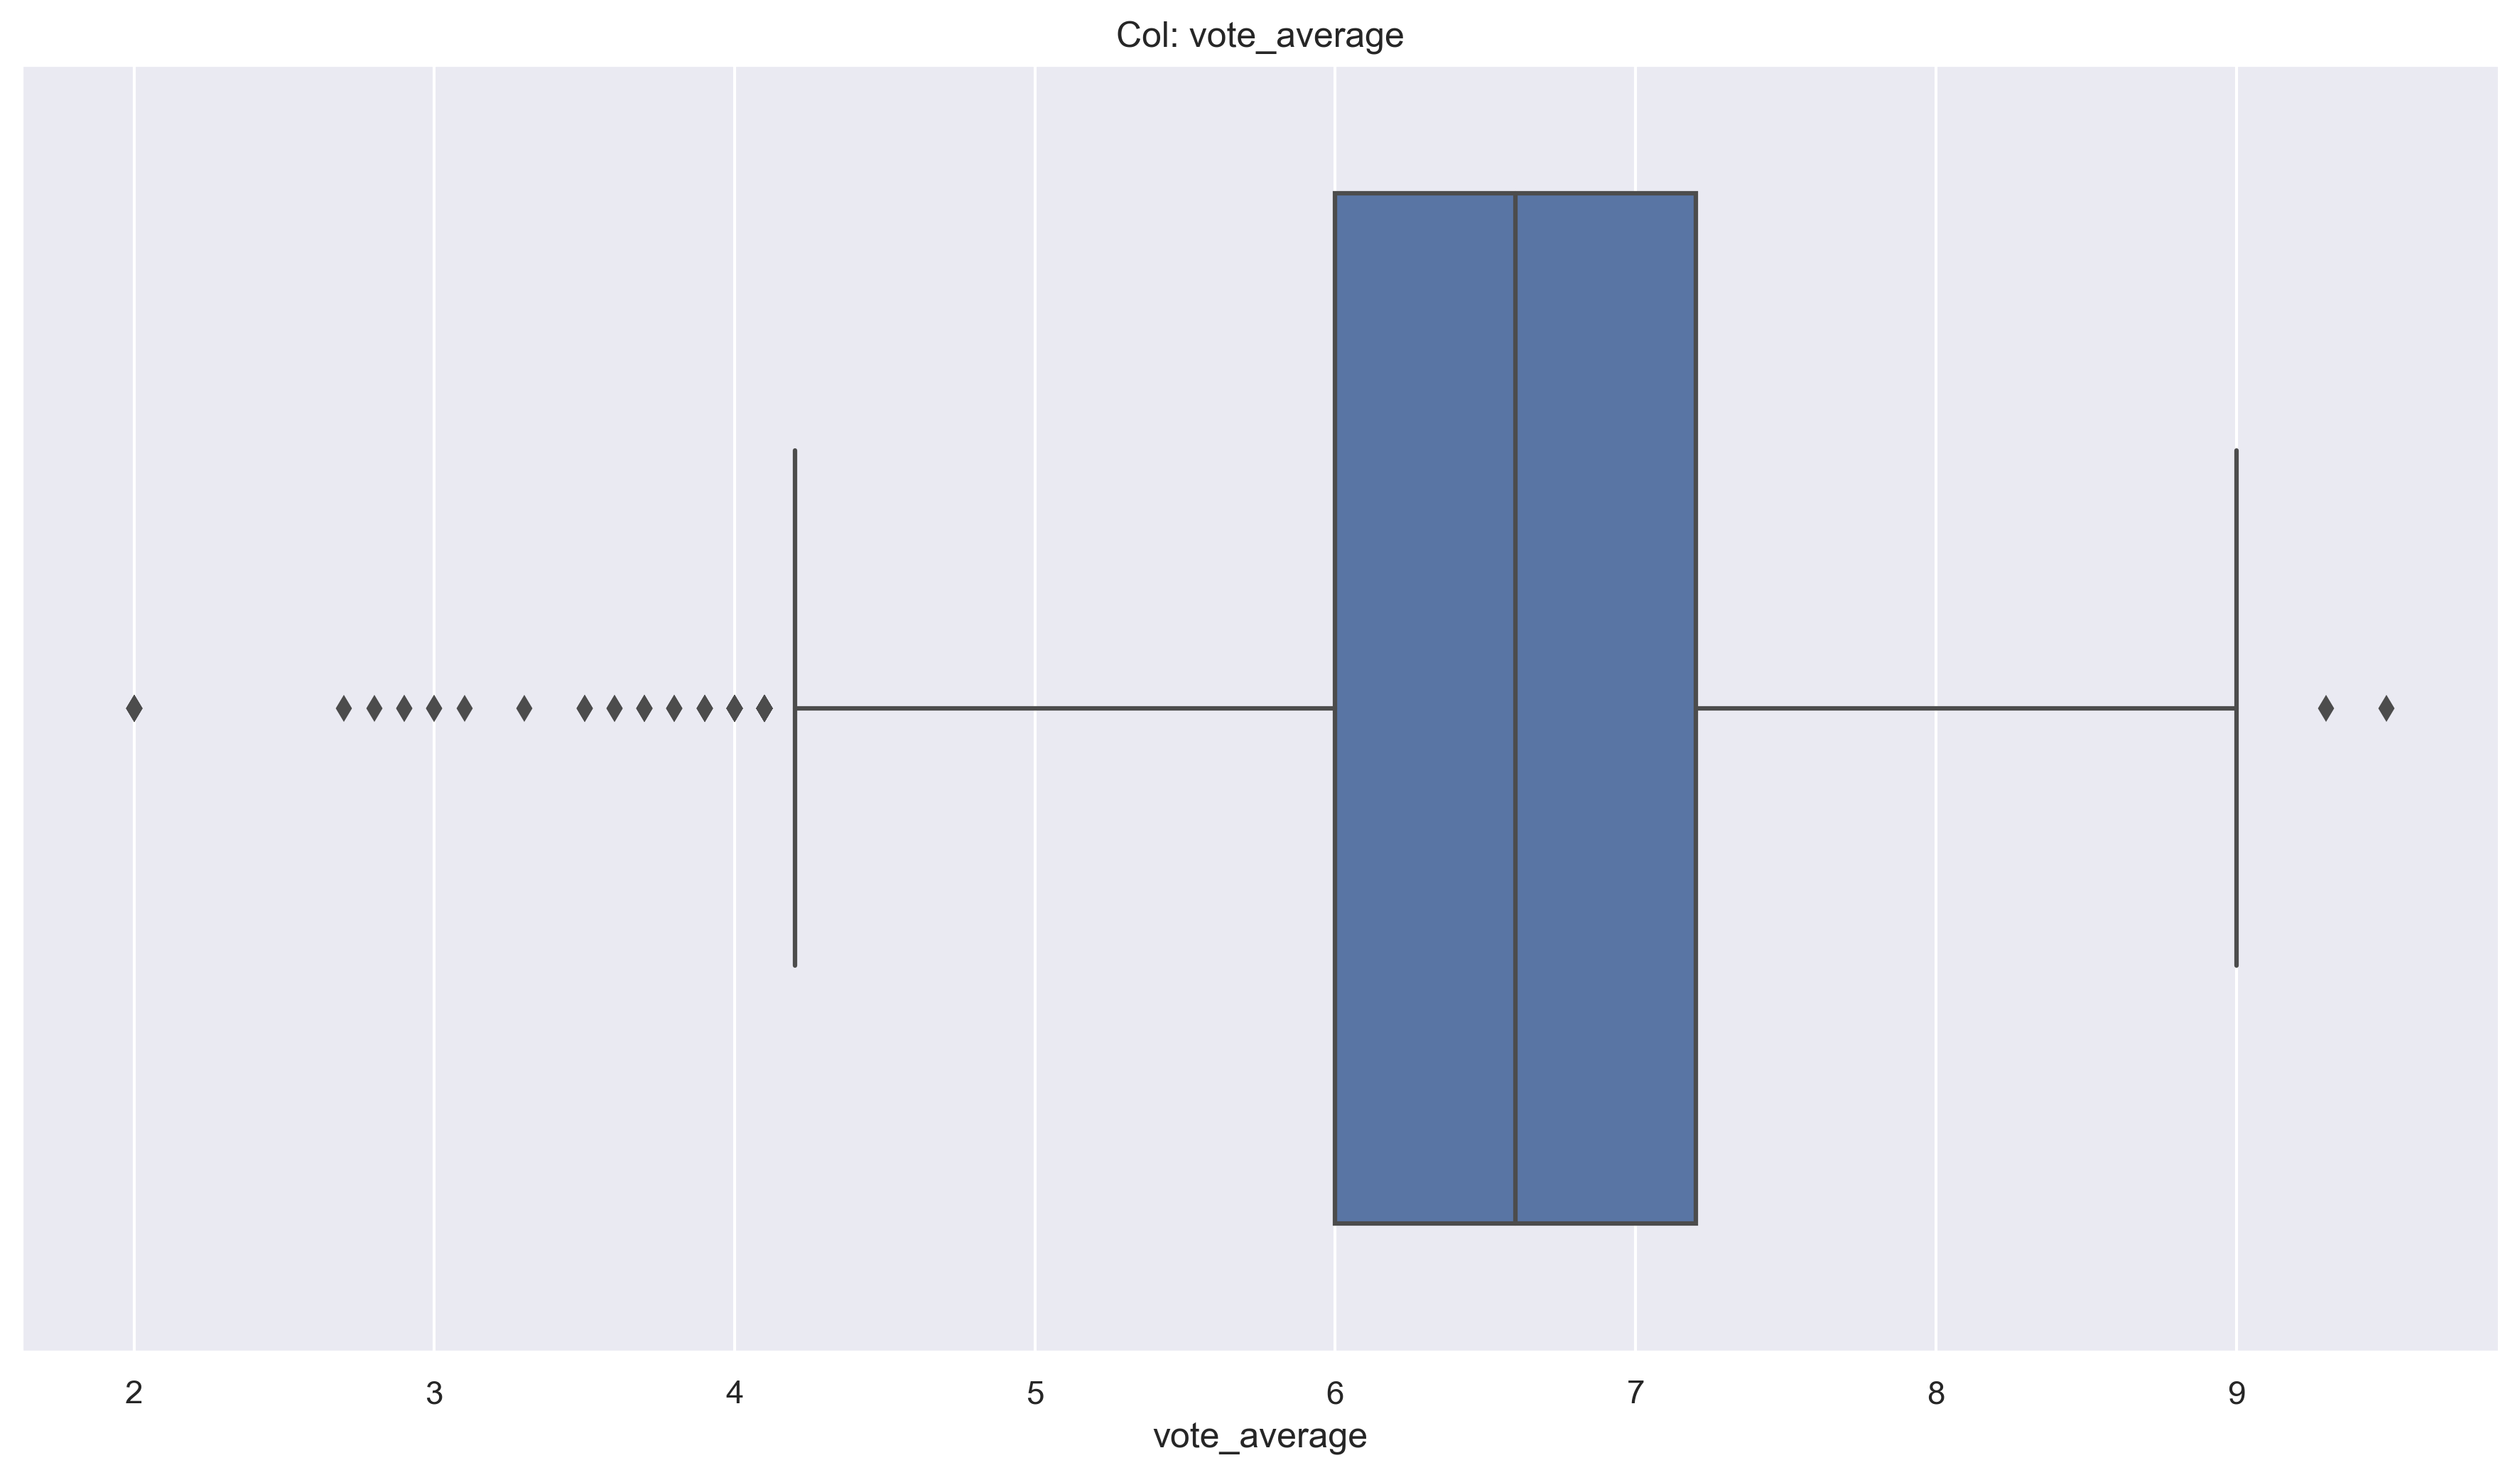

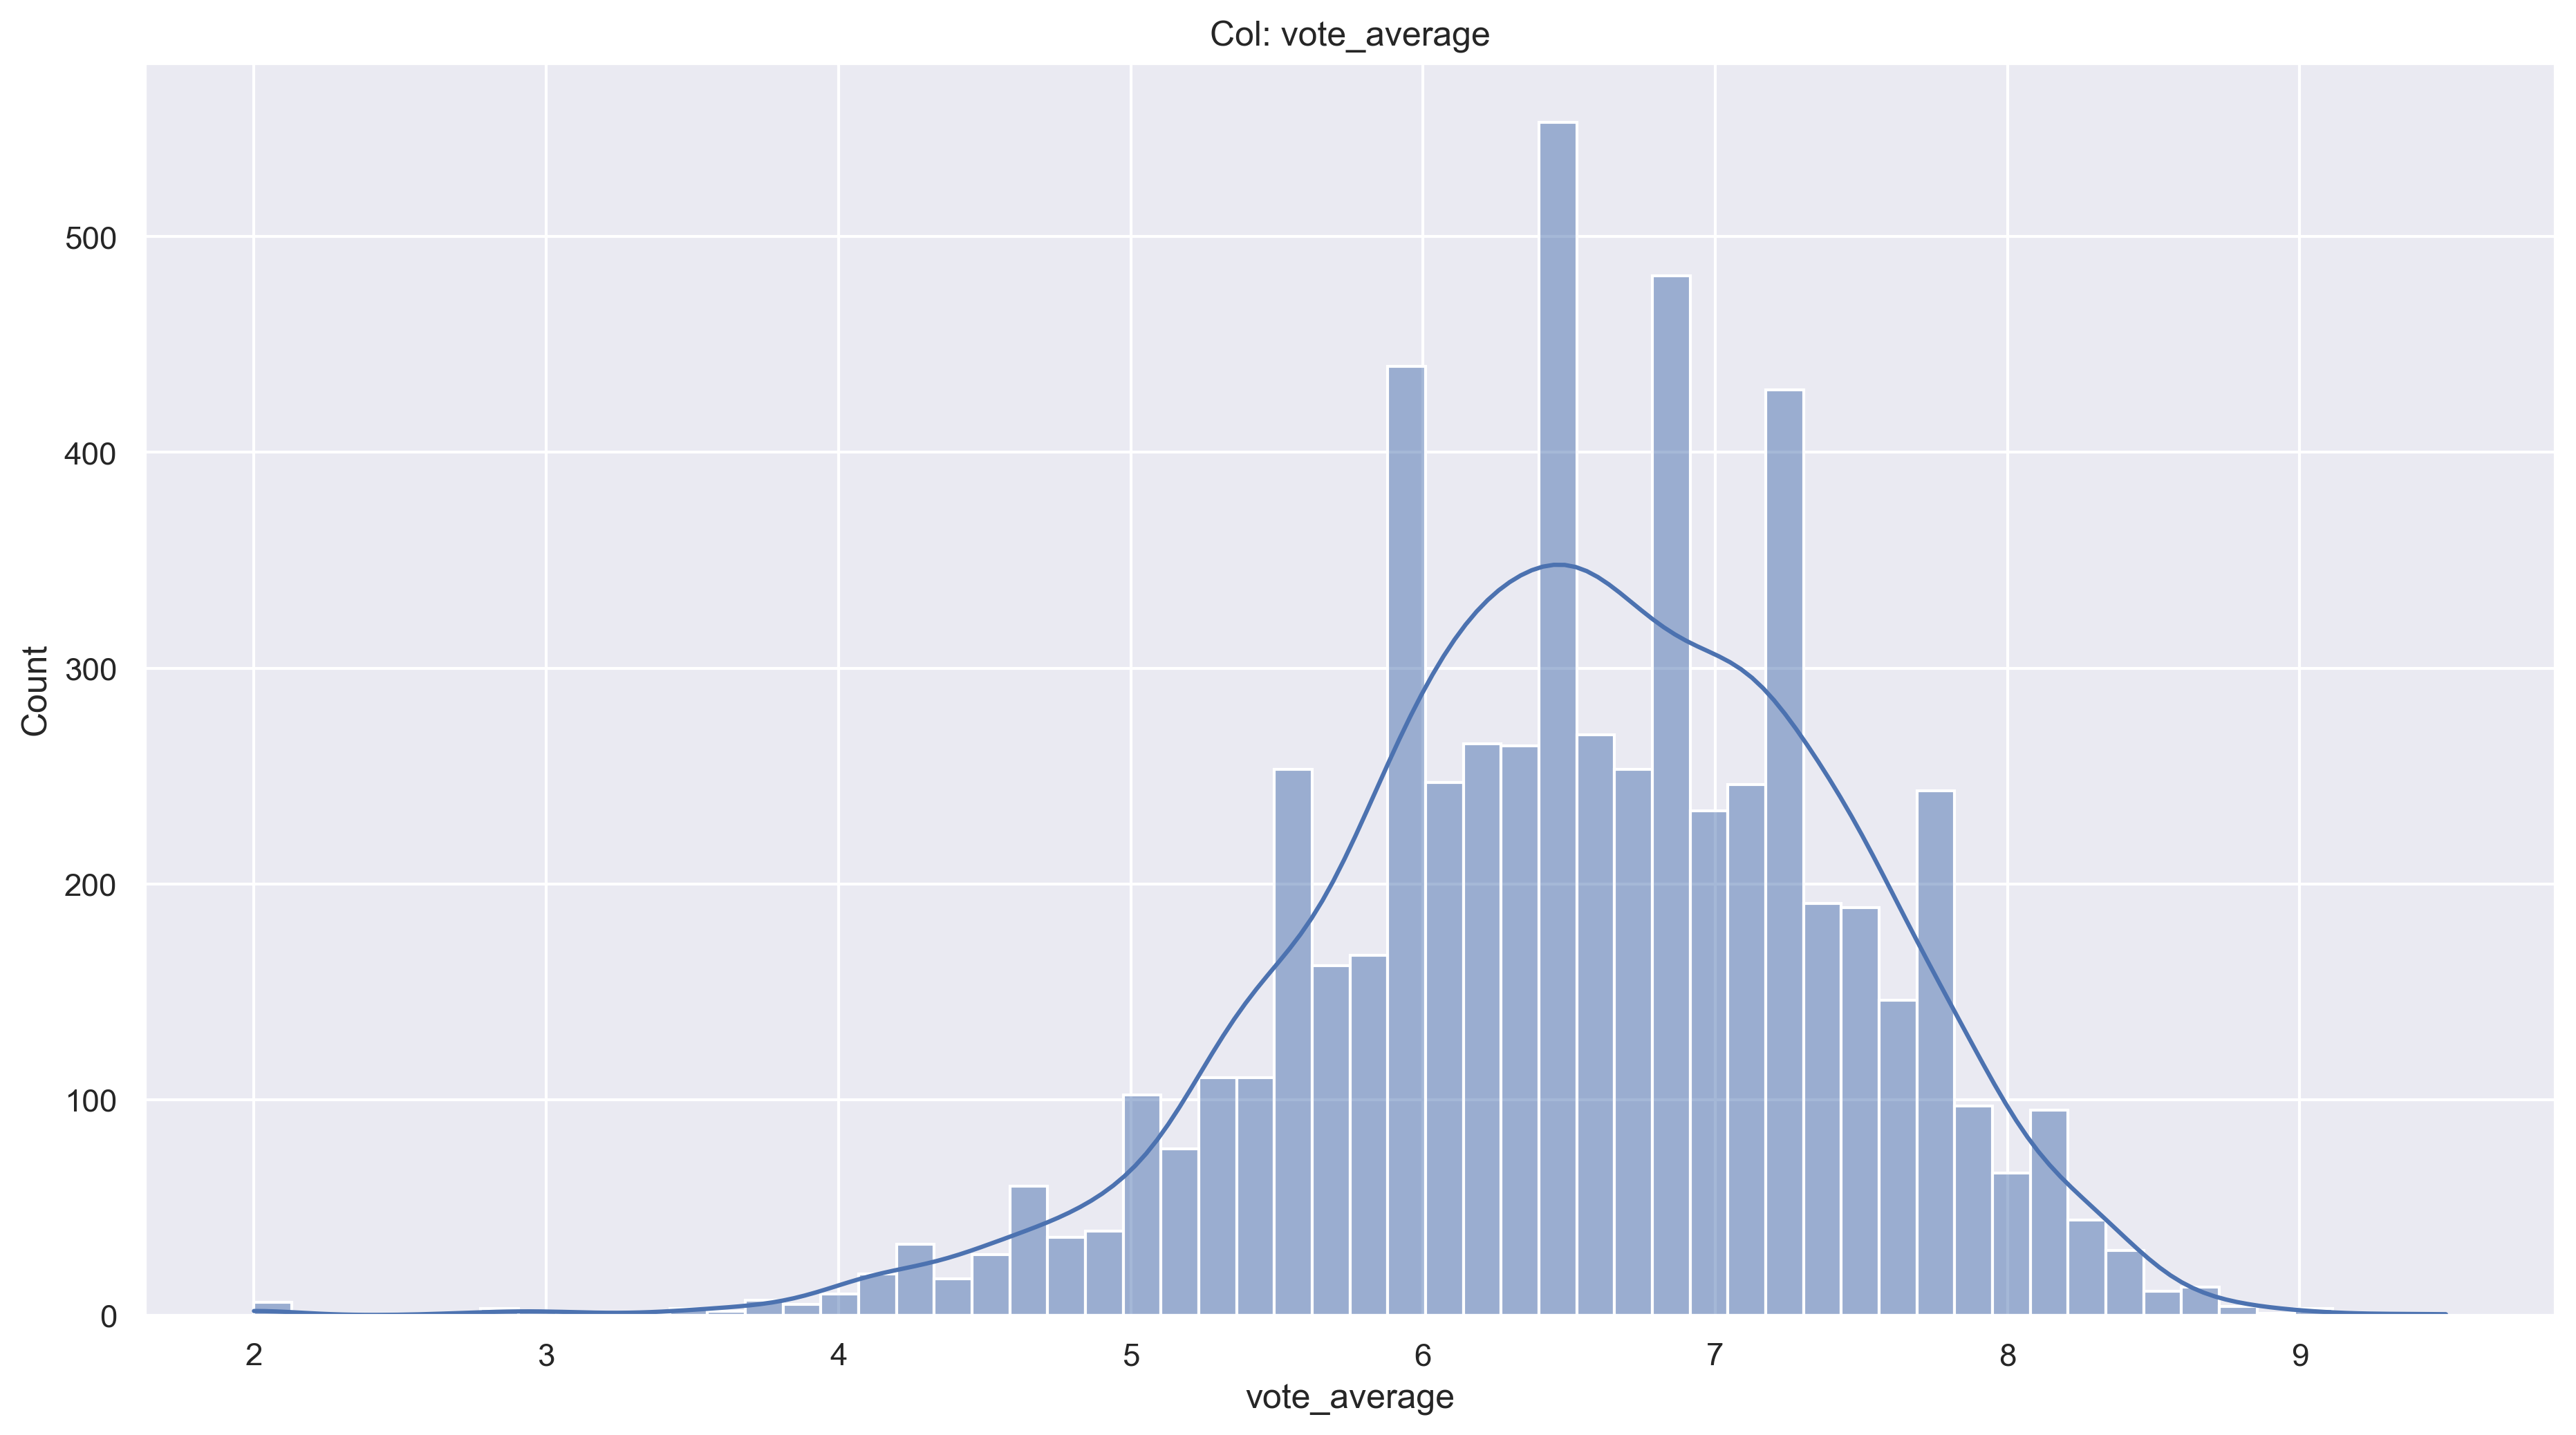

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


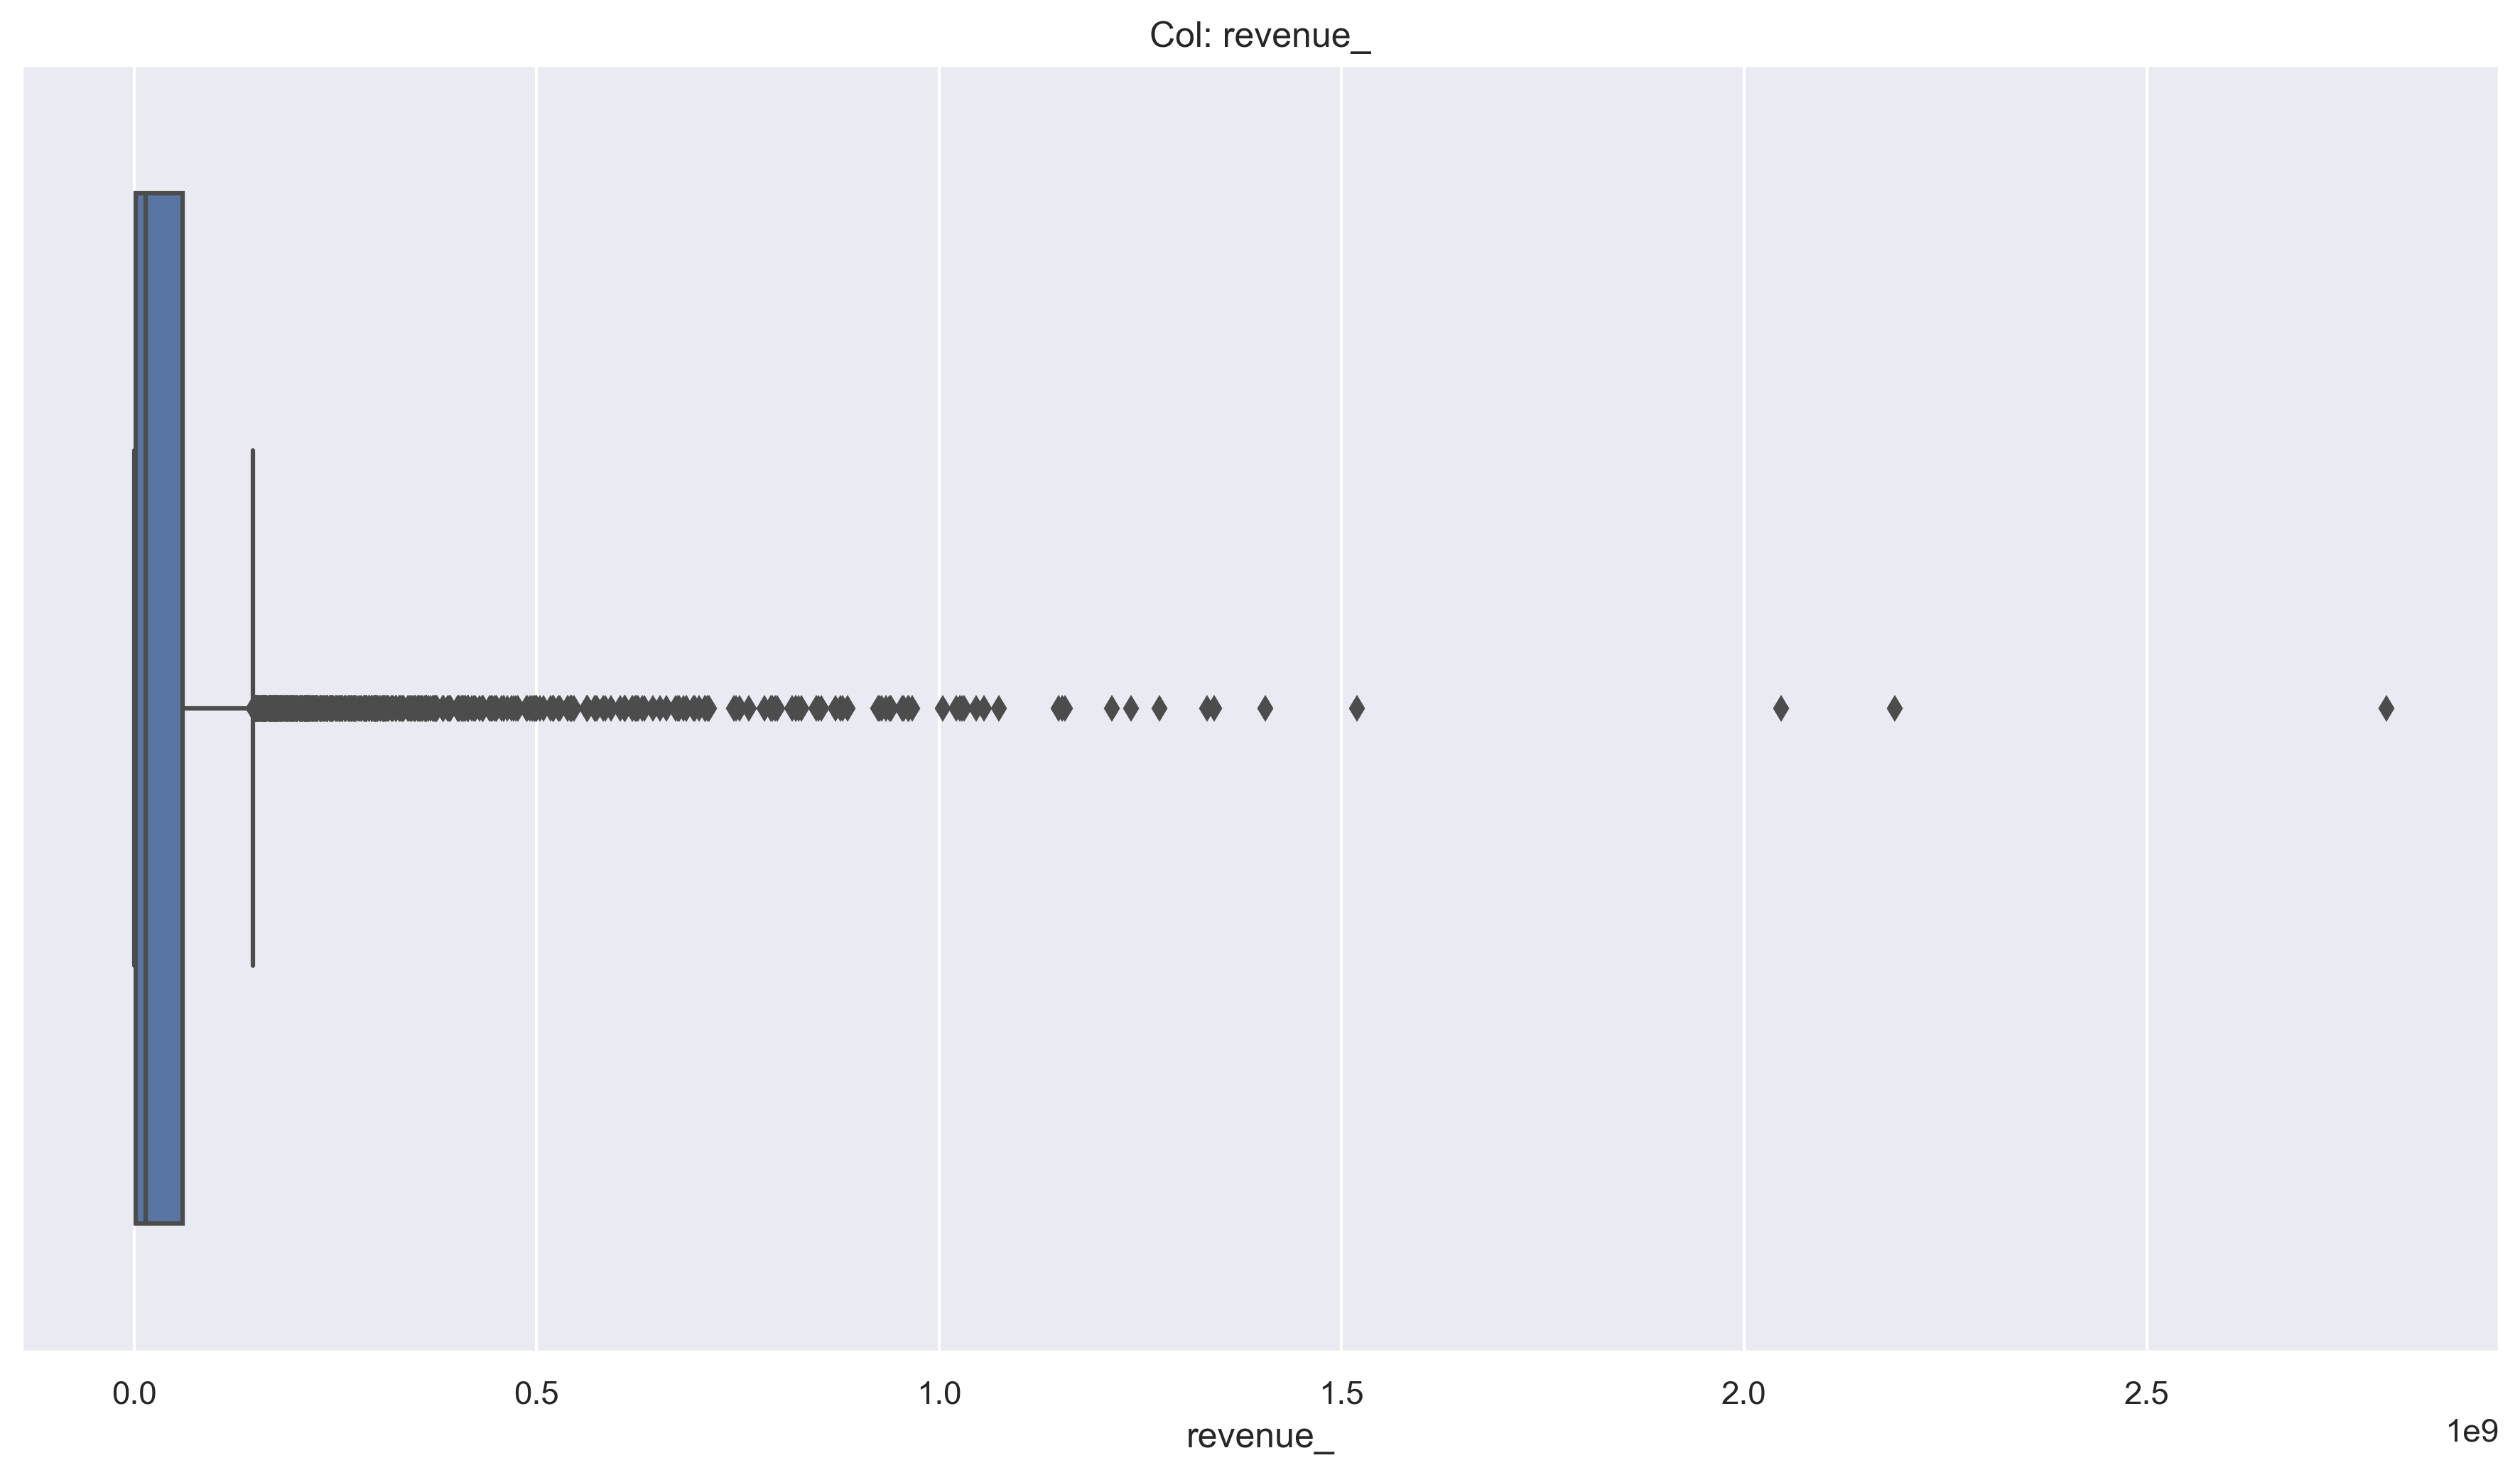

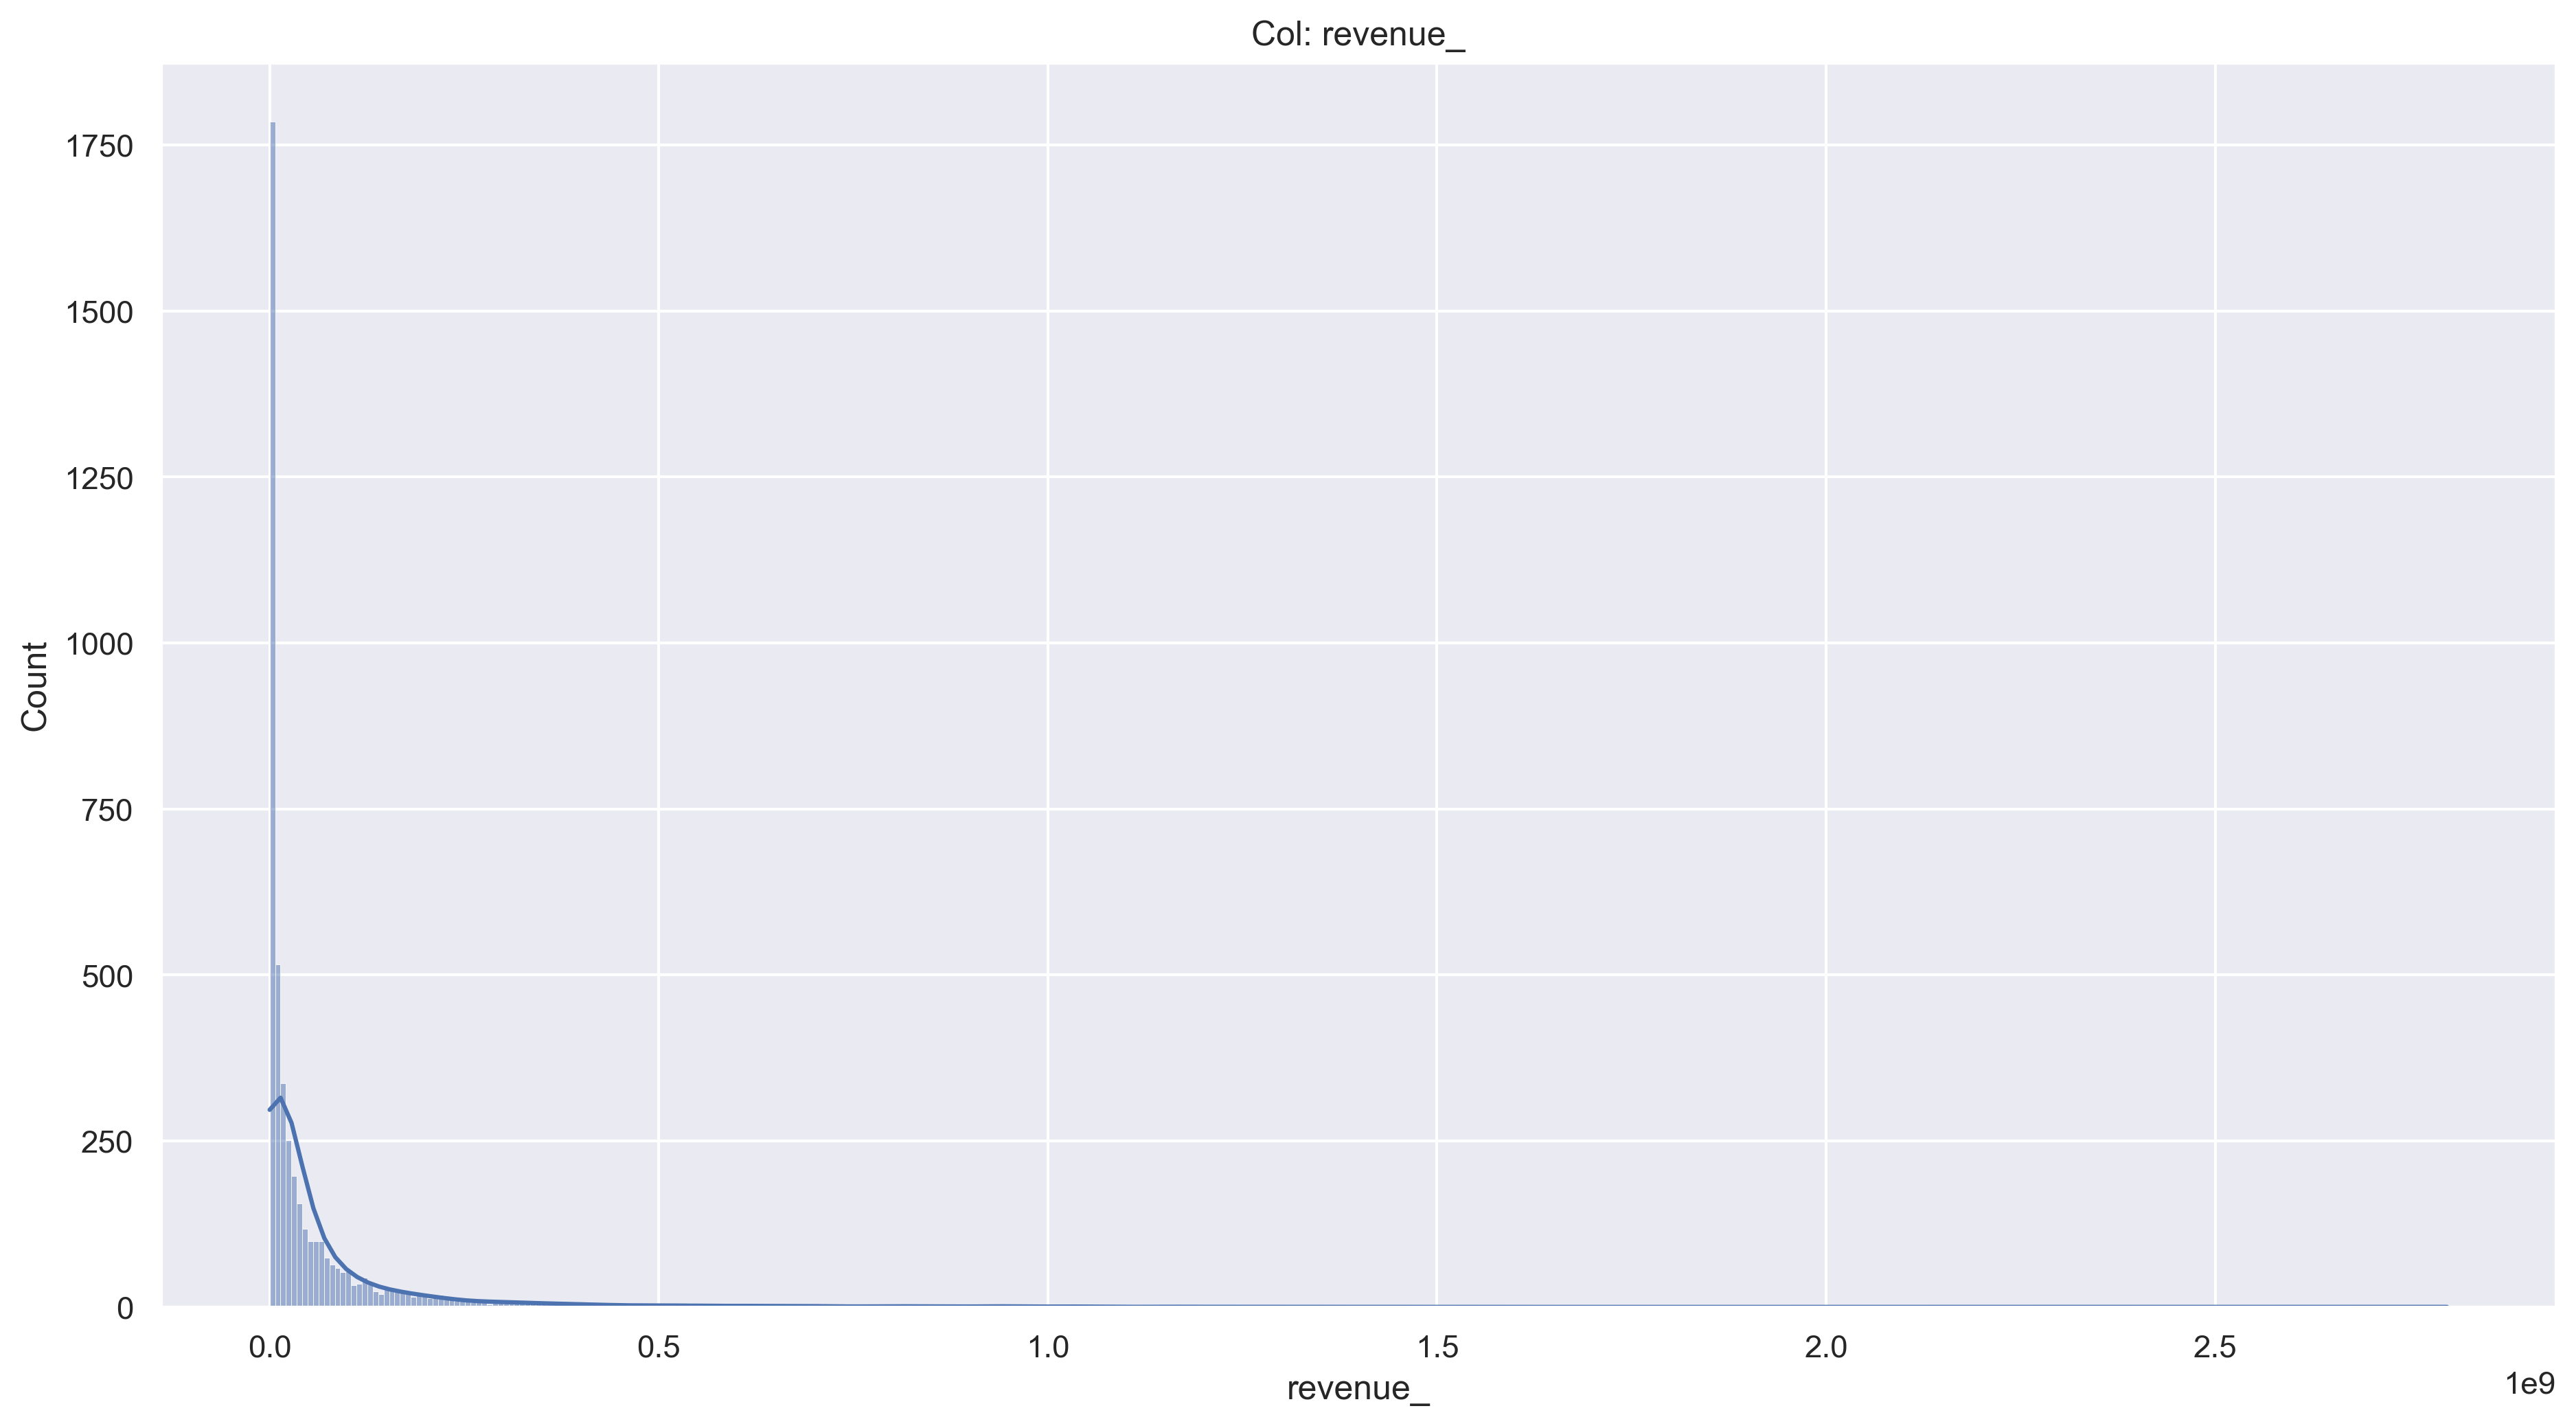

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


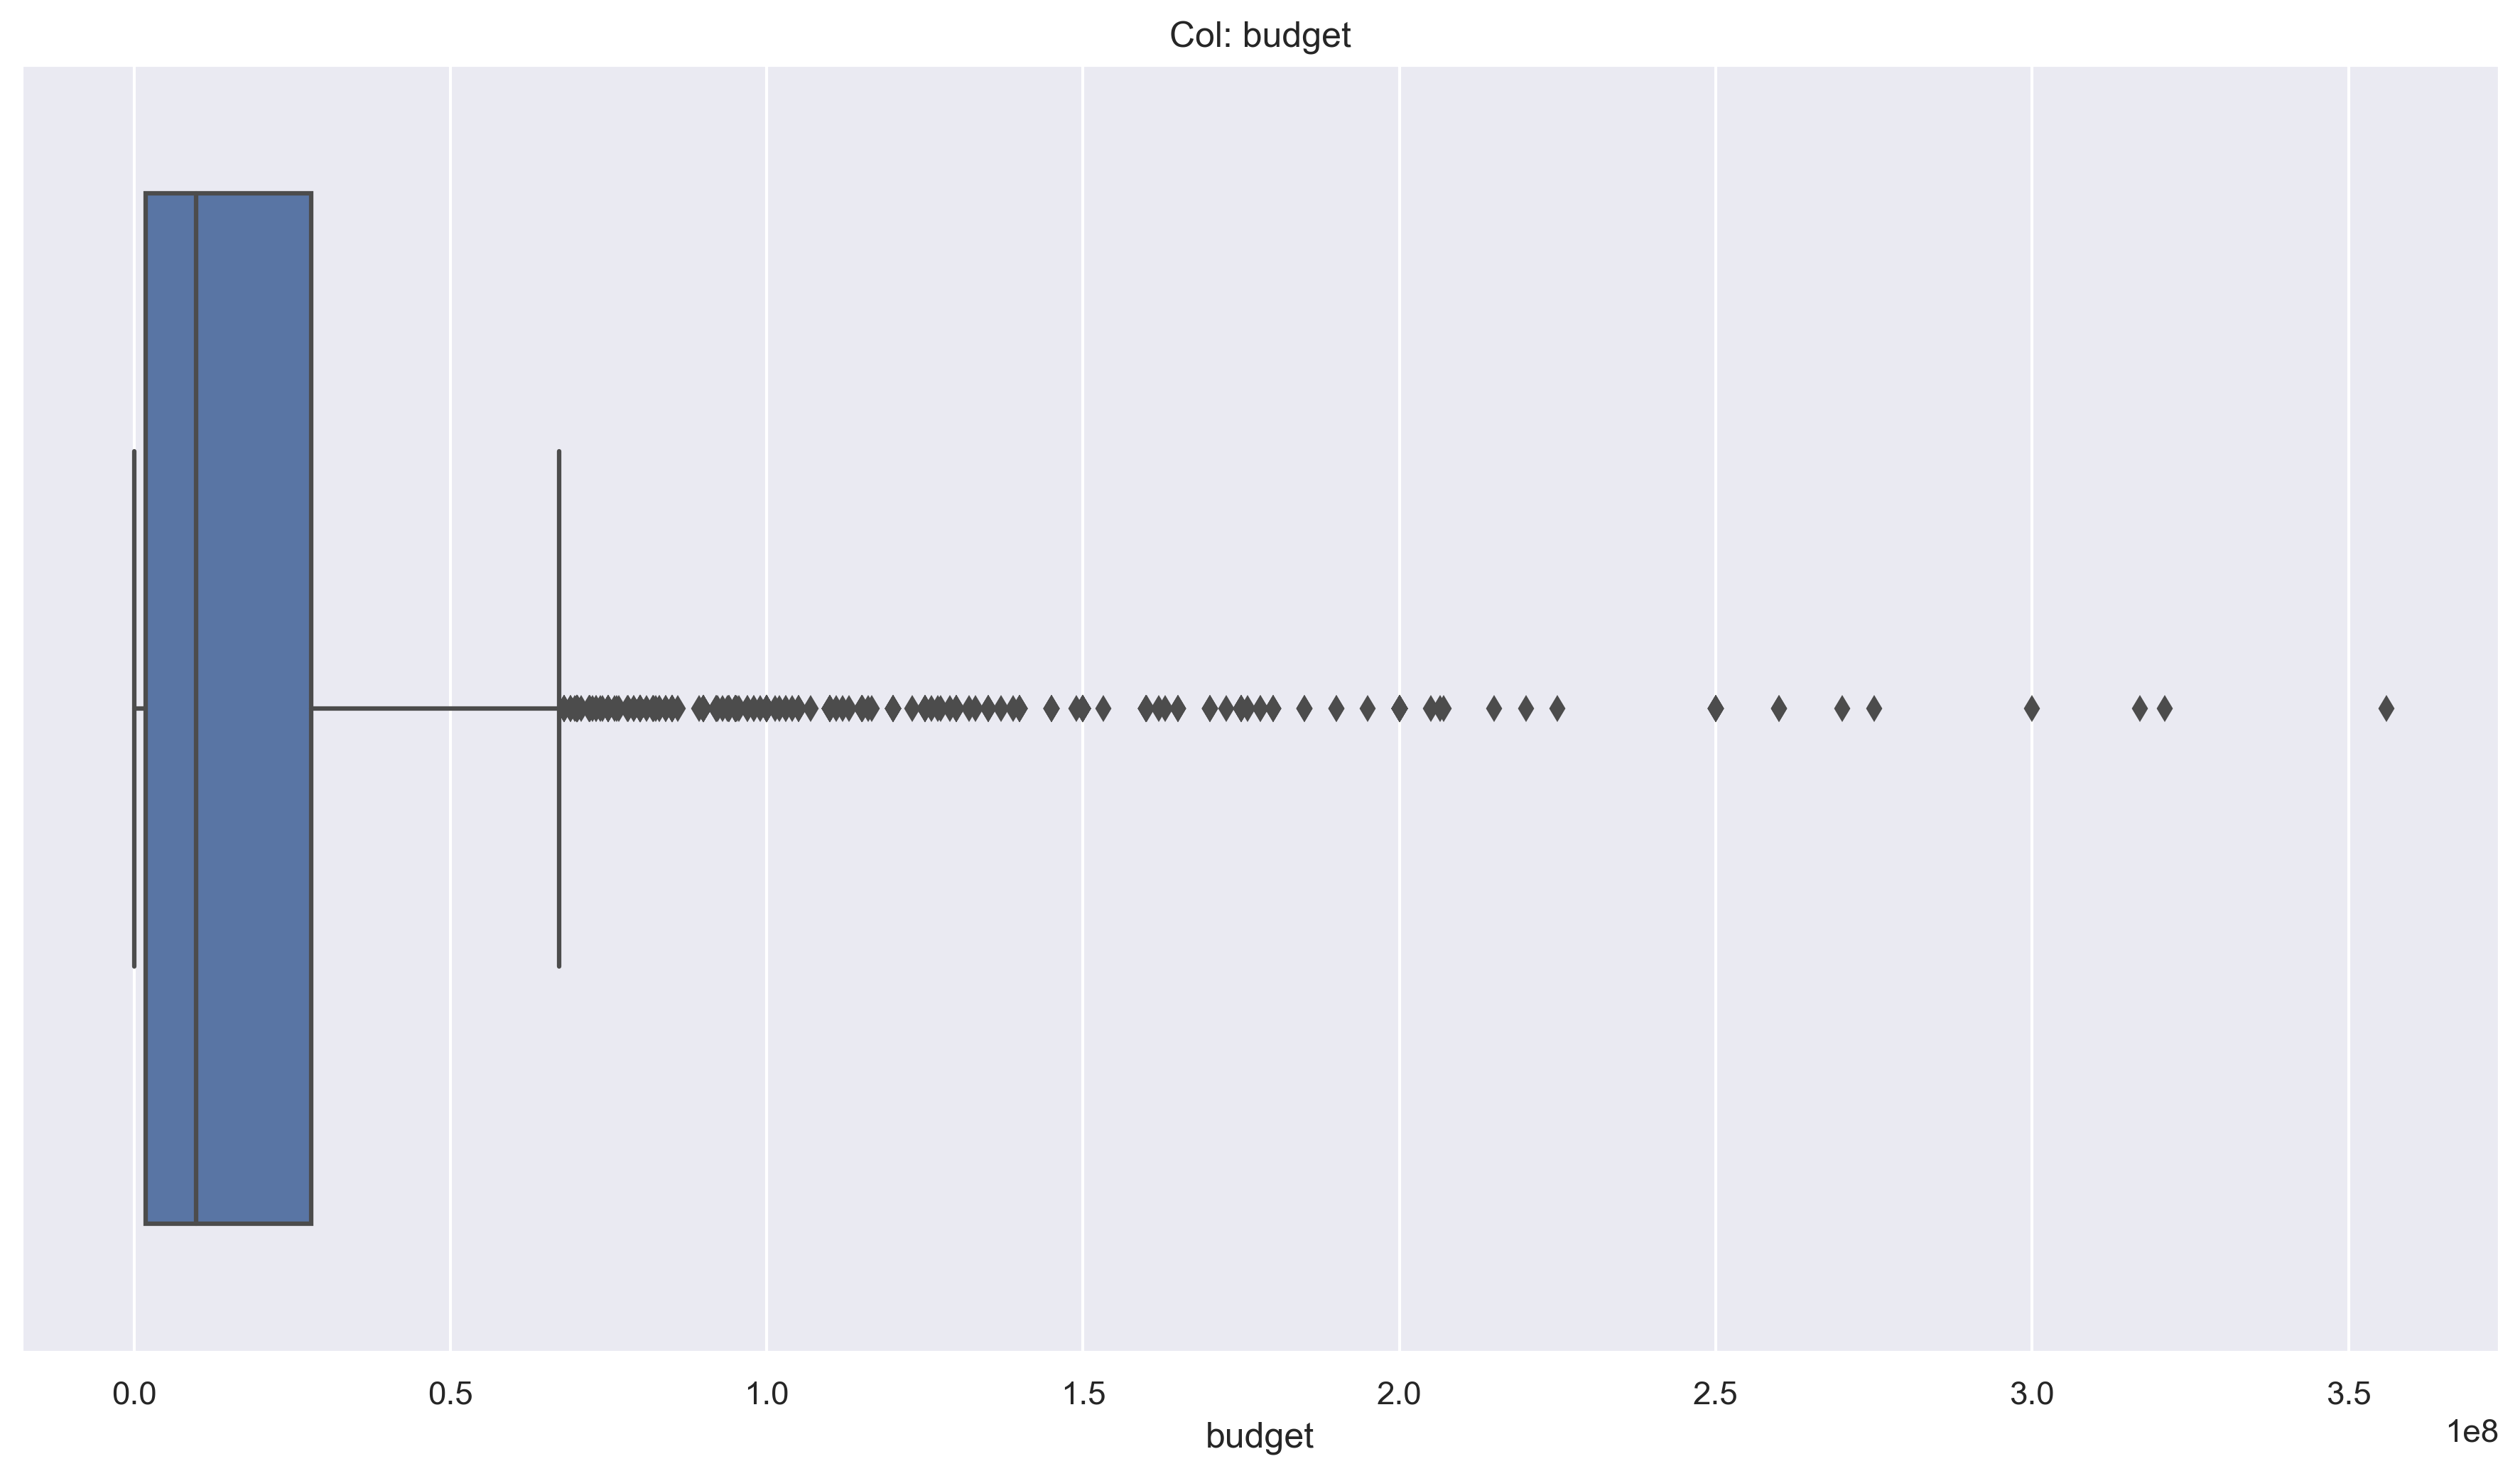

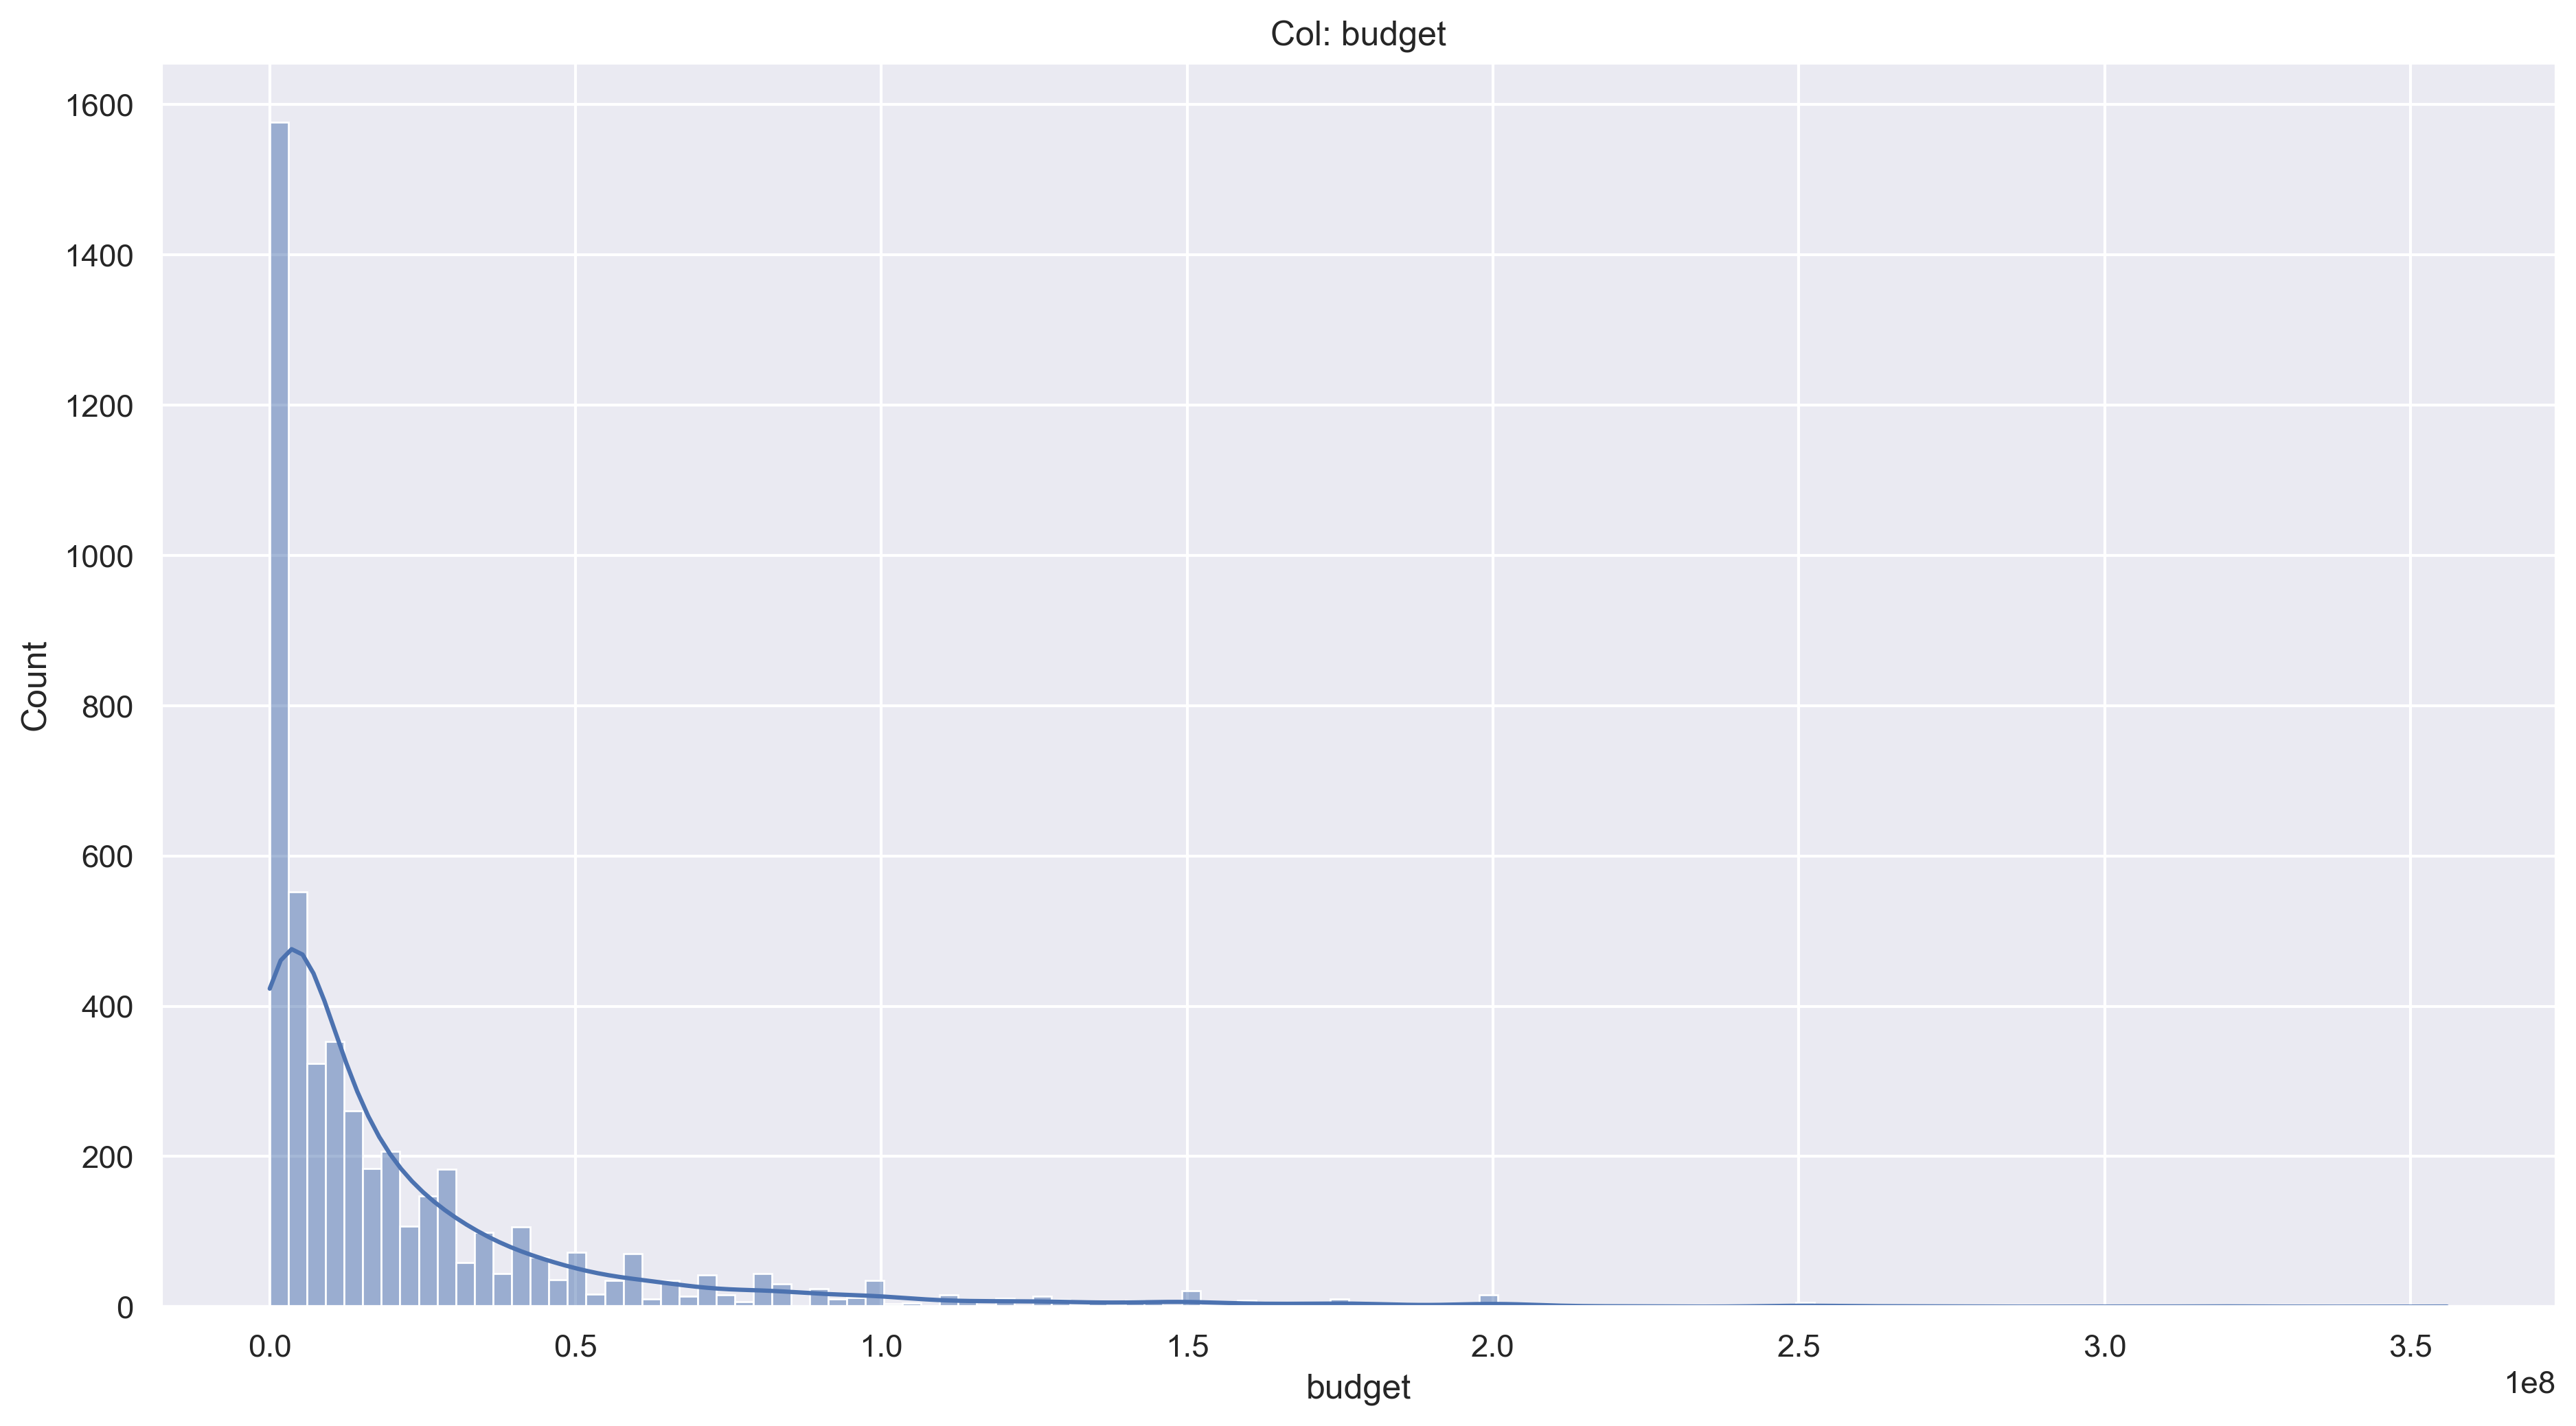

In [31]:
for col in nume_train_df.columns:
    sns.boxplot(nume_train_df[col])
    plt.title("Col: " + col)
    plt.show()

    sns.histplot(nume_train_df[col], kde = True)
    plt.title("Col: " + col)
    plt.show()


- Cột Popularity có thể sẽ bị bỏ do nó chỉ có tính thời điểm, phim hiện tại đang chiếu rạp sẽ có giá trị popularity cao nhất (**Pipeline step**)
- Target feature (revenue) bị right skew nên mình thử dùng phép biến đổi log xem sao 
- Những cột còn lại có vẻ bình thường nên hãy giữ nguyên

skewness: 5.976301598616513


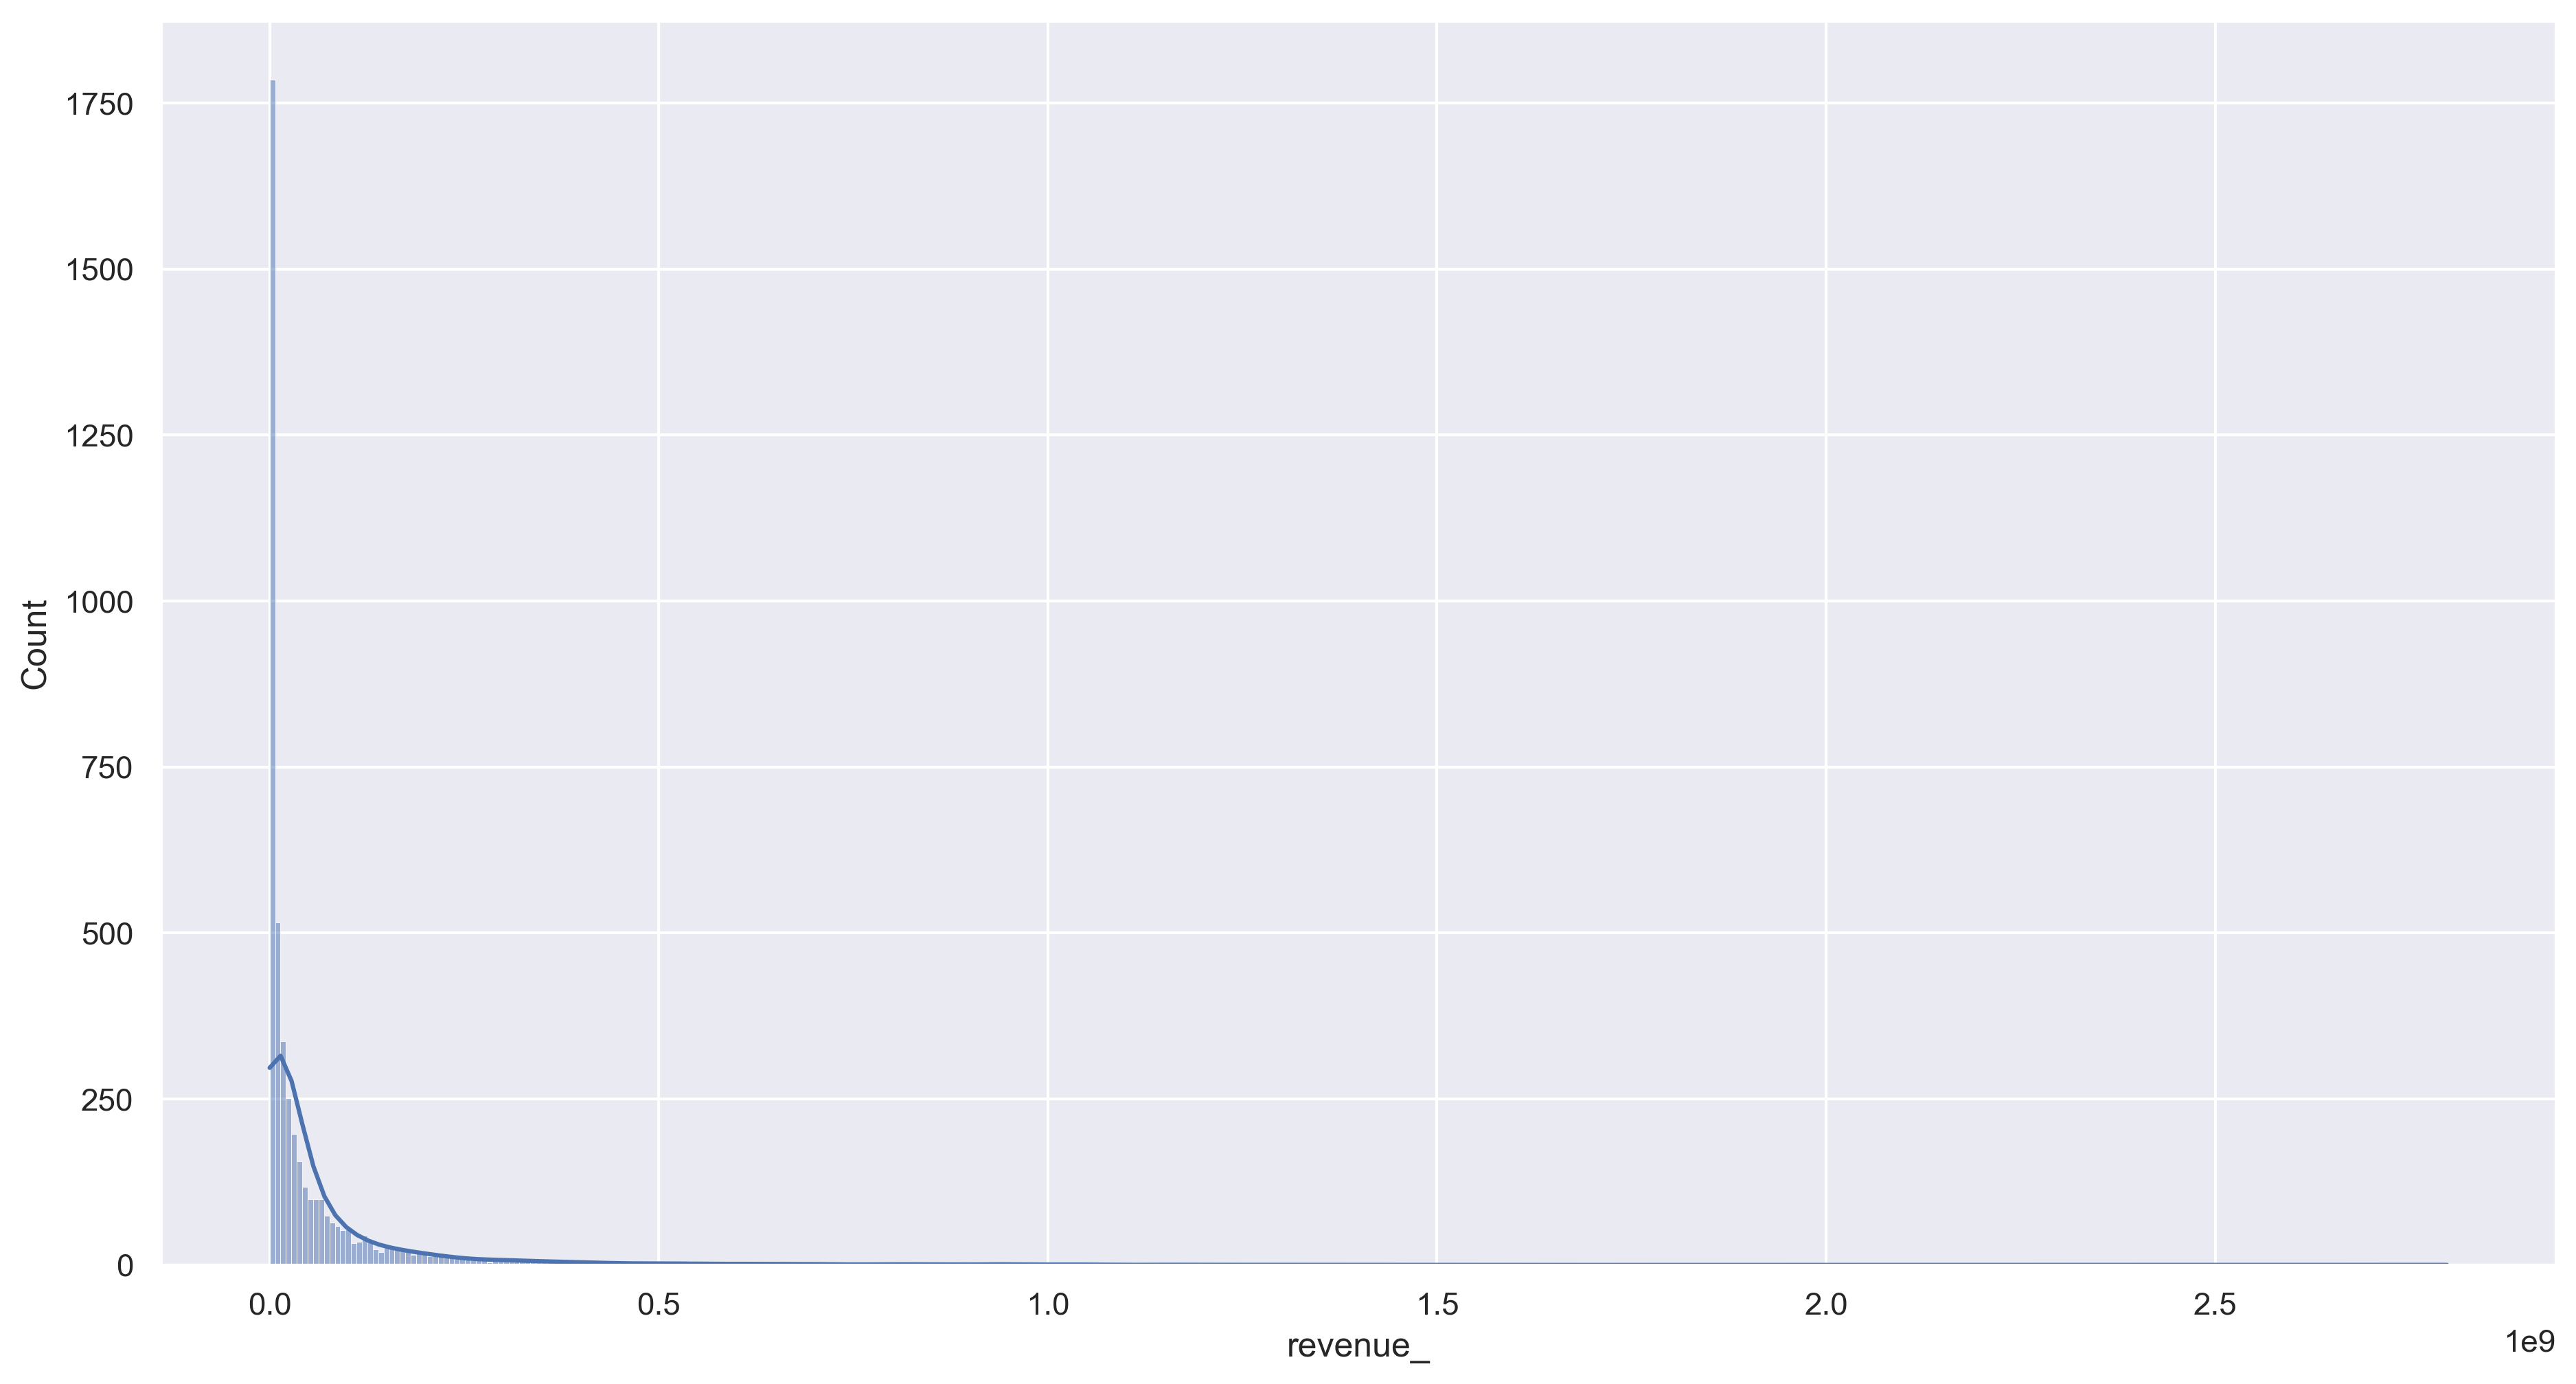

skewness: -1.0934037097401055


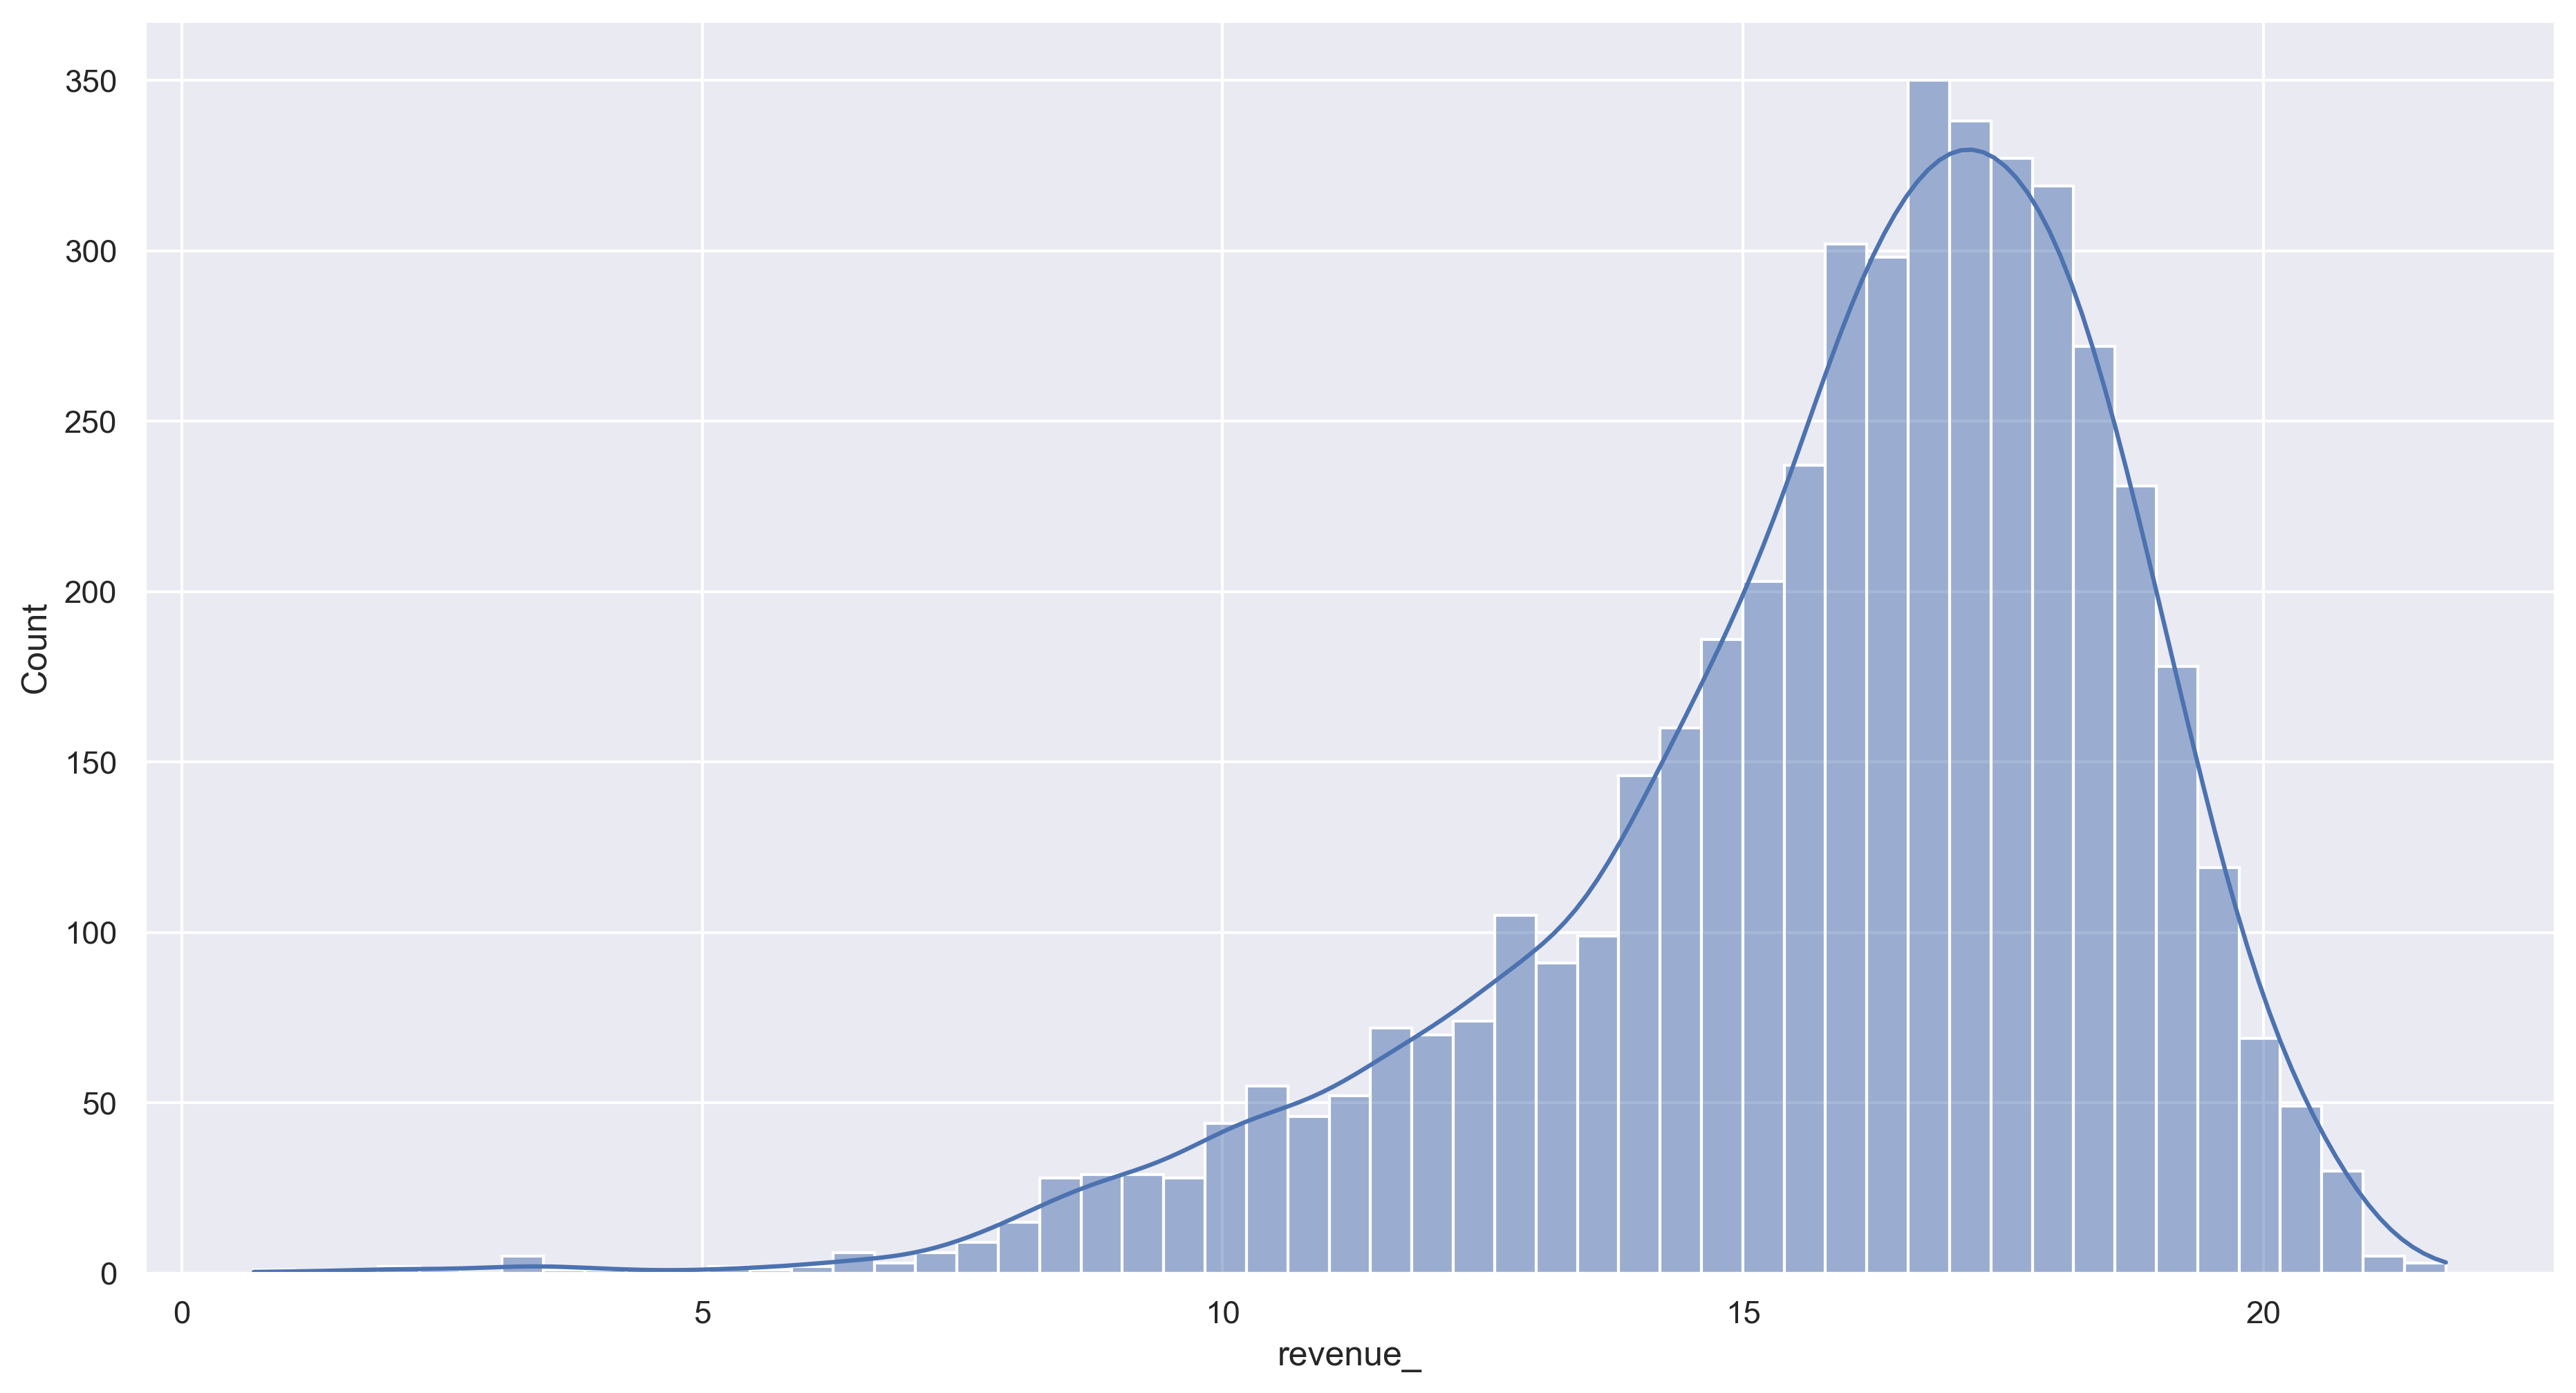

In [32]:
from scipy.stats import skew

sns.histplot(train_df['revenue_'], kde = True)
print(f"skewness: {skew(train_df['revenue_'].dropna())}")
plt.show()

sns.histplot(np.log1p(train_df['revenue_']), kde = True)
print(f"skewness: {skew(np.log1p(train_df['revenue_'].dropna()))}")
plt.show()

- Rõ ràng là tốt hơn rất nhiều mặc dù bây giờ revenue bị left skew nhẹ 

skewness: 3.170781375544528


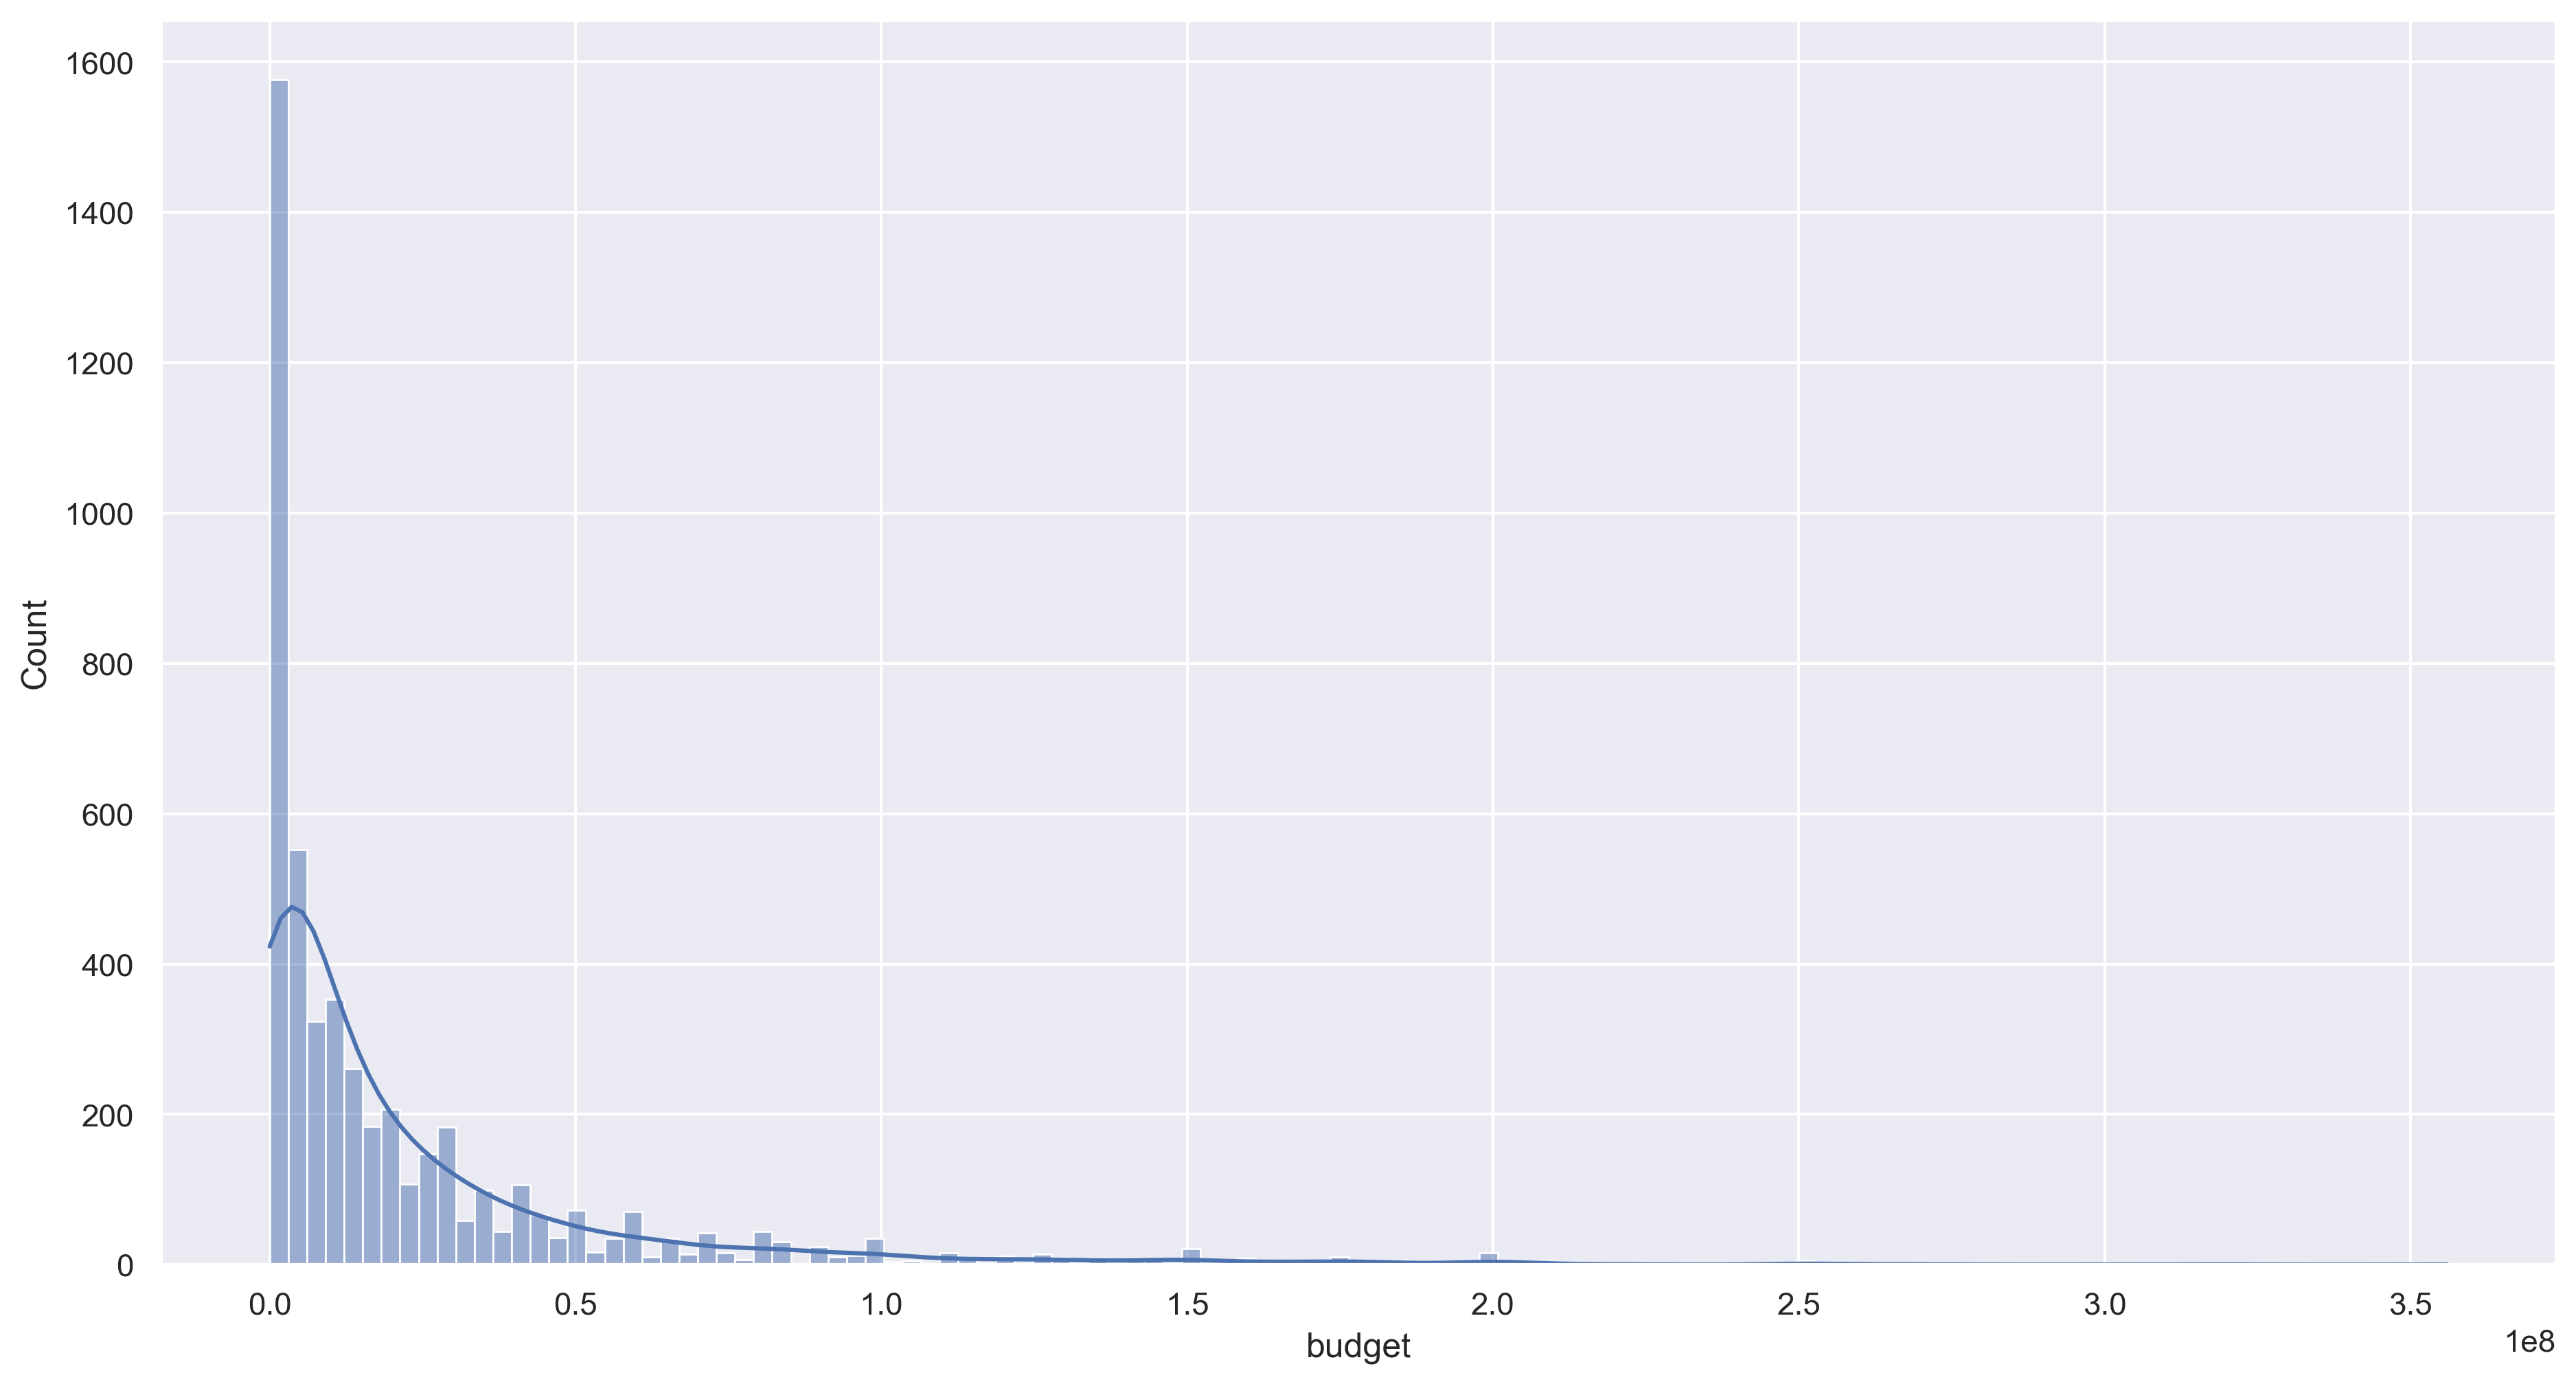

skewness: -1.2734445835868156


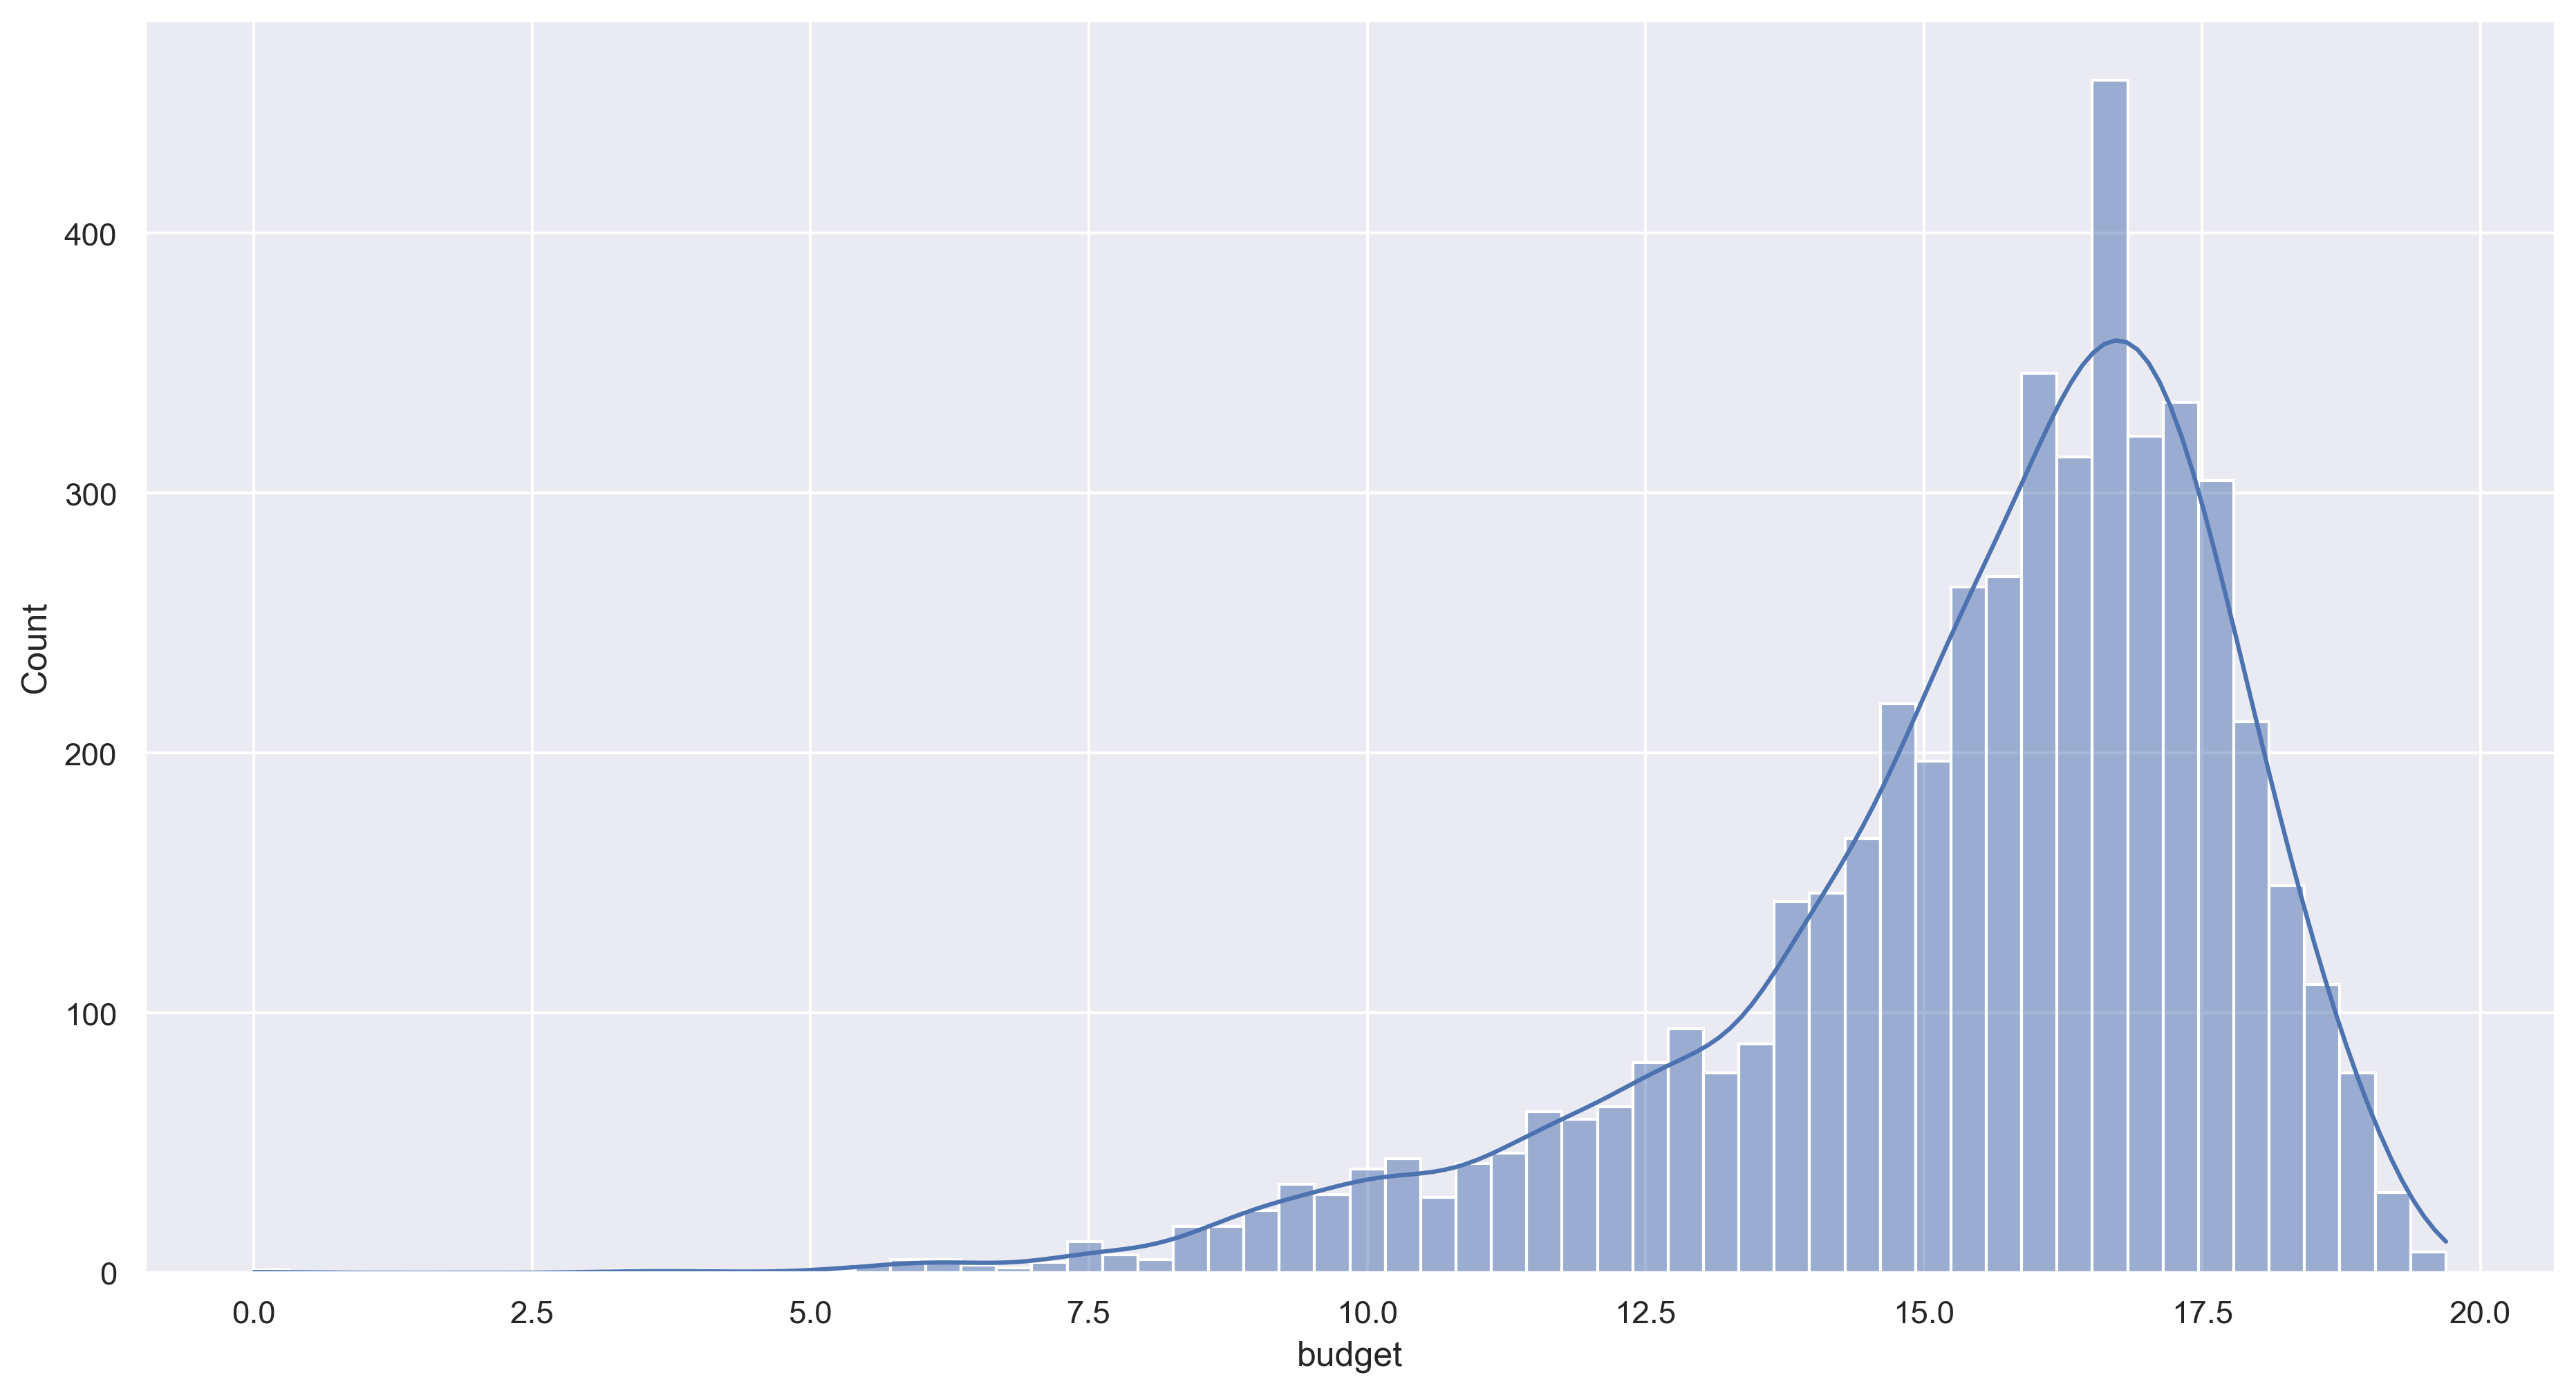

In [34]:
sns.histplot(train_df['budget'], kde = True)
print(f"skewness: {skew(train_df['budget'].dropna())}")
plt.show()

sns.histplot(np.log1p(train_df['budget']), kde = True)
print(f"skewness: {skew(np.log1p(train_df['budget'].dropna()))}")
plt.show()

- Tương tự điều này cũng xảy ra với budget nên mình tạo 2 feature mới (budget, revenue) dùng phép biến đổi log1p (phiên bản chính xác hơn log)

In [41]:
"""Pipeline step 0 (numericals cols): log1p"""

log_transformer = FunctionTransformer(np.log1p)

for dataset in [train_df, val_df, test_df]:
    dataset.loc[:, 'budget_log'] = log_transformer.transform(dataset['budget'])
    dataset.loc[:, 'revenue_log'] = log_transformer.transform(dataset['revenue_'])
# train_df['revenue_log'] = transformer.transform(train_df['revenue_'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


##### Bivariate distribution

##### Multivariate relationship

#### Explore categorical features

##### Distribution

##### Relationship

#### Combine Numerical + categorical features

### Cleaning + Feature engineering

##### Cleaning

In [37]:
cate_train_df = train_df.select_dtypes(['object', 'datetime'])
cate_train_df.columns

Index(['belongs_to_collection', 'genres', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'spoken_languages', 'status', 'tagline', 'title', 'cast', 'crew',
       'keywords'],
      dtype='object')

In [38]:
cate_train_df.dropna().head(1)

belongs_to_collection  \
id                                                                                                                                                     
1371  {'id': 1575, 'name': 'Rocky Collection', 'poster_path': '/O66XFv0mU6JKfmrgkoTQLwbFDG.jpg', 'backdrop_path': '/JhGydj4q5y8MoWZFyj15yKNrzC.jpg'}   

       genres                              homepage    imdb_id  \
id                                                               
1371  [Drama]  https://www.mgm.com/movies/rocky-iii  tt0084602   

     original_language original_title  \
id                                      
1371                en      Rocky III   

                                                                                                                                                                                                                                                                                              overview  \
id                                                                                                                                                                                                                                                                                                       
1371  Now the world champion, Rocky Balboa is living in luxury and only fighting opponents who pose no threat to him in the ring, until Clubber Lang challenges him to a bout. After taking a pounding from Lang, the humbled champ turns to former bitter rival Apollo Creed for a rematch with Lang.   

                           poster_path             production_companies  \
id                                                                        
1371  /lklrplDDuALhY3k8IDFdRqtpZPk.jpg  [Winkler Films, United Artists]   

            production_countries release_date spoken_languages    status  \
id                                                                         
1371  [United States of America]   1982-05-28        [English]  Released   

                      tagline      title  \
id                                         
1371  The greatest challenge.  Rocky III   

                                                                                                                                                                                                                                cast  \
id                                                                                                                                                                                                                                     
1371  [[Sylvester Stallone, 2, 25.404, Robert "Rocky" Balboa], [Talia Shire, 1, 13.447, Adrianna "Adrian" Balboa], [Burt Young, 2, 8.127, Paulie Pennino], [Carl Weathers, 2, 6.433, Apollo Creed], [Mr. T, 2, 4.199, Clubber Lang]]   

                                                                                                                                           crew  \
id                                                                                                                                                
1371  [[Bill Butler, 2, 0.84, Director of Photography], [Sylvester Stallone, 2, 25.404, Screenplay], [Sylvester Stallone, 2, 25.404, Director]]   

                                                                                                                                                             keywords  
id                                                                                                                                                                     
1371  [transporter, trainer, boxer, dying and death, comeback, training, world champion, challenger, rematch, defeat, victory, sports, revenge, fame, wealth, boxing]

==> Cột `cast`, `crew` cần được xử lý lại

###### Cast + crew
Get list of cast names, crew names

In [42]:
# list_of_cast_names = list(train_df['cast'])

""" Pipeline step: """
def list_of(temp, col, type):

    # Name of cast, crew
    if type == 'name':
        index = 0
    elif type == 'gender':
        index = 1
    elif type == 'character':
        index = 3

    def treat_cast1(casts):
        try:
            return [cast[index] for cast in casts]
        except:
            return np.nan

    def flatten_cast(list_of):
        res = []
        for movie in list_of:
            try:
                for cast in movie:
                    if cast == '':
                        res.append(np.nan)
                    else:
                        res.append(cast)
            except:
                continue

        return res

    list_of_names = list(temp[col].apply(treat_cast1))
    res = flatten_cast(list_of_names)
    list_of_names = dict(Counter(res))
    list_of_names = dict(sorted(list_of_names.items(), key=lambda item: item[1], reverse = True))
    return list_of_names

    

list_of_cast_names = list_of(train_df, 'cast', type = 'name')
print(list_of_cast_names)
print(len(list_of_cast_names))

{'Nicolas Cage': 41, 'Robert De Niro': 34, 'Bruce Willis': 31, 'Samuel L. Jackson': 30, 'Ed Harris': 27, 'Morgan Freeman': 27, 'Jackie Chan': 26, 'Johnny Depp': 25, 'Liam Neeson': 25, 'Julia Roberts': 25, 'Woody Harrelson': 25, 'Eddie Murphy': 25, 'John Leguizamo': 24, 'Scarlett Johansson': 24, 'Grey DeLisle': 24, 'Nicole Kidman': 24, 'Sylvester Stallone': 23, 'Matt Damon': 23, 'Julianne Moore': 23, 'Anthony Hopkins': 23, 'Gary Oldman': 23, 'Antonio Banderas': 23, 'Robin Williams': 23, 'Tom Hanks': 23, 'Brad Pitt': 23, 'Alec Baldwin': 22, 'Ewan McGregor': 22, 'Frank Welker': 22, 'Michael Caine': 22, 'Meryl Streep': 22, 'James Franco': 22, 'Will Ferrell': 22, 'Naomi Watts': 22, 'Ralph Fiennes': 21, 'Willem Dafoe': 21, 'Natalie Portman': 21, 'Jim Carrey': 21, 'Jude Law': 21, 'Harrison Ford': 21, 'Sam Rockwell': 21, 'Mark Wahlberg': 21, 'Clint Eastwood': 21, 'George Clooney': 21, 'Bill Murray': 20, 'Arnold Schwarzenegger': 20, 'Jean-Claude Van Damme': 20, 'Cameron Diaz': 20, 'Chris Evans'

In [43]:
list_of_crew_names = list_of(train_df, 'crew', type = 'name')
print(list_of_crew_names)
print(len(list_of_crew_names))

{'Steven Soderbergh': 27, 'Luc Besson': 23, 'Roger Deakins': 23, 'Woody Allen': 21, 'Dean Cundey': 20, 'Billy Wilder': 19, 'Peter Deming': 19, 'Joel Coen': 19, 'Robert Rodriguez': 19, 'Clint Eastwood': 18, 'Robert Elswit': 18, 'Alfred Hitchcock': 18, 'Roman Polanski': 17, 'Francis Ford Coppola': 17, 'Neri Parenti': 17, 'Dean Semler': 16, 'David Tattersall': 16, 'Andrew Dunn': 16, 'Fausto Brizzi': 16, 'Akira Kurosawa': 16, 'Sylvester Stallone': 15, 'Terry Stacey': 15, 'Martin Scorsese': 15, 'Don Burgess': 15, 'Steven Spielberg': 15, 'Dariusz Wolski': 15, 'Richard Linklater': 15, 'John Toll': 15, 'Bill Pope': 15, 'John Lindley': 14, 'Robert D. Yeoman': 14, 'Robert Zemeckis': 14, 'Peter Jackson': 14, 'Matthew Libatique': 14, 'Michael Mann': 14, 'Barry Levinson': 14, 'Oliver Stapleton': 14, 'Emmanuel Lubezki': 14, 'Daryn Okada': 14, 'Wes Craven': 14, 'Andrzej Bartkowiak': 14, 'Philippe Rousselot': 14, 'Peter Hyams': 14, 'Donald McAlpine': 13, 'Dante Spinotti': 13, 'Peter Menzies Jr.': 13, 

In [44]:
list_of_cast_gender = list_of(train_df, 'cast', type = 'gender')
list_of_crew_gender = list_of(train_df, 'crew', type = 'gender')
list_of_cast_characters = list_of(train_df, 'cast', type = 'character')
# list_of_crew_jobs = list_of(train_df, 'crew', type = 'job')

In [45]:
# Delete np.nan value
try:
    del list_of_cast_characters[np.nan]
except:
    pass


print(f"cast_gender: {list_of_cast_gender}")
print(f"crew_gender: {list_of_crew_gender}")
print(f"cast_characters: {list_of_cast_characters}")
# print(f"crew_jobs: {list_of_crew_jobs}")

cast_gender: {2: 17552, 1: 10553, 0: 1834, 3: 27}
crew_gender: {2: 13661, 0: 2776, 1: 1042, 3: 1}
cast_characters: {'Self': 168, 'Himself': 150, 'David': 43, 'Sam': 39, 'Herself': 38, 'Sarah': 33, 'Jack': 33, 'Michael': 31, 'Anna': 31, 'Ben': 30, 'Paul': 30, 'Alice': 29, 'Max': 29, 'Claire': 28, 'Alex': 26, 'Laura': 25, 'Lisa': 25, 'Frank': 25, 'Daniel': 24, 'Mary': 24, 'Maria': 23, 'Charlie': 23, 'Kate': 22, 'Sara': 21, 'John': 21, 'Mother': 20, 'Father': 20, 'Nick': 19, 'Marie': 19, 'Sophie': 19, 'Ray': 18, 'Gloria': 18, 'Emma': 18, 'Eva': 17, 'Luke': 17, 'Eddie': 17, 'Eric': 17, 'Dan': 17, 'Mike': 17, 'Chris': 17, 'Henry': 16, 'Angela': 16, 'Charlotte': 16, 'Tony': 16, 'Julia': 16, 'James Bond': 16, 'Narrator (voice)': 16, 'Jake': 16, 'Kelly': 15, 'Beth': 15, 'Rebecca': 15, 'Rachel': 15, 'Joe': 15, 'Katie': 15, 'Pikachu (voice)': 15, 'Josh': 15, 'Michelle': 14, 'Adam': 14, 'Maggie': 14, 'Jessica': 14, 'James': 14, 'Bob': 14, 'Tom': 14, 'Jimmy': 14, 'Thomas': 14, 'Julie': 14, 'Bruno'

One hot encoding cast, crew name

In [46]:
temp = train_df.copy()

one_hot_len = 100
for name in list(list_of_cast_names)[:one_hot_len]:
    temp['cast_name_' + name] = train_df['cast'].apply(lambda x: 1 if name in str(x) else 0)

for name in list(list_of_crew_names)[:one_hot_len]:
    temp['crew_name_' + name] = train_df['crew'].apply(lambda x: 1 if name in str(x) else 0)

display(temp.head())

adult belongs_to_collection                      genres  \
id                                                                
554577  False                   NaN           [Crime, Thriller]   
401246  False                   NaN                     [Drama]   
430     False                   NaN            [Comedy, Family]   
13252   False                   NaN  [Crime, Thriller, Mystery]   
11121   False                   NaN            [Drama, Romance]   

                              homepage    imdb_id original_language  \
id                                                                    
554577                             NaN  tt4707274                es   
401246  https://www.squarethefilm.com/  tt4995790                en   
430                                NaN  tt0055256                en   
13252                              NaN  tt0896798                en   
11121                              NaN  tt0080009                en   

           original_title  \
id                          
554577  El Complot Mongol   
401246         The Square   
430       One, Two, Three   
13252             Cleaner   
11121                Tess   

                                                                                                                                                                                                                                                                                                                                                                                                                                             overview  \
id                                                                                                                                                                                                                                                                                                                                                                                                                                                      
554577                                                                                                                                                                                           1963, the Soviet Union intercepts a rumor that China pretends to assassinate the president of the US in his visit to Mexico. Filiberto Garcia, a local policeman, has 72 hours to investigate the Mongolian Conspiracy. Damn International Intrigue!   
401246                                                                                                                                                                                                                                                                       A prestigious Stockholm museum's chief art curator finds himself in times of both professional and personal crisis as he attempts to set up a controversial new exhibit.   
430     C.R. MacNamara will do anything to get a promotion within the Coca-Cola company, including looking after boss W.P. Hazeltine's rebellious teenage daughter, Scarlett. When Scarlett visits Berlin, where C.R. is stationed, she reveals that she is married to a communist named Otto Piffl -- and C.R. recognizes that Otto's anti-establishment stance will clash with his boss's own political views, possibly jeopardizing his promotion.   
13252                                                                                                                           Single father and former cop Tom Cutler has an unusual occupation: he cleans up death scenes. But when he's called in to sterilize a wealthy suburban residence after a brutal shooting, Cutler is shocked to learn he may have unknowingly erased crucial evidence, entangling himself in a dirty criminal cover-up.   
11121                                                                                                                                                                                         

Gender sum

In [47]:
def count_gender(casts, val):
    count = 0
    try:
        for cast in casts:
            if cast[1] == val:
                count += 1
    except:
        return 0

    return count
    
# unidentified
temp['gender_cast_0'] = train_df['cast'].apply(lambda x: count_gender(x, 0))
temp['gender_cast_1'] = train_df['cast'].apply(lambda x: count_gender(x, 1))
temp['gender_cast_2'] = train_df['cast'].apply(lambda x: count_gender(x, 2))

# LGBT confirmed !
temp['gender_cast_3'] = train_df['cast'].apply(lambda x: count_gender(x, 3))

temp['gender_crew_0'] = train_df['crew'].apply(lambda x: count_gender(x, 0))
temp['gender_crew_1'] = train_df['crew'].apply(lambda x: count_gender(x, 1))
temp['gender_crew_2'] = train_df['crew'].apply(lambda x: count_gender(x, 2))

temp['gender_crew_3'] = train_df['crew'].apply(lambda x: count_gender(x, 0))

display(temp.head())

adult belongs_to_collection                      genres  \
id                                                                
554577  False                   NaN           [Crime, Thriller]   
401246  False                   NaN                     [Drama]   
430     False                   NaN            [Comedy, Family]   
13252   False                   NaN  [Crime, Thriller, Mystery]   
11121   False                   NaN            [Drama, Romance]   

                              homepage    imdb_id original_language  \
id                                                                    
554577                             NaN  tt4707274                es   
401246  https://www.squarethefilm.com/  tt4995790                en   
430                                NaN  tt0055256                en   
13252                              NaN  tt0896798                en   
11121                              NaN  tt0080009                en   

           original_title  \
id                          
554577  El Complot Mongol   
401246         The Square   
430       One, Two, Three   
13252             Cleaner   
11121                Tess   

                                                                                                                                                                                                                                                                                                                                                                                                                                             overview  \
id                                                                                                                                                                                                                                                                                                                                                                                                                                                      
554577                                                                                                                                                                                           1963, the Soviet Union intercepts a rumor that China pretends to assassinate the president of the US in his visit to Mexico. Filiberto Garcia, a local policeman, has 72 hours to investigate the Mongolian Conspiracy. Damn International Intrigue!   
401246                                                                                                                                                                                                                                                                       A prestigious Stockholm museum's chief art curator finds himself in times of both professional and personal crisis as he attempts to set up a controversial new exhibit.   
430     C.R. MacNamara will do anything to get a promotion within the Coca-Cola company, including looking after boss W.P. Hazeltine's rebellious teenage daughter, Scarlett. When Scarlett visits Berlin, where C.R. is stationed, she reveals that she is married to a communist named Otto Piffl -- and C.R. recognizes that Otto's anti-establishment stance will clash with his boss's own political views, possibly jeopardizing his promotion.   
13252                                                                                                                           Single father and former cop Tom Cutler has an unusual occupation: he cleans up death scenes. But when he's called in to sterilize a wealthy suburban residence after a brutal shooting, Cutler is shocked to learn he may have unknowingly erased crucial evidence, entangling himself in a dirty criminal cover-up.   
11121                                                                                                                                                                                         

##### Handling missing values

#### Handling outliers

#### Generate new features

#### Scaling features

#### Normalization

#### Categorical --> Numerical

#### Features selection

#### Cleaning Pipelines

# Model selection

# Hyperparameters tuning

# Evaluation

# References

- Cleaning steps https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4
- EDA + features engineering:
    - https://www.kaggle.com/kamalchhirang/eda-feature-engineering-lgb-xgb-cat
    - https://www.kaggle.com/enric1296/complete-guide-eda-feat-model
    - https://www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation#Modelling-and-feature-generation
    - https://www.kaggle.com/takedown/tmdb-box-office-revenue-prediction